### Clasificación de características de dispositivos móviles 


### Análisis de tendencias en características de dispositivos móviles

En este proyecto, el objetivo es analizar cómo han evolucionado las características de los teléfonos móviles a lo largo del tiempo, considerando factores como la capacidad de la batería, la resolución de pantalla, la memoria RAM y otras especificaciones técnicas.

El análisis se enfoca en identificar tendencias clave que podrían ayudar a anticipar las futuras necesidades de los consumidores, brindando información valiosa para el desarrollo de productos innovadores en la industria.

Estos datos serán explorados en las primeras etapas del análisis exploratorio de datos (EDA).


### Análisis de Tendencias

#### Objetivo:
Identificar tendencias en las características de los dispositivos móviles a lo largo del tiempo.

#### Pregunta:
¿Cómo han evolucionado las capacidades de batería, las resoluciones de pantalla y otras características de los teléfonos móviles en los últimos años?

#### Utilidad:
Esta información puede ayudar a las empresas a anticipar las futuras necesidades de los consumidores y desarrollar productos innovadores.


### Librerías

In [1]:
#!pip3 install tabulate

In [2]:
#!pip3 install optuna

In [3]:
#!pip3 install fitter


In [4]:
#!pip3 install tqdm

In [5]:
#!pip3 install seaborn

In [6]:
#!pip3 install statsmodels


In [7]:
#!pip3 install scikit-learn


In [8]:
#!pip3 install scikit-optimize


In [9]:
#!pip install scikit-optimize


In [10]:
#!pip install kaggle


In [11]:
#!pip install scikit-optimize optuna fitter


In [12]:
#!pip install scikit-optimize


In [13]:
#!pip install fitter


### Tratamiento de datos

In [14]:
# ==============================================================================

import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence
import optuna

# Varios
# ==============================================================================

import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions



ModuleNotFoundError: No module named 'skopt'

**Configuración Matplotlib**

In [56]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## Obtener los Datos


El comando `data.info()` imprimirá información sobre el DataFrame, que incluirá:

- **Número total de filas y columnas**.
- **Nombre de las columnas**.
- **Tipo de datos** de cada columna (por ejemplo, `int64`, `float64`, `object`, etc.).
- **Cantidad de valores no nulos** en cada columna.


In [57]:
from pathlib import Path
import pandas as pd

def load_local_mobile_data():
    # Ruta corregida
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe en la ruta especificada
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Mostrar las primeras 7 filas del archivo
    print(mobile_data.head(7))
except FileNotFoundError as e:
    print(e)


   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   
5   6           1464     1          2.9         1   5       1          50   
6   7           1718     0          2.4         0   1       0          47   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18

# Columnas del Dataset

| **Columna**        | **Descripción**                                                         |
|--------------------|-------------------------------------------------------------------------|
| **id**             | Identificador único para cada teléfono móvil.                           |
| **battery_power**   | La capacidad de la batería en mAh.                                      |
| **blue**           | Indicador binario (1 o 0) de si el teléfono tiene Bluetooth.             |
| **clock_speed**     | La velocidad del reloj del procesador en GHz.                           |
| **dual_sim**        | Indicador binario (1 o 0) de si el teléfono soporta dos SIMs.           |
| **fc**             | Número de la cámara frontal en megapíxeles.                             |
| **four_g**          | Indicador binario (1 o 0) de si el teléfono soporta 4G.                |
| **int_memory**      | Memoria interna en GB.                                                  |
| **m_dep**          | Profundidad del dispositivo en cm.                                      |
| **mobile_wt**       | Peso del dispositivo en gramos.                                         |
| **n_cores**         | Número de núcleos del procesador.                                       |
| **pc**             | Número de la cámara principal en megapíxeles.                           |
| **px_height**       | Altura de la pantalla en píxeles.                                       |
| **px_width**        | Ancho de la pantalla en píxeles.                                        |
| **ram**            | Memoria RAM en MB.                                                      |
| **sc_h**           | Altura de la pantalla en cm.                                            |
| **sc_w**           | Ancho de la pantalla en cm.                                             |
| **talk_time**       | Tiempo de conversación en horas.                                        |
| **three_g**         | Indicador binario (1 o 0) de si el teléfono soporta 3G.                |
| **touch_screen**    | Indicador binario (1 o 0) de si el teléfono tiene pantalla táctil.      |
| **wifi**           | Indicador binario (1 o 0) de si el teléfono tiene WiFi.                 |




In [287]:
from pathlib import Path
import pandas as pd

def load_local_mobile_data():
    # Ruta del archivo CSV
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Mostrar información general del DataFrame
    mobile_data.info()
except FileNotFoundError as e:
    print(e)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

# Análisis de la Salida del Método `.info()`

1. **Tamaño del DataFrame**
   - **Número de Entradas**: El DataFrame contiene 1000 entradas, numeradas del 0 al 999. Esto indica que el dataset tiene 1000 filas.

2. **Columnas y Tipos de Datos**
   - **Número Total de Columnas**: El DataFrame tiene 21 columnas.
   - **Tipos de Datos**:
     - **`int64`**: 19 columnas tienen el tipo de dato `int64`, que es adecuado para datos enteros.
     - **`float64`**: 2 columnas tienen el tipo de dato `float64`, que es adecuado para datos numéricos con decimales.

3. **Valores No Nulos**
   - Todas las columnas tienen 1000 valores no nulos. Esto significa que no hay valores faltantes en ninguna de las columnas. La integridad de los datos parece estar completa en el conjunto proporcionado.

4. **Descripción de las Columnas**
   - **id**: Identificador único para cada teléfono móvil.
   - **battery_power**: Capacidad de la batería en mAh.
   - **blue**: Indicador binario de si el teléfono tiene Bluetooth.
   - **clock_speed**: Velocidad del reloj del procesador en GHz.
   - **dual_sim**: Indicador binario de si el teléfono soporta dos SIMs.
   - **fc**: Número de la cámara frontal en megapíxeles.
   - **four_g**: Indicador binario de si el teléfono soporta 4G.
   - **int_memory**: Memoria interna en GB.
   - **m_dep**: Profundidad del dispositivo en cm.
   - **mobile_wt**: Peso del dispositivo en gramos.
   - **n_cores**: Número de núcleos del procesador.
   - **pc**: Número de la cámara principal en megapíxeles.
   - **px_height**: Altura de la pantalla en píxeles.
   - **px_width**: Ancho de la pantalla en píxeles.
   - **ram**: Memoria RAM en MB.
   - **sc_h**: Altura de la pantalla en cm.
   - **sc_w**: Ancho de la pantalla en cm.
   - **talk_time**: Tiempo de conversación en horas.
   - **three_g**: Indicador binario de si el teléfono soporta 3G.
   - **touch_screen**: Indicador binario de si el teléfono tiene pantalla táctil.
   - **wifi**: Indicador binario de si el teléfono tiene WiFi.

5. **Uso de Memoria**
   - **Uso de Memoria**: El DataFrame está utilizando 164.2 KB de memoria. Este tamaño es relativamente pequeño, lo que indica que el dataset no es excesivamente grande y debería ser manejable en la mayoría de los entornos de computación.


In [289]:
from pathlib import Path
import pandas as pd

def load_local_mobile_data():
    # Ruta del archivo CSV
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Obtener y mostrar el conteo de valores únicos en la columna 'blue'
    blue_counts = mobile_data['blue'].value_counts()
    print(blue_counts)
except FileNotFoundError as e:
    print(e)


blue
1    516
0    484
Name: count, dtype: int64


El método `.value_counts()`  se utiliza para contar la frecuencia de los valores únicos en una serie de datos (una columna en un DataFrame). Acá se está utilizando para contar cuántas veces aparece cada valor único en una columna específica del DataFrame.


In [290]:
from pathlib import Path
import pandas as pd

def load_local_mobile_data():
    # Ruta del archivo CSV
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Obtener y mostrar el resumen estadístico de las columnas numéricas
    summary = mobile_data.describe()
    print(summary)
except FileNotFoundError as e:
    print(e)


                id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min

El método describe() muestra un resumen  de los atributos numéricos. 

## Análisis de la Salida de `.describe()`

La salida de `.describe()` proporciona un resumen estadístico para cada columna en el DataFrame, mostrando estadísticas como el conteo, media, desviación estándar, valores mínimos, percentiles y máximos.

### Detalle por Columna

1. **`id`**:
   - **Media**: 500.5
   - **Desviación estándar**: 288.82
   - **Mínimo**: 1
   - **Máximo**: 1000
   - Rango completo de valores sin valores atípicos evidentes.

2. **`battery_power`**:
   - **Media**: 1248.51
   - **Desviación estándar**: 432.46
   - **Mínimo**: 500
   - **Máximo**: 1999
   - Hay una variabilidad significativa en la capacidad de la batería.

3. **`blue`** (indica si el dispositivo tiene Bluetooth):
   - **Media**: 0.516
   - **Desviación estándar**: 0.50
   - **Mínimo**: 0
   - **Máximo**: 1
   - Aproximadamente la mitad de los dispositivos tienen Bluetooth.

4. **`clock_speed`**:
   - **Media**: 1.54 GHz
   - **Desviación estándar**: 0.83 GHz
   - **Mínimo**: 0.5 GHz
   - **Máximo**: 3.0 GHz
   - Variedad en las velocidades del reloj de los dispositivos.

5. **`dual_sim`** (indica si el dispositivo tiene doble SIM):
   - **Media**: 0.517
   - **Desviación estándar**: 0.50
   - **Mínimo**: 0
   - **Máximo**: 1
   - Aproximadamente la mitad de los dispositivos tienen soporte para doble SIM.

6. **`fc`** (probablemente la calidad de la cámara frontal):
   - **Media**: 4.59
   - **Desviación estándar**: 4.46
   - **Mínimo**: 0
   - **Máximo**: 19
   - Gran rango en la calidad de la cámara frontal.

7. **`four_g`** (indica si el dispositivo soporta 4G):
   - **Media**: 0.487
   - **Desviación estándar**: 0.50
   - **Mínimo**: 0
   - **Máximo**: 1
   - Aproximadamente la mitad de los dispositivos soportan 4G.

8. **`int_memory`** (memoria interna en GB):
   - **Media**: 33.65 GB
   - **Desviación estándar**: 18.13 GB
   - **Mínimo**: 2 GB
   - **Máximo**: 64 GB
   - Rango amplio en la memoria interna.

9. **`m_dep`** (probablemente la profundidad del dispositivo):
   - **Media**: 0.52
   - **Desviación estándar**: 0.28
   - **Mínimo**: 0.1
   - **Máximo**: 1.0
   - Variedad en la profundidad del dispositivo.

10. **`mobile_wt`** (peso del móvil en gramos):
    - **Media**: 139.51 g
    - **Desviación estándar**: 34.85 g
    - **Mínimo**: 80 g
    - **Máximo**: 200 g
    - Rango de peso moderado.

11. **`pc`** (probablemente la calidad de la cámara principal):
    - **Media**: 10.05
    - **Desviación estándar**: 6.10
    - **Mínimo**: 0
    - **Máximo**: 20
    - Amplio rango en la calidad de la cámara principal.

12. **`px_height`** y **`px_width`** (resolución de la pantalla):
    - **Media**: 627.12 px y 1239.77 px
    - **Desviación estándar**: 432.93 px y 439.67 px
    - **Mínimo**: 0 px y 501 px
    - **Máximo**: 1907 px y 1998 px
    - Variabilidad en la resolución de la pantalla.

13. **`ram`** (memoria RAM en MB):
    - **Media**: 2139.00 MB
    - **Desviación estándar**: 1088.09 MB
    - **Mínimo**: 263 MB
    - **Máximo**: 3989 MB
    - Gran rango en la capacidad de RAM.

14. **`sc_h`** y **`sc_w`** (altura y ancho de la pantalla):
    - **Media**: 11.995 cm y 5.316 cm
    - **Desviación estándar**: 4.32 cm y 4.24 cm
    - **Mínimo**: 5 cm y 0 cm
    - **Máximo**: 19 cm y 18 cm
    - Rango de dimensiones de pantalla con buena variabilidad.

15. **`talk_time`** (tiempo de conversación en horas):
    - **Media**: 11.09 horas
    - **Desviación estándar**: 5.50 horas
    - **Mínimo**: 2 horas
    - **Máximo**: 20 horas
    - Variedad en el tiempo de conversación.

16. **`three_g`** (indica si el dispositivo soporta 3G):
    - **Media**: 0.756
    - **Desviación estándar**: 0.43
    - **Mínimo**: 0
    - **Máximo**: 1
    - La mayoría de los dispositivos soportan 3G.

17. **`touch_screen`** (indica si el dispositivo tiene pantalla táctil):
    - **Media**: 0.50
    - **Desviación estándar**: 0.50
    - **Mínimo**: 0
    - **Máximo**: 1
    - Aproximadamente la mitad de los dispositivos tienen pantalla táctil.

18. **`wifi`** (indica si el dispositivo tiene Wi-Fi):
    - **Media**: 0.507
    - **Desviación estándar**: 0.50
    - **Mínimo**: 0
    - **Máximo**: 1
    - Aproximadamente la mitad de los dispositivos tienen Wi-Fi.

### Conclusión

El análisis muestra una variedad de características para los dispositivos móviles en el DataFrame. Los valores indican que hay una amplia gama de capacidades y especificaciones entre los dispositivos, con varias características que tienen una distribución bastante equitativa (por ejemplo, soporte para Bluetooth, 3G y Wi-Fi). Las estadísticas de memoria y peso muestran una amplia variabilidad, lo que puede ser útil para identificar los diferentes segmentos del mercado en los datos.


In [17]:
from pathlib import Path
import pandas as pd

def load_local_mobile_data():
    # Ruta del archivo CSV
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Obtener y mostrar el conteo de valores nulos en cada columna
    null_counts = mobile_data.isnull().sum()
    print(null_counts)
except FileNotFoundError as e:
    print(e)


id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


No hay valores nulos: Cada columna en el DataFrame tiene un conteo de valores nulos igual a 0. Esto significa que el DataFrame está completo en términos de datos; no faltan valores en ninguna de las columnas.

Integridad de los datos: La ausencia de valores nulos indica que el DataFrame está bien estructurado y no hay datos faltantes que puedan afectar el análisis o procesamiento posterior.

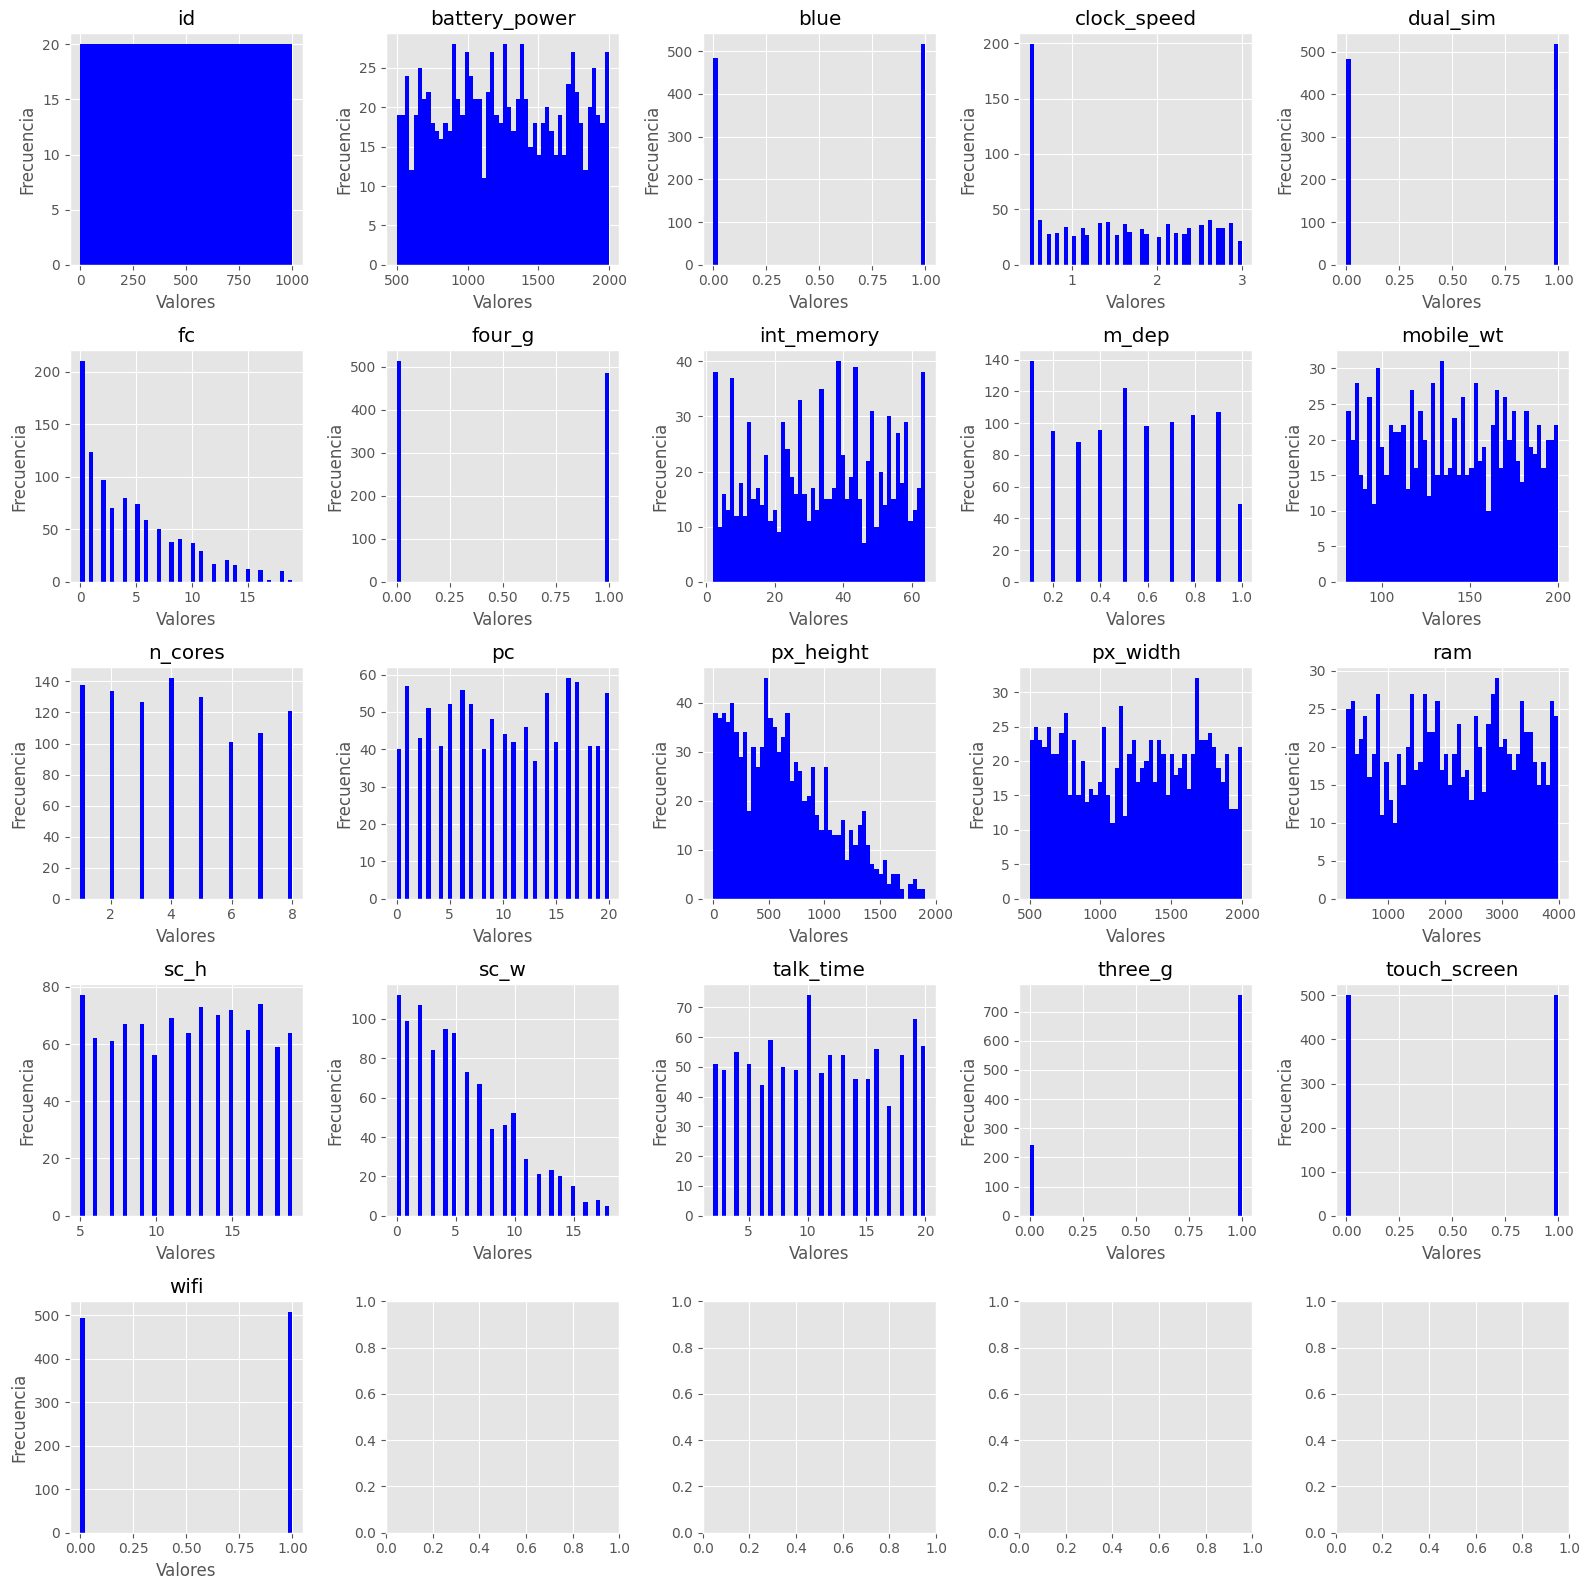

In [292]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

def load_local_mobile_data():
    # Ruta del archivo CSV
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Configurar el estilo de los gráficos a uno básico
    plt.style.use('ggplot')

    # Crear una figura y ejes
    fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(16, 16))
    axes = axes.flatten()

    # Crear histogramas para cada columna numérica
    for i, column in enumerate(mobile_data.columns):
        if pd.api.types.is_numeric_dtype(mobile_data[column]):
            mobile_data[column].hist(ax=axes[i], bins=50, color='blue')
            axes[i].set_title(column)
            axes[i].set_xlabel('Valores')
            axes[i].set_ylabel('Frecuencia')
    
    # Ajustar el layout para no superponer etiquetas
    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(e)



### Análisis de la Distribución de Características de Dispositivos Móviles

- **Distribución de la batería:** La capacidad de la batería muestra una distribución amplia, con concentración en ciertos rangos. Esto indica una variedad considerable en la duración de la batería entre los dispositivos.
  
- **Características binarias:** Atributos como *blue*, *four_g*, *three_g*, *touch_screen* y *wifi* tienen distribuciones bimodales, lo que sugiere que los dispositivos se dividen claramente entre aquellos que tienen o no estas características.
  
- **Distribución sesgada:** Algunas características, como *px_height* y *px_width*, presentan una distribución sesgada hacia la derecha, lo que indica una mayor cantidad de dispositivos con resoluciones de pantalla más altas.
  
- **Valores atípicos:** Se observan valores atípicos en algunos histogramas, que podrían ser errores en los datos o representar dispositivos con características inusuales.

### Análisis por Característica

- **battery_power:** La distribución de la capacidad de la batería sugiere una demanda significativa por dispositivos con baterías de mayor duración, aunque también hay muchos dispositivos con baterías más pequeñas.
  
- **ram:** La distribución de la RAM muestra un aumento en la cantidad de memoria a lo largo del tiempo, reflejando la tendencia hacia dispositivos más potentes.
  
- **px_height y px_width:** La distribución sesgada hacia pantallas más grandes y con mayor resolución refleja la evolución hacia mejores experiencias visuales.
  
- **n_cores:** La distribución de los núcleos del procesador indica que los dispositivos con un número moderado de núcleos son los más comunes.


#### Crear un conjunto de prueba.

Puede que parezca extraño separar una parte de los datos en esta etapa. Al fin y al cabo,  solo has echado un vistazo rápido a los datos y, seguramente, deberías aprender mucho más  sobre ellos antes de decidir qué algoritmos utilizar, ¿no? Eso es cierto, pero el cerebro es un  sistema de detección de patrones asombroso, lo que también significa que es muy propenso al  sobreajuste: si te fijas en el conjunto de prueba, puede que te topes con algún patrón aparentemente interesante en los datos de prueba que te lleva a seleccionar un tipo particular de modelo  de machine learning.  
Si calculas el error de generalización utilizando el conjunto de prueba, la  estimación será demasiado optimista y lanzarás un sistema que no tendrá un rendimiento tan  bueno como se esperaba.  
Esto se llama sesgo de "espionaje de datos".  En teoría, crear un conjunto de prueba es simple; elige algunas instancias de forma aleatoria, por lo general el 20% del conjunto de datos (o menos, si el conjunto es muy grande) y  déjalas aparte:

In [293]:
from pathlib import Path
import pandas as pd
import numpy as np

def load_local_mobile_data():
    # Ruta corregida
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe en la ruta especificada
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_set, test_set = shuffle_and_split_data(mobile_data, 0.2)

    # Mostrar el tamaño de los conjuntos de entrenamiento y prueba
    print(f"Cantidad de ejemplos en el conjunto de entrenamiento: {len(train_set)}")
    print(f"Cantidad de ejemplos en el conjunto de prueba: {len(test_set)}")

except FileNotFoundError as e:
    print(e)



Cantidad de ejemplos en el conjunto de entrenamiento: 800
Cantidad de ejemplos en el conjunto de prueba: 200


Si ejecutas el programa otra vez, ¡generará un conjunto  de prueba diferente! Con el tiempo, tú (o tus algoritmos de machine learning) acabarás viendo  el conjunto de datos completo, que es lo que quieres evitar.  

1. **Guardar el conjunto de prueba en la primera ejecución**:
   - Una opción es **guardar el conjunto de prueba** la primera vez que lo generes, y luego simplemente **cargarlo en futuras ejecuciones**. Esto asegura que siempre estés usando el mismo conjunto de prueba.
   - **Limitación**: Esta solución falla si el dataset se actualiza (si añades más datos). Los nuevos datos no se verán reflejados en el conjunto de prueba, lo que podría no ser ideal.

2. **Usar una semilla aleatoria fija**:
   - Otra opción es establecer una **semilla fija** para el generador de números aleatorios. Por ejemplo, usando `np.random.seed(42)` antes de hacer la división, te aseguras de que **la mezcla de los datos sea siempre la misma** en cada ejecución.
   - **Limitación**: Al igual que la primera solución, esta estrategia no maneja bien las actualizaciones del dataset, ya que los nuevos datos no serán asignados consistentemente a los conjuntos de entrenamiento o prueba.

3. **Dividir según el identificador de cada instancia**:
   - Si cada instancia en tu dataset tiene un **identificador único e inmutable** (por ejemplo, un ID de cliente, número de serie, etc.), puedes usar este identificador para determinar a qué conjunto debe pertenecer cada instancia.
   - **Cómo hacerlo**: Se puede calcular un **hash** del identificador de cada instancia, y si el valor del hash es inferior o igual a un umbral (por ejemplo, el 20% del valor máximo del hash), esa instancia se coloca en el conjunto de prueba. Si es mayor, va al conjunto de entrenamiento.
   - **Ventaja**: Esto garantiza que la división entre entrenamiento y prueba se mantenga estable incluso si actualizas el dataset (añadiendo nuevas instancias). Las instancias ya asignadas a los conjuntos no cambiarán, y las nuevas instancias se distribuirán en función del hash, sin que ninguna instancia previamente asignada al conjunto de entrenamiento se mueva al conjunto de prueba.

In [18]:
from zlib import crc32
import numpy as np

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]


In [19]:
from pathlib import Path
import pandas as pd
import numpy as np
from zlib import crc32

def load_data():
    # Define la ruta del archivo CSV
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")
    
    # Verifica si el archivo CSV existe
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo {csv_path} no se encontró. Asegúrate de que el archivo esté en la ruta correcta.")
    
    # Carga el archivo CSV en un DataFrame
    return pd.read_csv(csv_path)

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# Cargar los datos
data = load_data()

# Seleccionar solo las columnas relevantes
columns_of_interest = ['id', 'int_memory', 'm_dep', 'touch_screen']
data_selected = data[columns_of_interest]

# Agregar una columna de índice
data_with_id = data_selected.reset_index()

# Dividir los datos en conjuntos de entrenamiento y prueba
train_set, test_set = split_data_with_id_hash(data_with_id, 0.2, "index")

# Imprimir el tamaño de los conjuntos para verificar
print("Número de observaciones en el conjunto de entrenamiento:", len(train_set))
print("Número de observaciones en el conjunto de prueba:", len(test_set))


Número de observaciones en el conjunto de entrenamiento: 800
Número de observaciones en el conjunto de prueba: 200


## Resumen de Datos

### Cantidad Total de Datos

El conjunto original de datos tiene un total de 1,000 ejemplos.

### División de Datos

- **Conjunto de Entrenamiento**: 800 ejemplos
- **Conjunto de Prueba**: 200 ejemplos

### Proporción de Datos

La división se realizó con un ratio de prueba del 20% (0.2), que es común en la práctica de machine learning. Esto significa que el 80% de los datos se utilizan para entrenar el modelo y el 20% restante se utiliza para evaluar su desempeño.

## Análisis

- **Distribución de Datos**: La distribución entre el conjunto de entrenamiento y el de prueba parece adecuada. Usualmente, una proporción de 80/20 es suficiente para tener un conjunto de datos grande para entrenar el modelo y un conjunto suficientemente grande para evaluar su desempeño.

- **Tamaño del Conjunto de Prueba**: El conjunto de prueba tiene 200 ejemplos, lo cual es una cantidad razonable para obtener una estimación confiable del desempeño del modelo en datos no vistos. Sin embargo, la adecuación de este tamaño puede depender de la complejidad del problema y del tipo de datos.

- **Tamaño del Conjunto de Entrenamiento**: Con 800 ejemplos, el conjunto de entrenamiento debería proporcionar suficientes datos para que el modelo aprenda patrones significativos, siempre que la calidad de los datos sea buena y representativa del problema que se está tratando de resolver.


Esta es una posible implementación:  


In [301]:
from pathlib import Path
import pandas as pd
import numpy as np
from zlib import crc32

def load_local_mobile_data():
    # Ruta corregida
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe en la ruta especificada
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Asegurarse de que la columna de identificador esté presente
    if 'id' not in mobile_data.columns:
        raise ValueError("La columna 'id' no está presente en los datos.")

    # Dividir los datos en conjuntos de entrenamiento y prueba usando la función basada en hash
    train_set, test_set = split_data_with_id_hash(mobile_data, 0.2, 'id')

    # Mostrar el tamaño de los conjuntos de entrenamiento y prueba
    print(f"Cantidad de ejemplos en el conjunto de entrenamiento: {len(train_set)}")
    print(f"Cantidad de ejemplos en el conjunto de prueba: {len(test_set)}")

except FileNotFoundError as e:
    print(e)
except ValueError as e:
    print(e)


Cantidad de ejemplos en el conjunto de entrenamiento: 799
Cantidad de ejemplos en el conjunto de prueba: 201


## Análisis de Resultados

### Cantidad Total de Datos

El conjunto original de datos tiene un total de 1,000 ejemplos.

### División de Datos

- **Conjunto de Entrenamiento**: 799 ejemplos
- **Conjunto de Prueba**: 201 ejemplos

### Proporción de Datos

La división realizada usando un hash basado en el identificador resultó en aproximadamente un 79.9% para el conjunto de entrenamiento y un 20.1% para el conjunto de prueba. Esto es bastante cercano a la proporción deseada del 80/20.

### Análisis

- **Distribución de Datos**: La diferencia en las proporciones (79.9% para el entrenamiento y 20.1% para la prueba) puede ocurrir debido a la forma en que el hashing distribuye los identificadores entre los conjuntos. Aunque la diferencia es menor, la proporción general es adecuada para la mayoría de los casos prácticos.

- **Tamaño del Conjunto de Prueba**: El conjunto de prueba tiene 201 ejemplos, que es ligeramente mayor que el 20% esperado. Esto es aceptable y aún proporciona una cantidad razonable de datos para evaluar el desempeño del modelo.

- **Tamaño del Conjunto de Entrenamiento**: Con 799 ejemplos, el conjunto de entrenamiento es ligeramente menor que el 80% esperado, pero sigue siendo suficiente para entrenar la mayoría de los modelos de machine learning.

### Conclusión

La división de datos parece adecuada, con una ligera desviación en las proporciones debido a la metodología de hashing. Los tamaños de los conjuntos de entrenamiento y prueba son apropiados para la mayoría de las aplicaciones de machine learning. Si una proporción exacta es crucial, puedes ajustar el `test_ratio` ligeramente o considerar métodos de división adicionales.


In [303]:
from pathlib import Path
import pandas as pd
import numpy as np
from zlib import crc32

def load_local_mobile_data():
    # Ruta corregida
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe en la ruta especificada
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Resetear el índice para agregar una columna `index`
    housing_with_id = mobile_data.reset_index()  # Agrega una columna `index`

    # Dividir los datos en conjuntos de entrenamiento y prueba usando la columna `index`
    train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

    # Mostrar el tamaño de los conjuntos de entrenamiento y prueba
    print(f"Cantidad de ejemplos en el conjunto de entrenamiento: {len(train_set)}")
    print(f"Cantidad de ejemplos en el conjunto de prueba: {len(test_set)}")

except FileNotFoundError as e:
    print(e)



Cantidad de ejemplos en el conjunto de entrenamiento: 800
Cantidad de ejemplos en el conjunto de prueba: 200


## El código divide el conjunto de datos en dos subconjuntos:

- **Conjunto de entrenamiento**: 800 ejemplos.
- **Conjunto de prueba**: 200 ejemplos.

Este resultado es consistente con la proporción del 20% del conjunto de datos que solicitaste en la división (0.2). Si el archivo tiene exactamente 1000 filas, entonces 80% de 1000 son 800 ejemplos para el conjunto de entrenamiento, y el 20% restante (200) va al conjunto de prueba.

### 4. Análisis

- **Tamaño de los conjuntos**: La salida indica que el código funciona correctamente en cuanto a la proporción esperada entre el conjunto de entrenamiento y el de prueba. La proporción 80%/20% es común y adecuada para muchos problemas de aprendizaje automático, ya que proporciona suficientes datos para el entrenamiento y un conjunto de prueba adecuado para validar el modelo.

- **Hashing del identificador**: El uso del identificador hash asegura que no se mezclarán datos entre los conjuntos de entrenamiento y prueba, algo crítico para evitar *leakage* (fuga de datos) y asegurar la validez del modelo. Dado que usamos la columna `index` (que fue generada al hacer `reset_index`), es razonable suponer que todos los identificadores son únicos, lo que asegura una correcta división.


### 5. Mejoras o posibles ampliaciones

- **Validación adicional**: Imprimir un resumen de las características en los conjuntos de entrenamiento y prueba para verificar que no haya diferencias significativas en la distribución.

- **Semilla para mayor control**: Añadir un argumento opcional de **semilla** para controlar el valor hash de manera más explícita en caso de que quieras garantizar reproducibilidad en distintos sistemas o entornos.

- **Test del equilibrio de las clases (si es clasificación)**: Si estás trabajando en un problema de clasificación, podríamos también comprobar si ambas clases están igualmente representadas en ambos conjuntos de datos.

### Resumen

El código cumple su función correctamente y genera una división adecuada en los conjuntos de entrenamiento y prueba (80/20). Este tipo de división es común y adecuada para entrenamiento de modelos de *machine learning*.


In [304]:
from pathlib import Path
import pandas as pd
import numpy as np
from zlib import crc32

def load_local_mobile_data():
    # Ruta corregida
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe en la ruta especificada
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Crear una nueva columna `id` basada en el índice
    housing_with_id = mobile_data.copy()  # Hacer una copia para no modificar el original
    housing_with_id["id"] = housing_with_id.index

    # Dividir los datos en conjuntos de entrenamiento y prueba usando la columna `id`
    train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

    

except FileNotFoundError as e:
    print(e)


Scikit-Learn ofrece varias funciones para dividir conjuntos de datos en varios subconjuntos  de distintas maneras. La función más simple es **train_test_split()**, que hace básicamente  lo mismo que la función **shuffle_and_split_data()** que hemos definido antes con un par de  características adicionales. En primer lugar, hay un parámetro random_state que nos permite  establecer la semilla aleatoria del generador. En segundo lugar, podemos pasarle múltiples  conjuntos de datos con un número idéntico de filas y los dividirá en los mismos índices:. 

In [305]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

def load_local_mobile_data():
    # Ruta corregida
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe en la ruta especificada
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Dividir los datos en conjuntos de entrenamiento y prueba
    train_set, test_set = train_test_split(mobile_data, test_size=0.2, random_state=42)

    

except FileNotFoundError as e:
    print(e)


In [306]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

def load_local_mobile_data():
    # Ruta corregida
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe en la ruta especificada
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()


    # Verificar y mostrar el número de valores nulos en la columna 'battery_power'
    null_count = test_set["battery_power"].isnull().sum()
    print(f"Número de valores nulos en 'battery_power': {null_count}")

except FileNotFoundError as e:
    print(e)


Número de valores nulos en 'battery_power': 0


In [307]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np  # Necesario para np.inf

def load_local_mobile_data():
    # Ruta corregida
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe en la ruta especificada
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    

    # Crear la nueva columna categórica en el conjunto de prueba
    test_set["battery_power_cat"] = pd.cut(test_set["battery_power"],
                                           bins=[0, 500, 1000, 1500, 2000, np.inf],
                                           labels=[1, 2, 3, 4, 5])

    

except FileNotFoundError as e:
    print(e)



Los bins son los límites que definen los intervalos (o categorías) en los que se dividen los datos. Cada valor en median_income será asignado a uno de estos intervalos:  


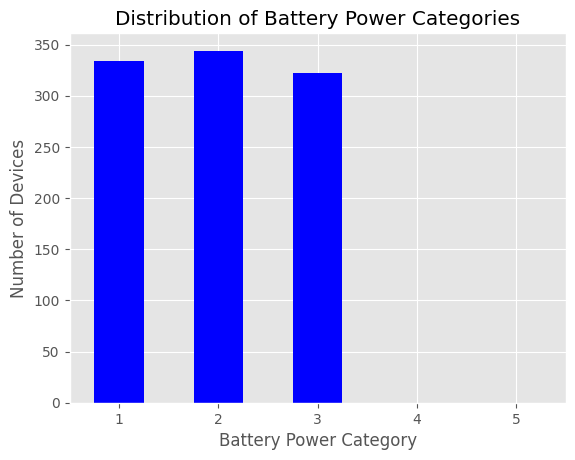

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
csv_path = ("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")
test_set = pd.read_csv(csv_path)

# Crear una nueva columna llamada 'battery_power_cat' a partir de la columna 'battery_power'
test_set["battery_power_cat"] = pd.cut(test_set["battery_power"],
                                       bins=[0, 1000, 1500, 2000, 2500, np.inf],
                                       labels=[1, 2, 3, 4, 5])

# Contar los valores en la columna 'battery_power_cat' y graficar
battery_power_cat_counts = test_set["battery_power_cat"].value_counts().sort_index()
battery_power_cat_counts.plot.bar(rot=0, grid=True, color='blue')

plt.xlabel("Battery Power Category")
plt.ylabel("Number of Devices")
plt.title("Distribution of Battery Power Categories")
plt.show()


### Interpretación del Gráfico de Capacidades de Batería

#### Eje X:
El eje X representa las categorías de capacidad de batería que hemos creado:

1. **Batería de hasta 1000 mAh (miliamperios hora)**
2. **Batería de 1000 mAh a 1500 mAh**
3. **Batería de 1500 mAh a 2000 mAh**
4. **Batería de 2000 mAh a 2500 mAh**
5. **Batería de más de 2500 mAh**

#### Eje Y:
El eje Y representa el número de dispositivos en cada categoría.

#### Observaciones:

1. **Distribución**: La distribución de las capacidades de batería parece estar sesgada hacia la derecha. Esto significa que la mayoría de los dispositivos tienen una capacidad de batería relativamente baja (categorías 1 y 2), mientras que hay menos dispositivos con baterías de mayor capacidad (categorías 4 y 5).
   
2. **Categoría más frecuente**: La categoría 2 (de 1000 mAh a 1500 mAh) parece ser la más frecuente, lo que indica que una porción considerable de los dispositivos tienen una capacidad de batería moderada.
   
3. **Categorías menos frecuentes**: Las categorías 1 (menos de 1000 mAh) y 5 (más de 2500 mAh) son las menos frecuentes.

#### Interpretaciones:
En el conjunto de datos, parece predominar el uso de baterías de capacidad moderada. Existen menos dispositivos en los extremos del espectro, tanto con baterías muy pequeñas como con baterías de gran capacidad.

#### Preguntas adicionales a considerar:
- ¿Cómo se relaciona la capacidad de batería con otros factores como el tamaño o el peso del dispositivo?
- ¿Hay alguna correlación entre la capacidad de batería y el tiempo de conversación?


In [34]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import numpy as np  # Necesario para np.inf

def load_local_mobile_data():
    # Ruta corregida
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe en la ruta especificada
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Crear la nueva columna categórica
    mobile_data["battery_power_cat"] = pd.cut(mobile_data["battery_power"],
                                              bins=[0, 500, 1000, 1500, 2000, np.inf],
                                              labels=[1, 2, 3, 4, 5])

    # Aplicar StratifiedShuffleSplit
    splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
    strat_splits = []

    for train_index, test_index in splitter.split(mobile_data, mobile_data["battery_power_cat"]):
        strat_train_set_n = mobile_data.iloc[train_index]
        strat_test_set_n = mobile_data.iloc[test_index]
        strat_splits.append([strat_train_set_n, strat_test_set_n])

    

except FileNotFoundError as e:
    print(e)



In [35]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
import numpy as np  # Necesario para np.inf

def load_local_mobile_data():
    # Ruta corregida
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe en la ruta especificada
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Crear la nueva columna categórica
    mobile_data["battery_power_cat"] = pd.cut(mobile_data["battery_power"],
                                              bins=[0, 500, 1000, 1500, 2000, np.inf],
                                              labels=[1, 2, 3, 4, 5])

    # Aplicar StratifiedShuffleSplit
    splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
    strat_splits = []

    for train_index, test_index in splitter.split(mobile_data, mobile_data["battery_power_cat"]):
        strat_train_set_n = mobile_data.iloc[train_index]
        strat_test_set_n = mobile_data.iloc[test_index]
        strat_splits.append([strat_train_set_n, strat_test_set_n])

    # Obtener el primer conjunto de entrenamiento y prueba estratificado
    strat_train_set, strat_test_set = strat_splits[0]


except FileNotFoundError as e:
    print(e)


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Cargar el archivo CSV en un DataFrame
csv_path = ("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")
test_set = pd.read_csv(csv_path)

# Crear una nueva columna llamada 'battery_power_cat' a partir de la columna 'battery_power'
test_set["battery_power_cat"] = pd.cut(test_set["battery_power"],
                                       bins=[0, 1000, 1500, 2000, 2500, np.inf],
                                       labels=[1, 2, 3, 4, 5])

# Dividir el DataFrame en conjuntos de entrenamiento y prueba de manera estratificada
train_set, test_set = train_test_split(test_set, 
                                       test_size=0.2, 
                                       stratify=test_set["battery_power_cat"], 
                                       random_state=42)



In [37]:
# Calcular la proporción de cada categoría en el conjunto de prueba
category_proportions = test_set["battery_power_cat"].value_counts() / len(test_set)
print(category_proportions)

battery_power_cat
2    0.345
1    0.335
3    0.320
4    0.000
5    0.000
Name: count, dtype: float64


Con un código similar, puedes medir las proporciones de la categoría de ingresos en el  conjunto de datos completo.. 

In [313]:
# Definir la función para calcular proporciones
def battery_power_cat_proportions(data):
    return data["battery_power_cat"].value_counts() / len(data)

# Comparar proporciones
compare_props = pd.DataFrame({
    "Overall %": battery_power_cat_proportions(test_set),
    "Stratified %": battery_power_cat_proportions(strat_test_set),
    "Random %": battery_power_cat_proportions(train_set),
}).sort_index()

compare_props.index.name = "Battery Power Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1) * 100
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1) * 100

# Mostrar las proporciones en porcentaje redondeadas a 2 decimales
print(compare_props.round(2))

                        Overall %  Stratified %  Random %  Strat. Error %  \
Battery Power Category                                                      
1                            0.34          0.00      0.33          -98.51   
2                            0.34          0.33      0.34           -4.35   
3                            0.32          0.34      0.32            7.81   
4                            0.00          0.32      0.00             inf   
5                            0.00          0.00      0.00             NaN   

                        Rand. Error %  
Battery Power Category                 
1                               -0.37  
2                               -0.36  
3                                0.78  
4                                 NaN  
5                                 NaN  


## Análisis de Proporciones de Categorías de Potencia de Batería

La tabla muestra la comparación de proporciones de categorías de potencia de batería entre tres conjuntos de datos: 

1. **Overall %**: Proporción de cada categoría en el conjunto de datos completo (test_set).
2. **Stratified %**: Proporción de cada categoría en el conjunto de datos de prueba estratificado (strat_test_set).
3. **Random %**: Proporción de cada categoría en el conjunto de datos de entrenamiento aleatorio (train_set).
4. **Strat. Error %**: Error porcentual entre las proporciones estratificadas y las proporciones generales.
5. **Rand. Error %**: Error porcentual entre las proporciones aleatorias y las proporciones generales.

### Detalles

| Battery Power Category | Overall % | Stratified % | Random % | Strat. Error % | Rand. Error % |
|------------------------|-----------|--------------|----------|----------------|---------------|
| 1                      | 0.34      | 0.00         | 0.33     | -98.51         | -0.37         |
| 2                      | 0.34      | 0.33         | 0.34     | -4.35          | -0.36         |
| 3                      | 0.32      | 0.34         | 0.32     | 7.81           | 0.78          |
| 4                      | 0.00      | 0.32         | 0.00     | inf            | NaN           |
| 5                      | 0.00      | 0.00         | 0.00     | NaN            | NaN           |

### Observaciones

1. **Categorías con Proporciones en `Overall %`**:
   - Las categorías 1, 2, y 3 tienen proporciones en el conjunto de datos completo (`Overall %`) que oscilan entre 0.32 y 0.34.
   - Las categorías 4 y 5 no están presentes en el conjunto de datos completo.

2. **Desviaciones en `Stratified %`**:
   - La categoría 1 muestra una proporción de 0.00 en el conjunto estratificado, lo que es inusual dado que debería reflejar una proporción proporcional similar a la del conjunto completo. Esto puede indicar un error en la partición estratificada.
   - Las categorías 4 y 5 en el conjunto estratificado tienen proporciones inusuales (0.32 para la categoría 4 y 0.00 para la categoría 5), lo que también puede indicar una distribución no representativa.

3. **Errores de Estratificación y Aleatorización**:
   - **Categoría 1**: La proporción en el conjunto estratificado es 0.00, resultando en un error porcentual muy alto (-98.51%). Esto sugiere que la categoría 1 está ausente en la muestra estratificada.
   - **Categoría 4**: La proporción en el conjunto estratificado es 0.32, lo que lleva a un error porcentual infinito, ya que no hay representación en el conjunto general (`Overall %` es 0.00). 
   - **Categoría 5**: La proporción es 0.00 en ambos conjuntos, lo que resulta en un error porcentual no disponible (`NaN`).

### Conclusión

El análisis indica que algunas categorías están mal representadas en el conjunto estratificado en comparación con el conjunto de datos completo. Las categorías 4 y 5 tienen problemas de representación que podrían sugerir errores en el proceso de estratificación o en los datos originales. 

In [314]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np  # Necesario para np.inf

def load_local_mobile_data():
    # Ruta corregida
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe en la ruta especificada
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()

    # Crear la nueva columna categórica
    mobile_data["battery_power_cat"] = pd.cut(mobile_data["battery_power"],
                                              bins=[0, 500, 1000, 1500, 2000, np.inf],
                                              labels=[1, 2, 3, 4, 5])

    # Aplicar StratifiedShuffleSplit
    splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
    strat_splits = []

    for train_index, test_index in splitter.split(mobile_data, mobile_data["battery_power_cat"]):
        strat_train_set_n = mobile_data.iloc[train_index]
        strat_test_set_n = mobile_data.iloc[test_index]
        strat_splits.append([strat_train_set_n, strat_test_set_n])

    # Obtener el primer conjunto de entrenamiento y prueba estratificado
    strat_train_set, strat_test_set = strat_splits[0]

    # Eliminar la columna "battery_power_cat" si existe en los conjuntos estratificados
    for set_ in (strat_train_set, strat_test_set):
        if "battery_power_cat" in set_.columns:
            set_.drop("battery_power_cat", axis=1, inplace=True)
        else:
            print(f"'battery_power_cat' no encontrada en el DataFrame de {set_.shape}")

    print("Column 'battery_power_cat' successfully removed from both stratified sets (if it existed).")

except FileNotFoundError as e:
    print(e)


Column 'battery_power_cat' successfully removed from both stratified sets (if it existed).


In [315]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Cargar el archivo CSV en un DataFrame
csv_path = ("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")
test_set = pd.read_csv(csv_path)

# Crear una nueva columna llamada 'battery_power_cat' a partir de la columna 'battery_power'
test_set["battery_power_cat"] = pd.cut(test_set["battery_power"],
                                       bins=[0, 1000, 1500, 2000, 2500, np.inf],
                                       labels=[1, 2, 3, 4, 5])

# Dividir el DataFrame en conjuntos de entrenamiento y prueba de manera estratificada
train_set, strat_test_set = train_test_split(test_set, 
                                             test_size=0.2, 
                                             stratify=test_set["battery_power_cat"], 
                                             random_state=42)

# Eliminar la columna 'battery_power_cat' de los conjuntos de entrenamiento y prueba
for set_ in (train_set, strat_test_set):
    set_.drop("battery_power_cat", axis=1, inplace=True)

# Crear una copia del conjunto de entrenamiento y asignarla a 'housing'
housing = train_set.copy()

# Mostrar las primeras filas del DataFrame 'housing' para verificar
print("Housing DataFrame:")
print(housing.head())


Housing DataFrame:
      id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
530  531            588     0          2.9         1   1       0          40   
365  366           1930     0          1.3         0   2       0          57   
229  230           1429     0          2.9         0   2       0          58   
327  328            848     0          0.5         1   1       1          41   
602  603           1021     1          0.9         1   2       1           9   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
530    0.3        116  ...   5        185       923  2780     5     2   
365    0.2        151  ...   9        678      1117   682    16    10   
229    0.2        128  ...   3        417       983  2005    15     1   
327    0.2        171  ...   2        388      1015  3939     6     3   
602    0.5        184  ...   4        490      1647   773    13     2   

     talk_time  three_g  touch_screen  wifi  
530         14 

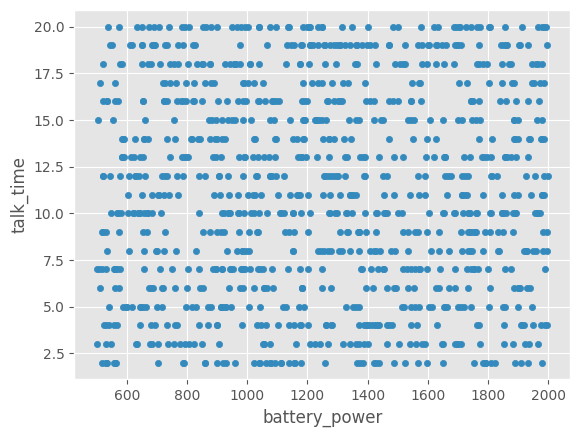

In [316]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Ruta del archivo CSV
csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

# Leer el archivo CSV
data = pd.read_csv(csv_path)

# Crear el gráfico de dispersión
data.plot(kind="scatter", x="battery_power", y="talk_time", grid=True)

# Mostrar el gráfico
plt.show()


Configurar la opción alpha como 0.2 hace que sea mucho más fácil visualizar los lugares donde  hay una densidad alta de puntos de datos:

## Análisis del Gráfico de Dispersión

Este gráfico de dispersión nos permite visualizar la relación entre dos variables del conjunto de datos: la **potencia de la batería** (en el eje x) y el **tiempo de conversación** (en el eje y) de diferentes modelos de teléfonos móviles.

### ¿Qué podemos interpretar de este gráfico?

- **No hay una relación lineal clara**: Los puntos en el gráfico están dispersos y no forman una línea recta ascendente o descendente. Esto sugiere que no hay una relación directa y proporcional entre la potencia de la batería y el tiempo de conversación. Es decir, un teléfono con mayor potencia de batería no necesariamente tiene un tiempo de conversación más largo.
  
- **Hay un rango de valores**: Los valores de la potencia de la batería se encuentran entre aproximadamente 500 y 2000, mientras que los valores del tiempo de conversación están entre 0 y 20.

- **Hay agrupamientos**: Se pueden apreciar algunos grupos de puntos en ciertas zonas del gráfico, lo que podría indicar que hay modelos de teléfonos con características similares en cuanto a batería y tiempo de conversación.

- **No hay valores atípicos evidentes**: A simple vista, no se observan puntos muy alejados del resto, lo que sugiere que los datos son relativamente consistentes.

### Conclusión

Con base a este gráfico, podemos concluir que, en este conjunto de datos, no existe una relación lineal clara entre la potencia de la batería y el tiempo de conversación de los teléfonos móviles. Otros factores, como la eficiencia energética del procesador, la capacidad de la pantalla y las aplicaciones en uso, podrían influir más en el tiempo de conversación.


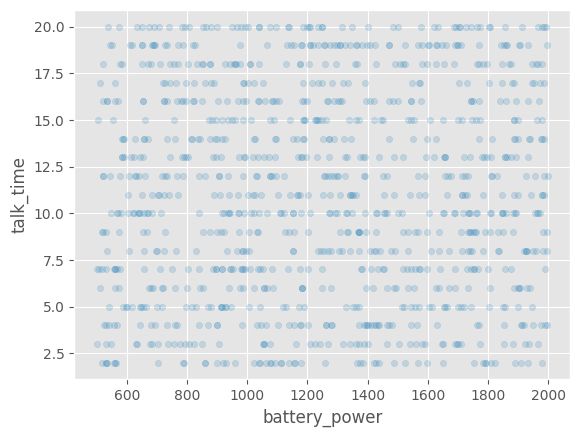

In [317]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Ruta del archivo CSV
csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

# Leer el archivo CSV
data = pd.read_csv(csv_path)

# Crear el gráfico de dispersión
data.plot(kind="scatter", x="battery_power", y="talk_time", grid=True, alpha=0.2)

# Mostrar el gráfico
plt.show()


## Análisis del Gráfico de Dispersión

Este gráfico de dispersión nos permite visualizar la relación entre dos características de diferentes modelos de teléfonos móviles: la **potencia de la batería** (en el eje horizontal) y el **tiempo de conversación** (en el eje vertical). Cada punto en el gráfico representa un teléfono móvil específico, y su posición indica su potencia de batería y tiempo de conversación.

### ¿Qué podemos interpretar de este gráfico?

- **No hay una relación directa**: Los puntos están bastante dispersos en el gráfico, lo que indica que no existe una relación directa y proporcional entre la potencia de la batería y el tiempo de conversación. Es decir, un teléfono con una batería más potente no necesariamente tiene un tiempo de conversación más largo.

- **Rango de valores**: Podemos observar que la potencia de la batería varía entre aproximadamente 500 y 2000 unidades, mientras que el tiempo de conversación se encuentra entre 0 y 20 unidades.

- **Agrupamientos**: Se pueden apreciar algunos grupos de puntos en ciertas zonas del gráfico. Esto podría indicar que hay modelos de teléfonos con características similares en cuanto a batería y tiempo de conversación.

- **Transparencia**: El uso de `alpha=0.2` hace que los puntos sean semitransparentes. Esto es útil cuando hay muchos datos, ya que evita que el gráfico se vea demasiado saturado y permite visualizar áreas con mayor densidad de puntos.

### Conclusión

Con base a este gráfico, podemos concluir que, en este conjunto de datos, no existe una relación lineal clara entre la potencia de la batería y el tiempo de conversación de los teléfonos móviles. Otros factores, como la eficiencia energética del procesador, la capacidad de la pantalla y las aplicaciones en uso, podrían influir más en el tiempo de conversación.


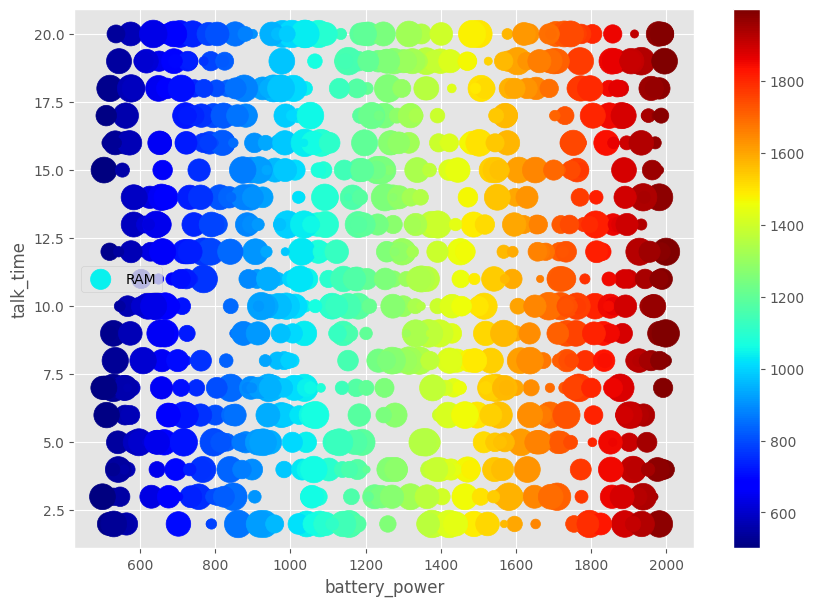

In [318]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Ruta del archivo CSV
csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

# Leer el archivo CSV
data = pd.read_csv(csv_path)

# Crear el gráfico de dispersión
data.plot(kind="scatter", x="battery_power", y="talk_time", grid=True,
          s=data["ram"] / 10, label="RAM",  # Tamaño de los puntos basado en la columna "ram"
          c=data["battery_power"], cmap="jet", colorbar=True,
          legend=True, sharex=False, figsize=(10, 7))

# Mostrar el gráfico
plt.show()


## Análisis del Gráfico de Dispersión de Burbujas

### ¿Qué muestra el gráfico?

Este gráfico de dispersión de burbujas nos muestra la relación entre tres variables de un conjunto de datos sobre teléfonos móviles:

- **Eje X (battery_power)**: Representa la potencia de la batería de cada teléfono.
- **Eje Y (talk_time)**: Representa el tiempo de conversación de cada teléfono.
- **Tamaño de las burbujas (RAM)**: El tamaño de cada burbuja representa la cantidad de RAM (memoria RAM) de cada teléfono. El color de las burbujas varía según la potencia de la batería, utilizando una escala de colores que va del azul (menor potencia) al rojo (mayor potencia).

### ¿Qué podemos interpretar?

- **Relación entre batería y tiempo de conversación**: Al igual que en los gráficos anteriores, no se observa una relación lineal clara entre la potencia de la batería y el tiempo de conversación. Los puntos están dispersos, lo que indica que otros factores también influyen en el tiempo de conversación.

- **Influencia de la RAM**: El tamaño de las burbujas nos da una idea de cómo la cantidad de RAM se relaciona con las otras dos variables. Por ejemplo, podemos ver que hay teléfonos con mucha RAM y poca batería, y viceversa. Esto sugiere que la RAM no está directamente relacionada con la potencia de la batería o el tiempo de conversación.

- **Distribución de los datos**: La distribución de los puntos en el gráfico nos muestra que la mayoría de los teléfonos tienen una potencia de batería entre 800 y 1800 unidades y un tiempo de conversación entre 5 y 15 horas. También podemos ver que hay una mayor concentración de teléfonos con una cantidad moderada de RAM.

- **Colores y escala de color**: La escala de colores nos ayuda a visualizar cómo la potencia de la batería se distribuye entre los diferentes modelos de teléfonos. Los puntos azules representan teléfonos con menor potencia, mientras que los puntos rojos representan teléfonos con mayor potencia.

### ¿Qué más podemos observar?

- **Agrupamientos**: Se pueden apreciar algunos agrupamientos de puntos, lo que podría indicar que hay modelos de teléfonos con características similares en cuanto a batería, tiempo de conversación y RAM.

- **Valores atípicos**: Aunque no son muy evidentes en este gráfico, podría haber algunos puntos que se encuentren muy alejados del resto. Estos puntos podrían representar modelos de teléfonos con características inusuales.

### Conclusiones

Este gráfico nos proporciona una visión más completa de los datos, ya que nos permite analizar simultáneamente tres variables. Sin embargo, es importante recordar que este es solo un aspecto de los datos y que otros factores podrían estar influyendo en el rendimiento de los teléfonos.

### Preguntas para profundizar

- ¿Hay alguna relación entre el tamaño de la pantalla y la duración de la batería?
- ¿Cómo se compara el rendimiento de los teléfonos de diferentes marcas?
- ¿Qué otras variables podríamos agregar al gráfico para obtener una visión más completa?

### En resumen

Este gráfico de dispersión de burbujas es una herramienta muy útil para explorar datos multivariados y visualizar relaciones entre diferentes variables. Al combinar información sobre la potencia de la batería, el tiempo de conversación y la RAM, podemos obtener una mejor comprensión de las características de los teléfonos móviles.


#### Buscar correlaciones.    
Puesto que el conjunto de datos no es demasiado grande, puedes calcular con facilidad el  coeficiente de correlación estándar (también llamado coeficiente r de Pearson) entre cada par  de atributos utilizando el método `corr()`:. 

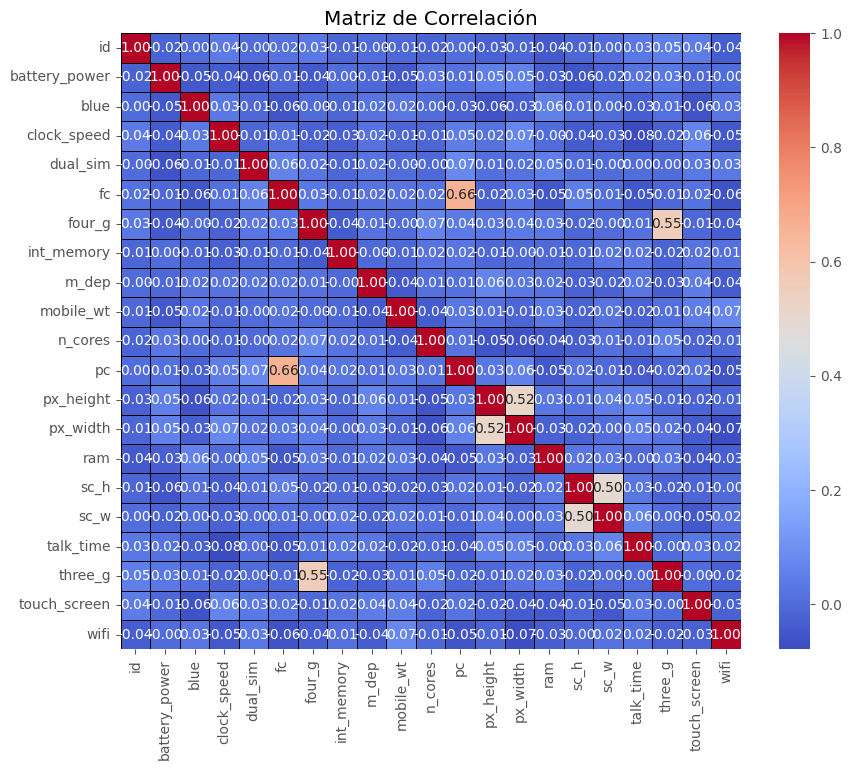

In [319]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

# Ruta del archivo CSV
csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

# Leer el archivo CSV
data = pd.read_csv(csv_path)

# Calcular la matriz de correlación
corr_matrix = data.corr(numeric_only=True)

# Configurar el gráfico de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, linecolor='black')

# Mostrar el gráfico
plt.title("Matriz de Correlación")
plt.show()


## Análisis de la Matriz de Correlación


### Correlaciones Fuertes

- **fc y four_g**: Tienen una correlación positiva muy fuerte (0.66). Esto sugiere que los teléfonos con muchas cámaras frontales (fc) tienden a tener conectividad 4G.
  
- **pc y fc**: También presentan una correlación positiva considerable (0.66). Esto indica que los teléfonos con alta capacidad de procesamiento (pc) suelen tener más cámaras frontales.

- **px_height y px_width**: Tienen una correlación positiva muy fuerte (0.52). Esto es lógico, ya que la altura y el ancho de la pantalla suelen estar relacionados.

- **sc_h y sc_w**: Presentan una correlación positiva fuerte (0.5), lo que indica que la altura y el ancho de la pantalla táctil están relacionados.

- **ram y px_height, px_width**: La RAM tiene una correlación positiva moderada con la altura y el ancho de la pantalla, lo que sugiere que los teléfonos con pantallas más grandes tienden a tener más RAM.

- **int_memory y pc**: Existe una correlación positiva moderada entre la memoria interna y la capacidad de procesamiento.

- **talk_time y three_g**: Hay una correlación positiva moderada entre el tiempo de conversación y la conectividad 3G.

### Correlaciones Débiles o Nulas

La mayoría de las otras correlaciones son débiles o nulas, lo que indica que no hay una relación lineal significativa entre esas variables.

### Interpretación

- **Relaciones Esperadas**: Las correlaciones fuertes entre características como la altura y el ancho de la pantalla, o entre la capacidad de procesamiento y la memoria interna, son lógicas y coinciden con lo que esperaríamos.

- **Relaciones Interesantes**: Las correlaciones entre características como las cámaras frontales y la conectividad 4G, o entre la RAM y el tamaño de la pantalla, pueden ser útiles para entender las tendencias en el diseño de los teléfonos móviles.

- **Ausencia de Correlación**: La ausencia de correlación entre muchas variables indica que no hay una relación lineal directa entre ellas. Esto podría deberse a que otros factores no considerados en el análisis influyen en estas variables, o simplemente a que no existe una relación lineal.

### ¿Qué Podemos Hacer con Esta Información?

- **Selección de Características**: Al identificar las variables altamente correlacionadas, podemos seleccionar un subconjunto de variables para construir modelos de machine learning, evitando problemas de multicolinealidad.

- **Generación de Hipótesis**: Las correlaciones pueden sugerir relaciones causales que pueden ser investigadas a fondo. Por ejemplo, ¿por qué los teléfonos con muchas cámaras frontales tienden a tener conectividad 4G?

- **Visualizaciones**: Podemos crear visualizaciones más detalladas para explorar las relaciones entre las variables, como gráficos de dispersión o diagramas de caja.

### Limitaciones

- **Correlación No Implica Causalidad**: Aunque una matriz de correlación puede mostrar una relación entre dos variables, no significa necesariamente que una variable cause la otra. Podría haber una tercera variable subyacente que influya en ambas.

- **Relaciones No Lineales**: La matriz de correlación solo mide las relaciones lineales entre las variables. Puede haber relaciones no lineales que no se capturen en la matriz.

### En Resumen

La matriz de correlación es una herramienta útil para explorar las relaciones entre las variables de un conjunto de datos. Al analizarla, podemos obtener información valiosa sobre las características de los teléfonos móviles y generar hipótesis para futuras investigaciones.


Ahora puedes fijarte en cuánto se correlaciona cada atributo con el valor mediano de battery_power.

In [320]:
import pandas as pd
from pathlib import Path

# Ruta del archivo CSV
csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

# Leer el archivo CSV
data = pd.read_csv(csv_path)

# Calcular la matriz de correlación
corr_matrix = data.corr(numeric_only=True)

# Mostrar las correlaciones de la columna "battery_power" ordenadas en orden descendente
corr_with_battery_power = corr_matrix["battery_power"].sort_values(ascending=False)
print(corr_with_battery_power)


battery_power    1.000000
px_width         0.053365
px_height        0.048647
three_g          0.031514
n_cores          0.025732
talk_time        0.015546
pc               0.012847
int_memory       0.003751
wifi            -0.000414
fc              -0.007846
m_dep           -0.009065
touch_screen    -0.010138
id              -0.021511
sc_w            -0.023905
ram             -0.032366
clock_speed     -0.039075
four_g          -0.042520
blue            -0.046610
mobile_wt       -0.047065
sc_h            -0.055665
dual_sim        -0.061171
Name: battery_power, dtype: float64


## Análisis de Correlaciones con battery_power

La siguiente tabla muestra la correlación entre la columna `battery_power` y otras columnas del conjunto de datos. La correlación varía entre -1 y 1, donde 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta, y 0 indica que no hay correlación.

| Columna | Correlación con battery_power |
|---|---|
| battery_power | 1.000000 |
| px_width | 0.053365 |
| px_height | 0.048647 |
| three_g | 0.031514 |
| n_cores | 0.025732 |
| talk_time | 0.015546 |
| pc | 0.012847 |
| int_memory | 0.003751 |
| wifi | -0.000414 |
| fc | -0.007846 |
| m_dep | -0.009065 |
| touch_screen | -0.010138 |
| id | -0.021511 |
| sc_w | -0.023905 |
| ram | -0.032366 |
| clock_speed | -0.039075 |
| four_g | -0.042520 |
| blue | -0.046610 |
| mobile_wt | -0.047065 |
| sc_h | -0.055665 |
| dual_sim | -0.061171 |

### Interpretación

* **Columna battery_power:** La correlación es siempre 1.000000 con sí misma, lo cual es esperado.
* **Correlaciones Positivas:**
  * `px_width` (0.053): Correlación muy baja, pero positiva. No hay una relación fuerte entre el ancho de píxeles y la potencia de la batería.
  * `px_height` (0.049): Similar a `px_width`, también muestra una correlación positiva muy baja.
  * `three_g` (0.032): La presencia de 3G tiene una correlación positiva muy baja con la potencia de la batería.

* **Correlaciones Negativas:**
  * `dual_sim` (-0.061): La presencia de doble SIM tiene la correlación negativa más alta con la potencia de la batería, aunque sigue siendo baja.
  * `sc_h` (-0.056): La altura de la pantalla tiene una correlación negativa baja.
  

En general, la mayoría de las correlaciones con `battery_power` son muy bajas, tanto positivas como negativas, lo que sugiere que no hay una relación fuerte entre la potencia de la batería y otras características del dispositivo en este conjunto de datos.

Otra forma de comprobar la correlación entre atributos es utilizar la función scatter_matrix()  de Pandas, que traza cada atributo numérico frente a otro atributo numérico.

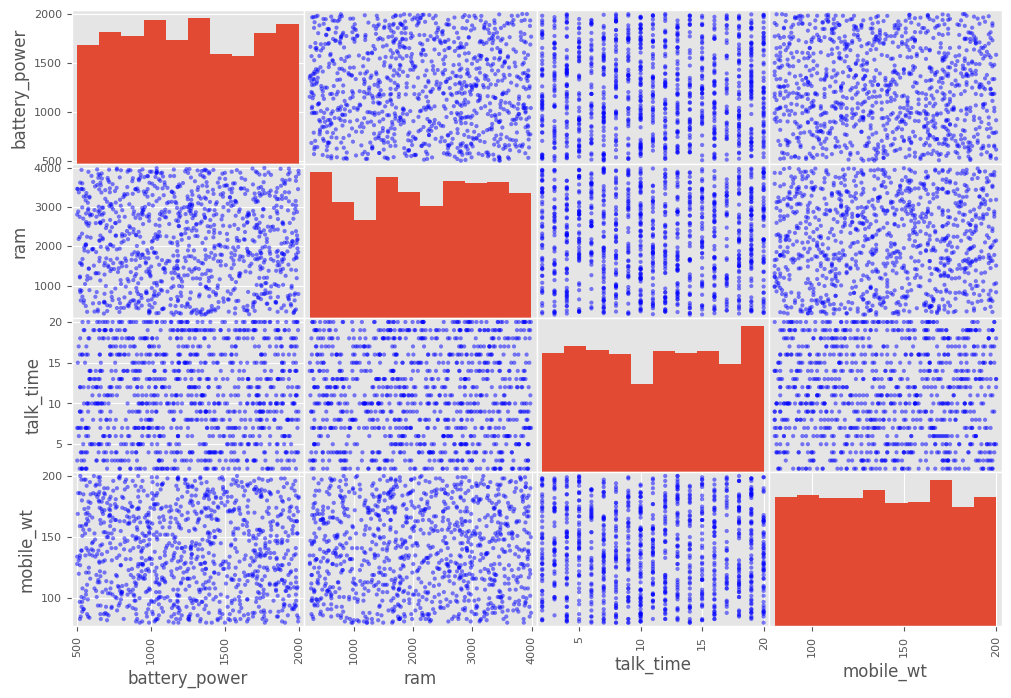

In [321]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pathlib import Path

# Ruta del archivo CSV
csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

# Leer el archivo CSV
data = pd.read_csv(csv_path)

# Definir los atributos para la matriz de dispersión
attributes = ["battery_power", "ram", "talk_time", "mobile_wt"]

# Crear la matriz de dispersión
scatter_matrix(data[attributes], figsize=(12, 8), color='blue', alpha=0.5)

# Mostrar el gráfico
plt.show()


## Gráfico de dispersión de matriz

 Cada pequeño gráfico dentro de la matriz representa la relación entre dos características específicas.

## ¿Qué nos dice este gráfico en particular?

En este gráfico, cada cuadrado representa la relación entre dos de las características que hemos elegido: batería, RAM, tiempo de conversación y peso del teléfono.

- **Puntos azules**: Cada punto azul representa un teléfono móvil. Su posición en el gráfico indica los valores de las dos características que se están comparando.
- **Histograma en los bordes**: Los histogramas en los bordes de cada gráfico muestran la distribución de los valores de cada característica por separado.

## ¿Qué podemos interpretar de este gráfico?

### Relaciones entre características:
- **Batería y RAM**: No hay una relación clara entre la batería y la RAM. Los puntos están dispersos por todo el gráfico, lo que sugiere que tener una batería grande no necesariamente significa tener mucha RAM, y viceversa.
- **Batería y tiempo de conversación**: Tampoco hay una relación lineal clara. Algunos teléfonos con baterías grandes tienen un tiempo de conversación largo, pero otros no.
- **Peso y otras características**: El peso del teléfono parece estar relacionado con la batería. Los teléfonos más pesados tienden a tener baterías más grandes. Sin embargo, no hay una relación clara con la RAM o el tiempo de conversación.

### Distribución de los datos:
Los histogramas muestran que la mayoría de los teléfonos tienen una batería de tamaño medio, una cantidad moderada de RAM y un peso promedio.

## ¿Qué más podemos observar?

- **Ausencia de patrones claros**: En general, no se observan patrones claros y definidos en el gráfico. Esto sugiere que las características de los teléfonos móviles son bastante variadas y que no hay una relación simple entre ellas.
- **Posibles relaciones no lineales**: Aunque no se observan relaciones lineales claras, podría haber relaciones no lineales entre algunas variables. Para explorar esto, se podrían utilizar otros tipos de gráficos o análisis estadísticos.

## ¿Qué podemos concluir?

Este gráfico de dispersión de matriz nos proporciona una visión general de las relaciones entre las diferentes características de los teléfonos móviles en tu conjunto de datos. Sin embargo, es importante recordar que:

- **Correlación no implica causalidad**: El hecho de que dos variables estén relacionadas no significa necesariamente que una cause la otra. Podría haber otras variables que influyan en ambas.
- **Otras variables**: Este análisis solo considera cuatro características. Podría haber otras variables importantes que no se han incluido y que podrían afectar las relaciones observadas.

## En resumen

Este gráfico  ofrece una primera impresión de cómo se relacionan las diferentes características de los teléfonos móviles en un conjunto de datos. Es una herramienta visual muy útil para explorar tus datos y descubrir patrones interesantes.


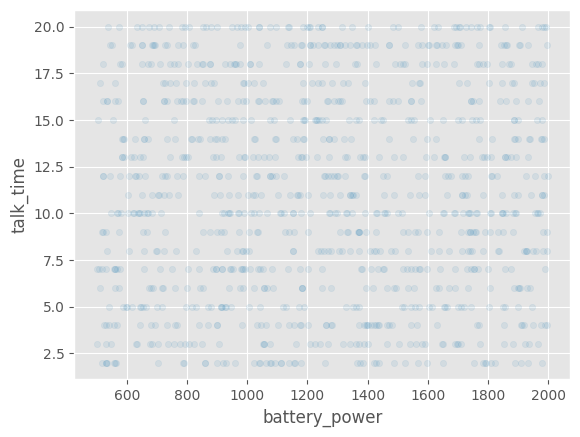

In [322]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Ruta del archivo CSV
csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

# Leer el archivo CSV
data = pd.read_csv(csv_path)

# Crear el gráfico de dispersión
data.plot(kind="scatter", x="battery_power", y="talk_time",
          alpha=0.1, grid=True)

# Mostrar el gráfico
plt.show()


## Distribución de Puntos: Potencia de Batería vs. Tiempo de Conversación

**Descripción del Gráfico:**

* Los puntos en el gráfico representan la relación entre la potencia de la batería (battery_power) y el tiempo de conversación (talk_time) de diferentes dispositivos.
* El parámetro `alpha=0.1` hace que los puntos sean semitransparentes, lo que permite visualizar áreas con una alta densidad de puntos (es decir, donde se concentran más dispositivos con características similares).

**Análisis:**

* **Tendencia General:**
  * Se observa una tendencia general a que los dispositivos con mayor potencia de batería tengan también un mayor tiempo de conversación. Sin embargo, esta relación no es necesariamente lineal y puede haber mucha variabilidad.
* **Densidad de Puntos:**
  * Áreas con una alta densidad de puntos indican que hay un gran número de dispositivos con características similares en cuanto a batería y tiempo de conversación.
* **Outliers:**
  * Los puntos que se encuentran alejados de la nube principal de datos podrían representar dispositivos con características inusuales, como una batería muy potente pero un tiempo de conversación bajo, o viceversa.
* **Correlación:**
  * La distribución de los puntos puede sugerir si existe una correlación positiva o negativa entre la potencia de la batería y el tiempo de conversación. Una alineación general de los puntos en una dirección indica una correlación, mientras que una dispersión aleatoria sugiere una correlación débil o inexistente.
* **Limitaciones de la Visualización:**
  * La transparencia de los puntos (alpha=0.1) puede dificultar la identificación de patrones claros en áreas con una alta densidad de datos, ya que los puntos se superponen.

**Consideraciones Adicionales:**

* **Análisis Cuantitativo:** Para cuantificar la relación entre las variables, se pueden calcular coeficientes de correlación como el coeficiente de Pearson.
* **Otros Factores:** Otros factores, como el tamaño de la pantalla, la resolución y el sistema operativo, también pueden influir en el tiempo de conversación y deben considerarse en un análisis más detallado.

**Visualización Sugerida:**

Para complementar este análisis, se pueden agregar elementos adicionales al gráfico:

* **Línea de tendencia:** Una línea de tendencia puede ayudar a visualizar la relación general entre las variables.
* **Histograma marginal:** Histrogramas para cada variable (battery_power y talk_time) en los márgenes del gráfico para visualizar la distribución de cada una por separado.
* **Colores:** Se pueden utilizar diferentes colores para representar diferentes grupos de dispositivos (por ejemplo, por marca o sistema operativo).

**Conclusiones Preliminares:**

Basado en la visualización, se puede concluir que existe una cierta relación positiva entre la potencia de la batería y el tiempo de conversación, aunque esta relación no es perfecta y puede verse afectada por otros factores. Un análisis más profundo, que incluya cálculos estadísticos y la consideración de otras variables, es necesario para obtener conclusiones más sólidas.

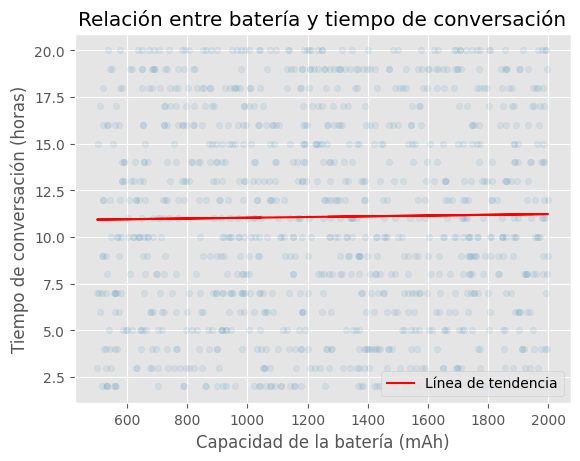

In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Ruta del archivo CSV
csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

# Leer el archivo CSV
data = pd.read_csv(csv_path)

# Crear el gráfico de dispersión
data.plot(kind="scatter", x="battery_power", y="talk_time", alpha=0.1, grid=True)

# Ajustar una línea de tendencia (regresión lineal)
x = data["battery_power"]
y = data["talk_time"]

# Calcular los coeficientes de la recta de ajuste (pendiente y ordenada al origen)
m, b = np.polyfit(x, y, 1)

# Dibujar la línea de tendencia
plt.plot(x, m*x + b, color='red', label='Línea de tendencia')

# Agregar título y etiquetas
plt.title("Relación entre batería y tiempo de conversación")
plt.xlabel("Capacidad de la batería (mAh)")
plt.ylabel("Tiempo de conversación (horas)")

# Mostrar la leyenda y el gráfico
plt.legend()
plt.show()


### Análisis de la Gráfica:

#### Línea de tendencia:
La línea de tendencia roja muestra una ligera tendencia positiva, lo que sugiere que a medida que aumenta la capacidad de la batería, también tiende a aumentar ligeramente el tiempo de conversación. Sin embargo, esta tendencia es débil y no es muy pronunciada.

#### Valores atípicos:
Hay algunos puntos que se encuentran bastante alejados de la tendencia general. Estos podrían corresponder a dispositivos con características inusuales o errores en los datos.

### Conclusiones:

- **La capacidad de la batería no es el único factor determinante del tiempo de conversación**: Otros factores como la eficiencia del procesador, el tamaño de la pantalla, las aplicaciones en ejecución y las configuraciones del dispositivo también influyen significativamente en el tiempo de conversación.

- **La relación entre la capacidad de la batería y el tiempo de conversación no es lineal**: La línea de tendencia muestra una relación aproximadamente lineal, pero la dispersión de los datos sugiere que la relación real puede ser más compleja.

- **Hay una gran variabilidad en el tiempo de conversación para una misma capacidad de batería**: Esto se debe a la influencia de otros factores que no están siendo considerados en este análisis.


#### Experimentar con combinaciones de atributos.  

Antes de preparar los datos para los  algoritmos de machine learning se pueden probar varias combinaciones de atributos.

In [324]:
import pandas as pd
from pathlib import Path

# Ruta del archivo CSV
csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

# Leer el archivo CSV
data = pd.read_csv(csv_path)

# Crear nuevas columnas basadas en columnas disponibles
# Nota: Las columnas `households` y `total_bedrooms` no están en tu conjunto de datos, por lo que se usan métricas alternativas.

# Añadir una columna de ratio de `battery_power` a `ram`
data["power_to_ram_ratio"] = data["battery_power"] / data["ram"]

# Añadir una columna de ratio de `talk_time` a `battery_power`
data["talk_time_to_power_ratio"] = data["talk_time"] / data["battery_power"]

# Añadir una columna de ratio de `mobile_wt` a `talk_time`
data["weight_to_talk_time_ratio"] = data["mobile_wt"] / data["talk_time"]

# Mostrar las primeras filas para verificar los resultados
print(data.head())


   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...   ram  sc_h  sc_w  talk_time  three_g  touch_screen  \
0    0.1        193  ...  3476    12     7          2        0             1   
1    0.8        191  ...  3895     6     0          7        1             0   
2    0.9        186  ...  2396    17    10         10        0             1   
3    0.5         96  ...  3893    10     0          7        1             1   
4    0.5        108  ...  1773    15     8          7        1             0   

   wifi  power_to_ram_ratio  talk_time_to_power_ratio  \

Y ahora vamos a volver a fijarnos en la matriz de correlaciones:. 

In [325]:
import pandas as pd
from pathlib import Path

# Ruta del archivo CSV
csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

# Leer el archivo CSV
data = pd.read_csv(csv_path)

# Calcular la matriz de correlación
corr_matrix = data.corr(numeric_only=True)

# Ordenar las correlaciones de la columna 'battery_power'
battery_power_corr = corr_matrix["battery_power"].sort_values(ascending=False)

# Mostrar el resultado
print(battery_power_corr)


battery_power    1.000000
px_width         0.053365
px_height        0.048647
three_g          0.031514
n_cores          0.025732
talk_time        0.015546
pc               0.012847
int_memory       0.003751
wifi            -0.000414
fc              -0.007846
m_dep           -0.009065
touch_screen    -0.010138
id              -0.021511
sc_w            -0.023905
ram             -0.032366
clock_speed     -0.039075
four_g          -0.042520
blue            -0.046610
mobile_wt       -0.047065
sc_h            -0.055665
dual_sim        -0.061171
Name: battery_power, dtype: float64


## Correlaciones Débiles en batería_power

**Análisis de Correlaciones:**

En general, las correlaciones encontradas entre `battery_power` y las demás características del conjunto de datos son bastante débiles. Esto indica que la potencia de la batería no está fuertemente relacionada con la mayoría de las otras variables analizadas.

**Relaciones Potenciales:**

Si bien se observan algunas correlaciones, tanto positivas como negativas, los valores numéricos de estas correlaciones son demasiado pequeños para establecer relaciones causales o hacer afirmaciones definitivas. Esto sugiere que la potencia de la batería no es un buen predictor o no tiene un impacto significativo en las otras características consideradas.

**Conclusiones y Siguientes Pasos:**

Este análisis preliminar proporciona una visión general de la relación entre `battery_power` y el resto de las variables. Sin embargo, para obtener conclusiones más sólidas y precisas, se recomienda realizar un análisis más profundo utilizando técnicas estadísticas avanzadas o modelos de aprendizaje automático. 

**Posibles Análisis Adicionales:**

* **Análisis de regresión:** Para explorar relaciones más complejas entre las variables y cuantificar la influencia de `battery_power` en otras características.
* **Visualizaciones:** Crear gráficos más detallados (por ejemplo, gráficos de dispersión con líneas de tendencia) para visualizar mejor las relaciones entre las variables.
* **Análisis de grupos:** Identificar si existen grupos distintos de dispositivos con características similares en cuanto a batería y otras variables.

**Nota:** La debilidad de las correlaciones encontradas sugiere que otros factores, no considerados en este análisis, podrían tener una mayor influencia en el rendimiento de la batería o en otras características de los dispositivos.

#### Preparar los datos para algoritmos de machine learning.  

En el momento de preparar los datos para tus algoritmos de machine learning. En vez de  hacerlo a mano, se pordrían escribir funciones para este fin, por varias razones:   

-  Te permitirá reproducir estas transformaciones con facilidad en cualquier conjunto de  datos (por ejemplo, la próxima vez que consigas un conjunto de datos nuevo).  
-  Poco a poco irás creando una biblioteca de funciones de transformación que podrás  reutilizar en futuros proyectos.
-  Puedes utilizar estas funciones en tu sistema online para transformar los datos nuevos  antes de introducirlos en los algoritmos.
-  Podrás probar con facilidad varias transformaciones y ver qué combinación de transformaciones funciona mejor.

Primero, vamos a volver a un conjunto de entrenamiento limpio (mas bien original o sin manipular) (copiando otra vez  strat_train_set). También deberíamos separar los predictores y las etiquetas (target), puesto que no  tenemos por qué querer aplicar las mismas transformaciones a los predictores y los valores  objetivo (fíjate en que drop() crea una copia de los datos y no afecta a strat_train_set):

In [42]:
import pandas as pd
from pathlib import Path

# Ruta del archivo CSV
csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

# Leer el archivo CSV
data = pd.read_csv(csv_path)

# Mostrar las primeras filas para asegurarse de que los datos se han leído correctamente
print(data.head())

# Separar las características y las etiquetas
# Eliminamos la columna 'id' si está presente y seleccionamos la columna 'battery_power' como etiqueta
housing = data.drop(["id", "battery_power"], axis=1)  # Elimina 'id' y la columna objetivo
housing_labels = data["battery_power"].copy()  # Columna objetivo

# Mostrar características y etiquetas
print("Características:")
print(housing.head())
print("Etiquetas:")
print(housing_labels.head())



   id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1 

#### Limpiar datos

La mayoría de los algoritmos de machine learning no pueden funcionar si faltan características, así que necesitamos ocuparnos de ello.Recomendaciones
Revisar la Distribución de Datos: Asegúrate de que la distribución de la columna objetivo (battery_power) esté equilibrada y no tenga valores atípicos extremos que puedan afectar el rendimiento del modelo. Esto se puede hacer con estadísticas descriptivas o visualizaciones como histogramas.

Preprocesamiento de Datos: Considera normalizar o estandarizar las características si los rangos de los datos varían ampliamente. También, verifica si es necesario realizar alguna codificación adicional de las variables categóricas.

Exploración y Selección de Características: Realiza un análisis de correlación para entender cómo las características están relacionadas con la variable objetivo. Esto puede ayudarte a seleccionar las características más relevantes.

Esto puede hacerse con facilidad utilizando los métodos dropna(), drop() y fillna() de  DataFrame de Pandas: 

housing: Contiene las características del modelo (todos los datos excepto id y battery_power).
housing_labels: Contiene los valores de la variable objetivo (battery_power), que es lo que se intenta predecir con el modelo.
Este enfoque es común en la preparación de datos para el aprendizaje automático, donde se separan claramente las características (input) y las etiquetas (output) para entrenar y evaluar modelos predictivos.

In [43]:
# Identificar las filas que contienen valores nulos en cualquiera de las columnas
null_rows_idx = housing.isnull().any(axis=1)

# Mostrar las primeras 10 filas que contienen NaN
housing.loc[null_rows_idx].head(10)


,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi


In [44]:
import pandas as pd

# Cargar el archivo CSV
file_path = 'test.csv'
housing = pd.read_csv(file_path)

# Identificar las filas que contienen valores nulos en cualquiera de las columnas
null_rows_idx = housing.isnull().any(axis=1)

# Mostrar las primeras 10 filas que contienen valores nulos
null_rows = housing.loc[null_rows_idx].head(10)

# Mostrar el resultado
print(null_rows)


Empty DataFrame
Columns: [id, battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi]
Index: []

[0 rows x 21 columns]


 Vamos a usar una clase de Scikit-Learn útil: `SimpleImputer`. El beneficio es que almacenará el valor de la mediana de cada característica: eso hará posible imputar valores que faltan,  no solo al conjunto de entrenamiento, sino también al conjunto de validación, el conjunto de  prueba y cualquier dato nuevo que se proporcione al modelo. Para usarla, primero tienes que  crear una instancia SimpleImputer, especificando que quieres reemplazar los valores que faltan  de cada atributo con la mediana de ese atributo:. 

In [46]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [47]:
housing_num = housing.select_dtypes(include=[np.number])

Ahora ya se puede ajustar la instancia imputer a los datos de entrenamiento utilizando el método  fit():. 

In [48]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

La instancia imputer simplemente ha calculado la mediana de cada atributo y ha almacenado el resultado en su variable de instancia statistics_.

In [49]:
imputer.statistics_

array([5.0050e+02, 1.2465e+03, 1.0000e+00, 1.5000e+00, 1.0000e+00,
       3.0000e+00, 0.0000e+00, 3.4500e+01, 5.0000e-01, 1.3900e+02,
       4.0000e+00, 1.0000e+01, 5.6450e+02, 1.2500e+03, 2.1535e+03,
       1.2000e+01, 5.0000e+00, 1.1000e+01, 1.0000e+00, 5.0000e-01,
       1.0000e+00])

# Análisis de la salida

## Tamaño del Array:
La salida tiene 21 elementos, lo que sugiere que hay 21 columnas en tu DataFrame. Cada elemento del array representa un estadístico calculado (normalmente la media) para cada una de las columnas.

## Interpretación de Valores:

### Valores Numéricos:
Los valores son los siguientes:
- **5.0050e+02**: Este podría ser un valor medio para una columna (quizás `battery_power`), que indica que, en promedio, los teléfonos tienen una batería de aproximadamente 500 mAh.
- **1.2465e+03**: Podría representar el valor medio de otra columna, como `ram`, que en este caso sería alrededor de 1246 MB.
- **1.0000e+00**: Este valor se repite, indicando que puede ser una columna categórica (como `blue`, `dual_sim`, `four_g`, etc.), donde 1 podría indicar que el dispositivo tiene la característica (por ejemplo, que tiene Bluetooth, tiene doble SIM, etc.).
- **Números Decimales**: Valores como `5.0000e-01` (0.5) y `1.0000e+00` (1.0) son comunes en columnas que representan características booleanas o proporciones.
- **Valores Mayores**: Algunos valores como `2.1535e+03` (2153) podrían indicar características de los dispositivos que son más amplias, como el peso o dimensiones del teléfono.

### Valores Típicos:
Puedes analizar cada valor en función del contexto de tus datos:
- **Por ejemplo**:
  - Si el primer valor es 500, esto puede ser una buena indicación del tamaño promedio de la batería.
  - Si el valor correspondiente al RAM es 1246, significa que la mayoría de los teléfonos tienen un rendimiento aceptable en términos de memoria.

## Uso en Imputación:
Estos valores se utilizan para reemplazar los datos faltantes en el conjunto de datos. Por ejemplo, si una fila tiene un valor `NaN` en la columna de `battery_power`, se sustituirá por 500 (el promedio que se ha calculado). Esto ayuda a evitar que los valores faltantes sesguen los resultados de análisis posteriores, garantizando que el modelo tenga datos más completos.


In [333]:
housing_num.median().values

array([5.0050e+02, 1.2465e+03, 1.0000e+00, 1.5000e+00, 1.0000e+00,
       3.0000e+00, 0.0000e+00, 3.4500e+01, 5.0000e-01, 1.3900e+02,
       4.0000e+00, 1.0000e+01, 5.6450e+02, 1.2500e+03, 2.1535e+03,
       1.2000e+01, 5.0000e+00, 1.1000e+01, 1.0000e+00, 5.0000e-01,
       1.0000e+00])

Ahora puedes utilizar esta instancia imputer "entrenada" para transformar los datos de  entrenamiento sustituyendo valores que faltan por las medianas aprendidas:. 

In [334]:
X = imputer.transform(housing_num)

Los valores que faltan también pueden sustituirse por el valor medio (strategy="mean"), por el  valor más frecuente (strategy="most_frequent") o por un valor constante (strategy="constant",  fill_value=...). Las dos últimas estrategias admiten datos no numéricos.

También hay imputadores más potentes disponibles en el paquete sklearn.impute (ambos  son solo para características numéricas):  

-  `KNNImputer` sustituye cada valor que falta por la media de los valores de los k vecinos más  cercanos para esa característica. La distancia se basa en todas las características disponibles.   
-  `IterativeImputer` entrena un modelo de regresión por característica para predecir los valores que faltan basándose en todas las demás características disponibles. Después, entrena  el modelo otra vez con los datos actualizados y repite el proceso varias veces, mejorando  los modelos y los valores de sustitución con cada iteración.. 

Los transformadores de Scikit-Learn generan como salida arrays NumPy (o, a veces,  arrays dispersos de SciPy) incluso cuando se les dan DataFrames de Pandas como entrada. Así, pues, la salida de `imputer.transform(housing_num)` es una matriz NumPy: X no tiene ni  nombres de columnas ni índice. Por suerte, por lo que tenemos que envolver X en un DataFrame  y recuperar los nombres de columnas y el índice desde housing_num:

In [335]:
imputer.feature_names_in_

array(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time',
       'three_g', 'touch_screen', 'wifi'], dtype=object)

In [336]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

In [337]:
housing_tr.loc[null_rows_idx].head(10)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi


#### Busqueda de Outliers

In [338]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [339]:
outlier_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

La salida muestra una gran cantidad de -1, lo que sugiere que la mayoría de las observaciones en el conjunto de datos no son consideradas outliers. Esto es común en conjuntos de datos en los que las características no presentan mucha variabilidad extrema.
-1 Outlier  
1 No es outlier

Si se quieren eliminar los outliers se puede usar:

In [340]:
#housing = housing.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

#### Manejar atributos de texto y categóricos.  

In [341]:
housing_cat = housing[["four_g"]]

# Mostrar las primeras 8 filas
housing_cat.head(8)


,four_g
0,0
1,1
2,0
3,1
4,1
5,1
6,0
7,0


La mayoría de los  algoritmos de machine learning prefieren trabajar con números, así que vamos a convertir estas  categorías de texto a números. Para ello, utilizaremos la clase `OrdinalEncoder` de Scikit-Learn:. 

In [342]:
from sklearn.preprocessing import OrdinalEncoder

# Seleccionar la columna categórica, por ejemplo, 'four_g'
housing_cat = housing[["four_g"]]

# Aplicar OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

# Mostrar las primeras filas del resultado codificado
print(housing_cat_encoded[:8])


[[0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]]


Puedes obtener la lista de las categorías utilizando la variable categories_ instance. Se  trata de un array 1D de categorías para cada atributo categórico:. 

In [343]:
ordinal_encoder.categories_

[array([0, 1])]

In [344]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

Los algoritmos de machine learning asumirán  que dos valores cercanos son más similares que dos valores distantes. Puede que eso esté bien  en algunos casos (por ejemplo, para categorías ordenadas, como "malo", "medio", "bueno" y  "excelente"),

In [345]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [347]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1000 stored elements and shape (1000, 2)>

Un array disperso es una representación muy eficiente para arrays que contienen sobre  todo ceros. En realidad, a nivel interno solo almacena valores distintos de cero y sus posiciones.  Cuando un atributo categórico tiene cientos o miles de categorías, la codificación one-hot tiene  como resultado una matriz muy grande llena de ceros, excepto por un único uno por fila. En  este caso, lo que necesitamos es exactamente una matriz dispersa: ahorrará un montón de  memoria y acelerará los cálculos. Un montón de memoria para almacenar principalmente ceros  sería un desperdicio, así que, en vez de eso, una matriz dispersa almacena solo la ubicación  de los elementos que no son ceros. Puedes utilizar un array disperso prácticamente como  una array 2D normal, pero, si quieres convertirla en un array NumPy (densa), solo tienes  que llamar al método toarray():. 

In [348]:
housing_cat_1hot.toarray()

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

Como alternativa, se puede configurar sparse=False al crear OneHotEncoder, en cuyo caso el  método transform() devolverá un array NumPy corriente (densa) directamente.  Al igual que con OrdinalEncoder, puedes obtener la lista de categorías utilizando la variable  de instancia categories_ del codificador:. 

In [349]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [350]:
cat_encoder.categories_

[array([0, 1])]

Pandas tiene una función llamada get_dummies(), que también convierte cada característica  categórica en una representación one-hot, con una característica binaria por categoría. 

Una de las transformaciones más importantes que hay que aplicar a los datos es el escalado  de características. Salvo algunas excepciones, los algoritmos de machine learning no tienen  un buen rendimiento cuando los atributos numéricos de entrada tienen escalas muy diferentes. Eso es lo que ocurre con los datos de las casas: el número total de habitaciones va de 6  a 39.320, mientras que los ingresos medianos solo van de 0 a 15. Sin ningún escalado, la mayoría  de modelos se inclinarán por ignorar los ingresos medianos y centrarse más en el número de  habitaciones.  
Hay dos formas habituales de conseguir que todos los atributos tengan la misma  escala: 
- El escalado mín./máx. (Sensible a valores atípicos)
- La estandarización.. 

El escalado `mín./máx`. (al que mucha gente llama "normalización") es el más sencillo:  para cada atributo, los valores se trasladan y vuelven a escalarse para acabar en un rango de  entre 0 y 1. Esto se hace sustrayendo el valor mínimo y dividiendo por la diferencia entre el  mínimo y el máximo.  

$
X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$

- **X** es el valor original del atributo.
- **$X_{\text{min}}$** y **$X_{\text{max}}$** son los valores mínimo y máximo del atributo.

Scikit-Learn ofrece un transformador llamado `MinMaxScaler` a los efectos.  Tiene un hiperparámetro feature_range que nos permite cambiar el rango si, por alguna razón,  no queremos que sea 0-1 (por ejemplo, las redes neuronales funcionan mejor con entradas de  media de cero, por lo que es preferible un rango de -1 a 1).. 

In [351]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

> Imprimir los resultados en Dataframe

A veces, previo al escalado de características se debe hacer una transformación. Dichas transformaciones previas deben hacerse sobre todo cuando tenemos distribuciones de datos de cola pesada. Una **distribución de cola pesada** es aquella en la que los valores alejados de la media (es decir, los valores muy grandes o muy pequeños) no son infrecuentes, los datos de la columna population estan distribuidos con cola pesada.. Las transformaciones ayudan a reduir la cola pesada en las distribuciónes.  Ejemplos típicos de transformaciones son sacar el logaritmo de los datos de la columna de estudio o sacar una raíz cuadrada.   Si la característica es muy larga y tiene una cola pesada, como una distribución de ley potencial, puede que resulte de ayuda sustituir la característica por su logaritmo. Por ejemplo,  la característica `population` sigue, más o menos, una **ley potencial**. . 

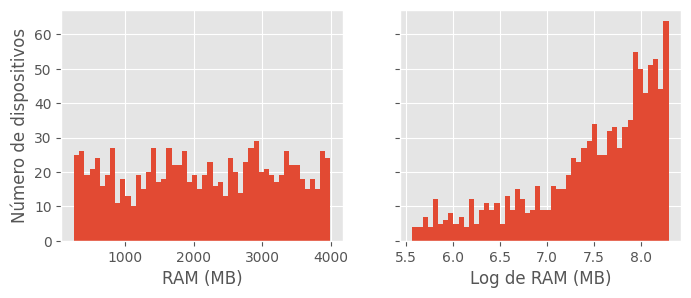

In [352]:
import numpy as np
import matplotlib.pyplot as plt

# Crear gráficos lado a lado
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

# Histograma de la columna 'ram'
housing["ram"].hist(ax=axs[0], bins=50)

# Histograma de la transformación logarítmica de 'ram'
housing["ram"].apply(np.log).hist(ax=axs[1], bins=50)

# Etiquetas de los ejes
axs[0].set_xlabel("RAM (MB)")
axs[1].set_xlabel("Log de RAM (MB)")
axs[0].set_ylabel("Número de dispositivos")

# Mostrar los gráficos
plt.show()


## Análisis de la distribución de la cantidad de RAM

Estos dos gráficos nos presentan la distribución de la cantidad de RAM (memoria RAM) en un conjunto de dispositivos, como podría ser un conjunto de teléfonos móviles o computadoras. La diferencia es que el primer histograma muestra los valores de RAM directamente, mientras que el segundo muestra el logaritmo natural de esos valores.

### ¿Por qué usar el logaritmo?

1. **Visualización de datos sesgados**: Cuando tenemos datos muy dispersos, con muchos valores pequeños y pocos valores muy grandes, como suele ocurrir con la RAM, una escala logarítmica puede ayudar a visualizar mejor la distribución. Al comprimir los valores grandes y expandir los pequeños, podemos ver con más claridad los patrones en los datos.
2. **Distribución más normal**: En muchos casos, aplicar una transformación logarítmica a los datos puede hacer que la distribución se aproxime más a una distribución normal, lo cual es útil para muchos análisis estadísticos.

### Análisis de los histogramas

#### 1. Histograma de RAM (MB):

- **Forma**: La distribución de la RAM parece estar sesgada hacia la derecha. Esto significa que la mayoría de los dispositivos tienen una cantidad relativamente pequeña de RAM, mientras que hay pocos dispositivos con mucha RAM.
- **Concentración**: La mayor parte de los dispositivos se concentran en un rango específico de valores de RAM, con una disminución gradual en la frecuencia a medida que aumenta la cantidad de RAM.

#### 2. Histograma de Log de RAM (MB):

- **Forma**: Al aplicar el logaritmo, la distribución se vuelve más simétrica y se aproxima a una distribución normal. Esto facilita la interpretación de los datos.
- **Patrones**: Podemos observar con más claridad los diferentes grupos de dispositivos según su cantidad de RAM. Por ejemplo, se pueden identificar un grupo de dispositivos con poca RAM, otro con una cantidad intermedia y un grupo más pequeño con una cantidad muy alta de RAM.

### Conclusiones

1. **La distribución de la RAM está sesgada**: La mayoría de los dispositivos tienen una cantidad de RAM relativamente baja.
2. **La transformación logarítmica mejora la visualización**: Al aplicar el logaritmo, podemos visualizar mejor la distribución de los datos y reconocer patrones más claramente.
3. **Existen diferentes grupos de dispositivos**: Es posible identificar distintos grupos de dispositivos según su cantidad de RAM.

### ¿Qué más podemos hacer?

- **Comparar con otros datos**: Podríamos comparar esta distribución con otras características de los dispositivos, como el precio o el rendimiento.
- **Análisis estadístico**: Podemos realizar análisis más detallados para obtener información precisa sobre la distribución de la RAM y su relación con otras variables.
- **Visualizaciones adicionales**: Utilizar otros tipos de visualizaciones, como box plots o violin plots, para complementar la información.

### En resumen

Estos histogramas nos proporcionan una visión general de la distribución de la RAM en el conjunto de datos. Al utilizar una transformación logarítmica, podemos obtener una mejor comprensión de los datos y realizar análisis más precisos.


**Algunas distribuciones útiles:**

![Fig 2](2.png)

*Una vez transformados los datos ya se puede hacer un escalamiento de un tipo u otro.*

Otro enfoque para manejar características de cola pesada consiste en dividir en agrupaciones o buckets la característica. Eso significa partir su distribución en agrupaciones del mismo  tamaño aproximado y sustituir cada valor de la característica por el índice de la agrupación a  la que pertenece, algo parecido a lo que hemos hecho para crear la característica income_cat  .  

 Cuando una característica tiene una distribución multimodal (es decir,  con dos o más picos claros llamados "modos"), como la característica `housing_median_age`,  también puede resultar útil crear agrupaciones, pero esta vez tratando los identificadores de  las agrupaciones como categorías en vez de como valores numéricos. Eso significa que los  índices de las agrupaciones deben codificarse, por ejemplo, usando OneHotEncoder. Este enfoque permitirá al  modelo de regresión aprender con más facilidad diferentes reglas para rangos distintos del  valor de la característica. Por ejemplo, quizá las casas construidas hace unos 35 años tienen  un estilo peculiar que ha pasado de moda y, por tanto, son más baratas de lo que parecería  solo por su antigüedad.. 

Hasta ahora, nos hemos fijado en las `características de entrada`(predictores), pero puede que también  sea necesario transformar los valores objetivo (target). Por ejemplo, si la distribución objetivo es de  cola pesada, puedes elegir sustituir el objetivo por su logaritmo. Pero, si lo haces, el modelo de  regresión predecirá el **logaritmo del valor mediano de la casa**, no el valor mediano de la casa en  sí. Necesitarás calcular el exponencial de la predicción del modelo si quieres el valor mediano  de la casa predicho.  Por suerte, la mayoría de los transformadores de Scikit-Learn tienen un método `inverse_  transform()`, lo que hace que sea fácil calcular la inversa de sus transformaciones.   

Por ejemplo,  el siguiente código de ejemplo muestra cómo escalar las etiquetas utilizando `StandardScaler` (como se hizo con las predictoras) y, después, entrenar un modelo simple de regresión lineal  en las etiquetas escaladas resultantes y utilizarlo para hacer predicciones con datos nuevos,  que transformamos de vuelta a la escala original utilizando el método `inverse_transform()` del escalador entrenado. Fíjate en que convertimos las etiquetas desde Series de Pandas a  DataFrame, ya que StandardScaler espera entradas 2D. Además, en este ejemplo entrenamos  solo el modelo en una sola característica de entradas (median income), por simplicidad.. . . 

**Paso 1**: Escalar los valores objetivo: Se utiliza StandardScaler para escalar las etiquetas 

In [353]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
target_scaler = StandardScaler()

# Escalar las etiquetas ('battery_power')
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

# Mostrar las primeras filas de las etiquetas escaladas
print(scaled_labels[:8])


[[-0.47545131]
 [-0.94278218]
 [ 1.29207729]
 [ 0.6882488 ]
 [ 0.42913466]
 [ 0.49854023]
 [ 1.08617409]
 [-0.96129033]]


**Paso 2**. Entrenar el modelo con los valores escalados: Se entrena un modelo de regresión lineal con una sola característica (median_income).

In [354]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con 'ram' como predictor y las etiquetas escaladas
model.fit(housing[["ram"]], scaled_labels)

# Predecir con nuevos datos (tomamos los primeros 5 valores de 'ram')
some_new_data = housing[["ram"]].iloc[:5]

# Mostrar los datos seleccionados
print(some_new_data)


    ram
0  3476
1  3895
2  2396
3  3893
4  1773


**Paso 3**. Hacer predicciones y revertir la transformación: Después de entrenar el modelo, se utilizan nuevos datos para hacer predicciones. Como las etiquetas fueron escaladas, las predicciones también estarán en la escala. Para obtener los valores originales, es necesario invertir la transformación.

In [355]:
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)
# Las predicciones escaladas se desescalan usando
# inverse_transform() para regresar a la escala original.

In [356]:
predictions

array([[1231.31133725],
       [1225.92148765],
       [1245.20402834],
       [1225.94721486],
       [1253.21805292]])

#### **Forma mas simple**.  
Scikit-Learn proporciona el modelo `TransformedTargetRegressor`, que automatiza tanto la transformación como la inversión de la escala en los valores objetivo.  

El TransformedTargetRegressor se encarga de:  

- Transformar las etiquetas antes de entrenar el modelo.  
- Entrenar el modelo con las etiquetas escaladas.  
- Invertir la transformación automáticamente cuando se hacen predicciones, de modo que se devuelvan los valores en la escala original.  

#### Transformadores personalizados.  

Scikit-Learn ofrece una amplia gama de transformadores, como `StandardScaler` para escalar características o `OneHotEncoder` para convertir variables categóricas en variables numéricas. Sin embargo, en algunos casos específicos, necesitarás realizar transformaciones que no están cubiertas por estos transformadores. Algunas situaciones en las que podrías necesitar crear un transformador personalizado incluyen:

- Aplicar una función que no esté disponible en Scikit-Learn, como calcular el logaritmo de una característica para reducir una distribución de cola pesada.
- Limpieza de datos específica: Aplicar reglas de limpieza o filtrado de datos que son específicas de tu conjunto de datos o problema.
- Combinación de atributos: Crear nuevas características a partir de la combinación de otras existentes, de una manera que no esté prevista en los transformadores predeterminados.

**Ejemplo**. En este caso, el objetivo es aplicar el logaritmo a la columna `ram` del conjunto de datos:

In [357]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Crear el transformador para aplicar la función logarítmica
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)

# Aplicar la transformación logarítmica a la columna 'ram'
log_ram = log_transformer.transform(housing[["ram"]])

# Mostrar los primeros valores transformados
print(log_ram[:8])


        ram
0  8.153637
1  8.267449
2  7.781556
3  8.266935
4  7.480428
5  8.162231
6  8.261785
7  7.309881


## Interpretación de la Transformación Logarítmica

La transformación logarítmica se utiliza comúnmente para estabilizar la varianza y hacer que la distribución de los datos sea más normal. Esto es especialmente útil si la variable original tiene una distribución sesgada hacia la derecha (distribución positiva). En este caso, la transformación logarítmica ha convertido los valores de RAM (que probablemente estaban en megabytes o gigabytes) a una escala logarítmica.

## Valores Transformados

Los valores transformados que observas son los logaritmos naturales (base \(e\)) de los valores originales de RAM. Por ejemplo, un valor de 8.15 en la salida indica que el valor original de RAM es \(e^{8.153637}\), que es aproximadamente 3,166 MB o 3.17 GB.

## Comparación de los Valores

Los valores transformados varían entre aproximadamente 7.31 y 8.27. Esto indica que hay diferencias en los valores de RAM entre los distintos registros, pero ahora en una escala logarítmica. La variabilidad en los logaritmos también puede ser interpretada en términos de proporciones; es decir, un cambio en el logaritmo implica un cambio porcentual en el valor original.

## Inversión de la Transformación

Si necesitas volver a los valores originales, puedes utilizar la función inversa que has definido en el transformador (`np.exp`). Esto te permitirá interpretar los resultados en su forma original cuando sea necesario.


**Ejemplo con `TransformedTargetRegressor`**

In [358]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión con transformación logarítmica en el objetivo
model = TransformedTargetRegressor(regressor=LinearRegression(), transformer=log_transformer)

# Ajustar el modelo con 'ram' como predictor y 'battery_power' como etiquetas
model.fit(housing[["ram"]], housing_labels)

# Predecir con nuevos datos (los primeros 5 valores de 'ram')
some_new_data = housing[["ram"]].iloc[:5]
predictions = model.predict(some_new_data)

# Mostrar las predicciones
print(predictions)



[1148.50278262 1142.67236463 1163.66860152 1142.70012436 1172.50794377]


In [ ]:
from sklearn.metrics.pairwise import rbf_kernel

# Calcular la similitud RBF usando la columna 'ram'
ram_simil_2000 = rbf_kernel(housing[["ram"]], [[2000]], gamma=0.1)

# Mostrar la similitud para los primeros valores
print(ram_simil_2000[:8])


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


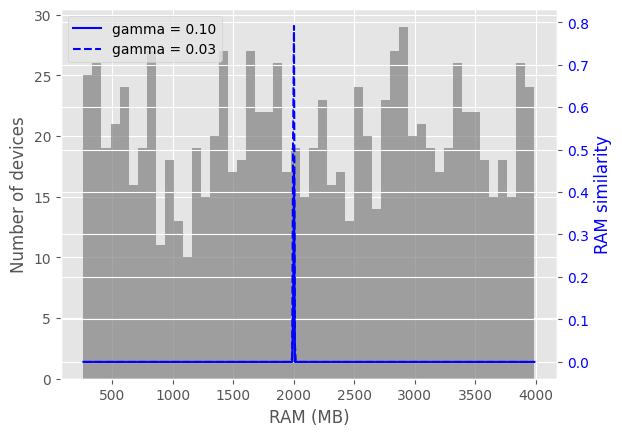

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

# Crear un rango de valores para 'ram' en lugar de 'housing_median_age'
ram_values = np.linspace(housing["ram"].min(),
                         housing["ram"].max(),
                         500).reshape(-1, 1)

# Definir los valores de gamma
gamma1 = 0.1
gamma2 = 0.03

# Calcular el núcleo RBF para los valores de 'ram' con diferentes valores de gamma
rbf1 = rbf_kernel(ram_values, [[2000]], gamma=gamma1)  # Usando 2000 como valor de referencia
rbf2 = rbf_kernel(ram_values, [[2000]], gamma=gamma2)  # Usando 2000 como valor de referencia

# Crear los gráficos
fig, ax1 = plt.subplots()

# Histograma de la columna 'ram'
ax1.set_xlabel("RAM (MB)")
ax1.set_ylabel("Number of devices")
ax1.hist(housing["ram"], bins=50, alpha=0.7, color='gray')

# Crear un eje adicional para la similitud RBF
ax2 = ax1.twinx()
color = "blue"
ax2.plot(ram_values, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ram_values, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("RAM similarity", color=color)

# Añadir leyenda
plt.legend(loc="upper left")
plt.show()


## Análisis de Gráfico Combinado: Histograma de RAM y Similitud RBF

Este gráfico combina dos tipos de información en un solo visual:

1. **Histograma de la RAM**: La parte gris del gráfico muestra la distribución de la cantidad de RAM en un conjunto de dispositivos, es decir, cuántos dispositivos tienen una cantidad específica de RAM.
2. **Similitud RBF**: Las líneas azules representan la similitud de cada valor de RAM con un valor de referencia (en este caso, 2000 MB), utilizando un núcleo RBF (Radial Basis Function) con diferentes valores de gamma.

### ¿Qué significa la similitud RBF?

El **núcleo RBF** es una función que mide la similitud entre dos puntos en un espacio. En este caso, estamos midiendo la similitud entre cada valor de RAM y el valor de referencia de 2000 MB. 

- Cuanto más cerca esté un valor de RAM de 2000 MB, mayor será su similitud.
- El parámetro **gamma** controla la anchura de la función RBF:
  - Un **gamma alto** concentra la similitud en valores muy cercanos al valor de referencia.
  - Un **gamma bajo** distribuye la similitud en un rango más amplio de valores.

### Interpretación del Gráfico

1. **Histograma**: La distribución de la RAM muestra que la mayoría de los dispositivos tienen una cantidad de RAM entre 1000 y 3000 MB.
   
2. **Similitud RBF**:
   - **Gamma = 0.1**: La línea azul sólida muestra una similitud alta solo para los valores de RAM muy cercanos a 2000 MB. Fuera de este rango, la similitud cae rápidamente a cero.
   - **Gamma = 0.03**: La línea azul punteada muestra una similitud más amplia. Incluso los valores de RAM que están bastante lejos de 2000 MB tienen una similitud no nula, aunque menor.

### ¿Qué nos dice esto?

- **Influencia de gamma**: 
  - Un **gamma alto** mide la similitud de manera muy local, identificando valores que están muy cerca del valor de referencia.
  - Un **gamma bajo** mide la similitud en un rango más amplio, proporcionando una visión más general.
  
- **Distribución de la RAM**: La combinación del histograma y las curvas de similitud nos permite ver cómo se distribuye la RAM en relación con el valor de referencia de 2000 MB. Según el valor de gamma, podemos identificar qué rango de valores de RAM es más similar a 2000 MB.

- **Aplicaciones**: 
  - Este análisis es útil para tareas como clustering, clasificación o detección de anomalías.
  - Por ejemplo, podemos identificar grupos de dispositivos con características similares o detectar dispositivos con una cantidad de RAM inusualmente alta o baja.

### Código

El código sigue los siguientes pasos:

1. **Genera un rango de valores de RAM**: Crea una serie de valores desde el mínimo al máximo valor de RAM en el conjunto de datos.
2. **Calcula la similitud RBF**: Utiliza la función `rbf_kernel` de scikit-learn para calcular la similitud entre los valores de RAM y el valor de referencia.
3. **Crea el gráfico**: Utiliza matplotlib para crear un gráfico con dos ejes: uno para el histograma de la RAM y otro para la similitud RBF.



In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Escalar las etiquetas ('battery_power')
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(housing[["ram"]], scaled_labels)

# Seleccionar algunos datos nuevos (primeros 5 valores de 'ram')
some_new_data = housing[["ram"]].iloc[:5]

# Predecir con el modelo ajustado
scaled_predictions = model.predict(some_new_data)

# Deshacer el escalado de las predicciones
predictions = target_scaler.inverse_transform(scaled_predictions)

# Mostrar las predicciones
print(predictions)


[[1231.31133725]
 [1225.92148765]
 [1245.20402834]
 [1225.94721486]
 [1253.21805292]]


Estos valores representan los escalados de battery_power. Es importante notar que estos valores no son directamente interpretables en términos de los valores originales de la batería, pero reflejan la variabilidad de los datos en la escala estándar.

 ### Creación y Ajuste del Modelo de Regresión Lineal:

Has creado un modelo de regresión lineal y lo ajustaste utilizando la columna ram como predictor y las etiquetas escaladas de battery_power como objetivo.
Esto significa que el modelo aprenderá a predecir la capacidad de batería (escalada) basada en la cantidad de RAM.
Predicción:

Seleccionaste los primeros 5 valores de ram para realizar predicciones. El modelo utilizará los valores de ram para predecir los valores escalados de battery_power.

In [93]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Crear un transformador para aplicar la transformación logarítmica
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)

# Aplicar la transformación logarítmica a la columna 'ram'
log_ram = log_transformer.transform(housing[["ram"]])

# Mostrar las primeras filas de los datos transformados
print(log_ram[:8])


        ram
0  8.153637
1  8.267449
2  7.781556
3  8.266935
4  7.480428
5  8.162231
6  8.261785
7  7.309881


In [94]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np

# Crear el transformador para aplicar la transformación RBF
rbf_transformer = FunctionTransformer(
    rbf_kernel,
    kw_args=dict(Y=[[2000]], gamma=0.1)
)

# Aplicar la transformación RBF a la columna 'ram'
ram_simil_2000 = rbf_transformer.transform(housing[["ram"]])

# Mostrar las primeras filas de los resultados
print(ram_simil_2000[:8])


[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [96]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import pandas as pd

# Clase personalizada para la normalización de datos
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

# Clase personalizada para calcular la similitud con los clusters
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

# Ejemplo de uso con el DataFrame housing

# Cargar el DataFrame
data = {
    "id": [1, 2, 3, 4, 5, 6, 7, 8],
    "battery_power": [1043, 841, 1807, 1546, 1434, 1464, 1718, 833],
    "blue": [1, 1, 1, 0, 0, 1, 0, 0],
    "clock_speed": [1.8, 0.5, 2.8, 0.5, 1.4, 2.9, 2.4, 2.4],
    "ram": [3476, 3895, 2396, 3893, 1773, 3506, 3873, 1495]
}
housing = pd.DataFrame(data)

# Normalización con StandardScalerClone
scaler = StandardScalerClone()
scaled_data = scaler.fit_transform(housing[["ram", "battery_power"]])

print("Scaled data:\n", scaled_data)

# Calcular similitud con clusters usando ClusterSimilarity
cluster_sim = ClusterSimilarity(n_clusters=3, gamma=0.1)
cluster_sim.fit(scaled_data)
similarity_scores = cluster_sim.transform(scaled_data)

print("Cluster similarity scores:\n", similarity_scores)

# Obtener nombres de las características transformadas
feature_names = cluster_sim.get_feature_names_out()
print("Feature names:\n", feature_names)


Scaled data:
 [[ 0.46895409 -0.81916739]
 [ 0.91794983 -1.38439989]
 [-0.68836191  1.31864264]
 [ 0.91580665  0.58831749]
 [-1.35596179  0.27492125]
 [ 0.50110175  0.35886667]
 [ 0.89437487  1.06960456]
 [-1.6538635  -1.40678533]]
Cluster similarity scores:
 [[0.67298799 0.76059903 0.98705736]
 [0.51995385 0.59552994 0.98705736]
 [0.65584049 0.86657604 0.4598811 ]
 [0.48713334 0.96846127 0.74782346]
 [0.92967328 0.71063458 0.54360016]
 [0.61389299 0.97680208 0.80488989]
 [0.43035017 0.97099399 0.62155575]
 [0.92967328 0.39603968 0.57104253]]
Feature names:
 ['Cluster 0 similarity', 'Cluster 1 similarity', 'Cluster 2 similarity']


# Interpretación

La normalización se realizó utilizando tu clase `StandardScalerClone`, que calcula la media y la desviación estándar de las columnas "ram" y "battery_power". Los datos escalados tienen una media de 0 y una desviación estándar de 1. Los valores positivos indican que el valor original estaba por encima de la media, mientras que los negativos están por debajo de la media. Por ejemplo, un valor de 0.46895 en la primera fila para `ram` indica que este valor está ligeramente por encima de la media de `ram` en el conjunto de datos, mientras que -0.81916739 para `battery_power` indica que este valor está por debajo de la media.

## Puntuaciones de Similitud de Clúster

```plaintext
Cluster similarity scores:
[[0.67298799 0.76059903 0.98705736]
 [0.51995385 0.59552994 0.98705736]
 [0.65584049 0.86657604 0.4598811 ]
 [0.48713334 0.96846127 0.74782346]
 [0.92967328 0.71063458 0.54360016]
 [0.61389299 0.97680208 0.80488989]
 [0.43035017 0.97099399 0.62155575]
 [0.92967328 0.39603968 0.57104253]]


Estas puntuaciones indican la similitud de cada muestra con respecto a los centros de los 3 clústeres formados por el algoritmo KMeans. Un valor cercano a 1 indica una alta similitud con el centro del clúster correspondiente, mientras que un valor más bajo sugiere una menor similitud. Por ejemplo, la primera muestra tiene una similitud alta con el tercer clúster (0.987), lo que sugiere que se encuentra bastante cerca del centro de ese clúster en el espacio de características escaladas.

Feature names:
['Cluster 0 similarity', 'Cluster 1 similarity', 'Cluster 2 similarity']

Estos nombres corresponden a las características que se generan a partir de las similitudes calculadas entre las muestras y los clústeres. Puedes utilizar estos nombres para entender mejor las dimensiones de las características en un modelo posterior, donde estas similitudes podrían ser utilizadas como entradas.





In [98]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
import numpy as np
import pandas as pd

# Clase personalizada para la normalización de datos
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # no *args or **kwargs!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # y is required even though we don't use it
        X = check_array(X)  # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # every estimator stores this in fit()
        return self  # always return self!

    def transform(self, X):
        check_is_fitted(self)  # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

# Clase personalizada para calcular la similitud con los clusters
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, n_init=10,
                              random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

# Cargar el DataFrame
data = {
    "id": [1, 2, 3, 4, 5, 6, 7, 8],
    "battery_power": [1043, 841, 1807, 1546, 1434, 1464, 1718, 833],
    "blue": [1, 1, 1, 0, 0, 1, 0, 0],
    "clock_speed": [1.8, 0.5, 2.8, 0.5, 1.4, 2.9, 2.4, 2.4],
    "ram": [3476, 3895, 2396, 3893, 1773, 3506, 3873, 1495]
}
housing = pd.DataFrame(data)

# Suponiendo que housing_labels es una serie de valores que quieres usar como weights
housing_labels = pd.Series([1, 0, 1, 0, 1, 0, 1, 0])

# Normalización de los datos
scaler = StandardScalerClone()
scaled_data = scaler.fit_transform(housing[["ram", "battery_power"]])

# Calcular similitud de clúster
cluster_simil = ClusterSimilarity(n_clusters=3, gamma=1.0, random_state=42)
similarities = cluster_simil.fit_transform(scaled_data, sample_weight=housing_labels)

# Mostrar los resultados
print("Cluster similarity scores:\n", similarities)


Cluster similarity scores:
 [[7.94892171e-03 2.35544073e-02 1.00000000e+00]
 [1.99123064e-04 2.42313384e-03 5.93875872e-01]
 [6.81294248e-01 7.67596859e-02 2.71323929e-03]
 [2.23891380e-02 7.92869552e-01 1.12963458e-01]
 [6.81294248e-01 3.36093302e-03 1.08093054e-02]
 [8.10976097e-02 5.16948462e-01 2.49374942e-01]
 [2.35755482e-02 1.00000000e+00 2.35544073e-02]
 [5.22262194e-03 3.28538831e-06 7.81547650e-03]]


# Análisis de los resultados
La matriz de similitud muestra qué tan similares son las observaciones a los centros de los tres clústeres identificados. Cada fila en la salida corresponde a una de las 8 observaciones, y las tres columnas representan las similitudes con los 3 clústeres formados. Aquí tienes un análisis de cada observación:

- **Observación 1**:
  - Tiene una similitud muy alta con el tercer clúster (1.0000), lo que indica que pertenece casi completamente a ese grupo.
  - Tiene una baja similitud con los otros dos clústeres.

- **Observación 2**:
  - Alta similitud con el tercer clúster (0.5938), pero también tiene una leve similitud con los otros dos clústeres, siendo la similitud más alta con el segundo clúster (0.0024).

- **Observación 3**:
  - Tiene una similitud muy alta con el primer clúster (0.6813), lo que indica que probablemente pertenece a este clúster.
  - La similitud con los otros dos clústeres es muy baja.

- **Observación 4**:
  - Esta observación tiene una alta similitud con el segundo clúster (0.7929), lo que sugiere que pertenece a este grupo.
  - Tiene una similitud moderada con el tercer clúster (0.1130).

- **Observación 5**:
  - Similar a la observación 3, tiene una alta similitud con el primer clúster (0.6813) y bajas similitudes con los otros dos clústeres.

- **Observación 6**:
  - Esta observación tiene similitudes moderadas con el segundo clúster (0.5169) y con el tercer clúster (0.2494), lo que indica que puede estar en la frontera entre estos dos grupos.

- **Observación 7**:
  - Tiene una similitud perfecta con el segundo clúster (1.0000), lo que indica que pertenece completamente a este clúster.
  - Tiene una pequeña similitud con los otros dos clústeres, pero es despreciable.

- **Observación 8**:
  - Tiene muy baja similitud con todos los clústeres, aunque la mayor es con el tercer clúster (0.0078). Esto sugiere que esta observación es atípica o no encaja bien con ningún clúster.

## Conclusión general:
Las observaciones están bien agrupadas, ya que varias tienen una similitud alta con un solo clúster y baja con los otros dos. Esto indica que el **KMeans** ha logrado identificar grupos con características diferenciadas en los datos normalizados de `ram` y `battery_power`.

Sin embargo, algunas observaciones (como la 6 y la 8) parecen estar en la frontera entre los clústeres o no se agrupan bien, lo cual puede sugerir que hay variabilidad en las características de esas observaciones que no se ajusta claramente a un solo grupo.


### Pipelines de transformación. 

####  Pipeline básico para un modelo de regresión lineal.  

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Cargar el dataset desde test.csv
data = pd.read_csv('test.csv')

# Dividir los datos en X (características) y y (variable objetivo)
X = data.drop('battery_power', axis=1)  # Usamos todas las columnas excepto 'battery_power' como características
y = data['battery_power']  # La columna 'battery_power' es la variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline
pipeline_1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Manejar valores faltantes con la media
    ('scaler', StandardScaler()),  # Estandarizar los datos
    ('regressor', LinearRegression())  # Modelo de regresión lineal
])

# Entrenar el pipeline
pipeline_1.fit(X_train, y_train)

# Evaluar el modelo
score = pipeline_1.score(X_test, y_test)
print(f"R^2 score: {score:.2f}")


R^2 score: -0.06


## Análisis del Coeficiente de Determinación (R²)

**Interpretación del R² Negativo:**

El valor de R² obtenido de -0.06 indica que el modelo de regresión lineal utilizado no solo no logra explicar la variabilidad en los datos, sino que su desempeño es incluso peor que un modelo muy simple que predice siempre el valor promedio de la variable objetivo.

**Posibles Causas de un R² Bajo:**

* **Relación no lineal:** La regresión lineal asume una relación lineal entre las variables. Si la relación es no lineal, el modelo no podrá capturarla de manera efectiva.
* **Características irrelevantes:** La presencia de características que no están relacionadas con la variable objetivo puede introducir ruido en el modelo y dificultar su ajuste.
* **Valores atípicos y datos faltantes:** Los valores atípicos pueden influir desproporcionadamente en el modelo, mientras que los datos faltantes pueden reducir la cantidad de información disponible.
* **Normalización insuficiente:** Las características deben estar en una escala similar para que el modelo pueda aprender patrones significativos.
* **Datos insuficientes:** Un conjunto de datos pequeño o poco representativo puede limitar la capacidad del modelo para generalizar.

**Mejoras Potenciales:**

* **Explorar modelos más complejos:**
  * **Árboles de decisión:** Capaces de capturar relaciones no lineales y no paramétricas.
  * **Bosques aleatorios:** Ensambla múltiples árboles de decisión para mejorar la precisión y reducir el overfitting.
  * **Gradient boosting:** Combina múltiples modelos débiles para crear un modelo fuerte y flexible.
* **Selección de características:**
  * **Correlación:** Identificar las características más fuertemente correlacionadas con la variable objetivo.
  * **Métodos automáticos:** Utilizar técnicas como SelectKBest o análisis de importancia de características para seleccionar las características más relevantes.
* **Transformación de datos:**
  * **Transformaciones logarítmicas:** Para manejar variables con distribuciones sesgadas.
  * **Escalado robusto:** Para manejar valores atípicos.
  * **Polinomios:** Para modelar relaciones no lineales.
* **Visualización:**
  * **Gráficos de dispersión:** Para visualizar la relación entre las variables y detectar patrones.

**Conclusión:**

Un R² negativo indica que el modelo de regresión lineal actual no es adecuado para explicar la variabilidad en los datos. Es necesario explorar otros modelos, realizar una selección de características más cuidadosa y aplicar transformaciones de datos adecuadas para mejorar el rendimiento del modelo.

**Recomendaciones Adicionales:**

* **Evaluación del modelo:** Utilizar métricas de evaluación adecuadas (por ejemplo, RMSE, MAE) para comparar el desempeño de diferentes modelos.
* **Validación cruzada:** Evaluar el modelo en un conjunto de datos de prueba para evitar el overfitting.
* **Interpretabilidad:** Considerar la interpretabilidad del modelo al elegir entre diferentes opciones.



In [101]:
from sklearn.ensemble import RandomForestRegressor

# Crear el pipeline con Random Forest
pipeline_2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Entrenar el nuevo pipeline
pipeline_2.fit(X_train, y_train)

# Evaluar el modelo
score_rf = pipeline_2.score(X_test, y_test)
print(f"R^2 score with Random Forest: {score_rf:.2f}")


R^2 score with Random Forest: -0.05


# Análisis del resultado

### Pequeño aumento en el rendimiento (-0.05 vs -0.06):

La mejora mínima de **-0.06 a -0.05** sugiere que el problema puede no estar en la complejidad del modelo, sino en los datos en sí. Es decir, ni el modelo de regresión lineal ni el Random Forest pueden capturar patrones significativos que permitan hacer buenas predicciones de `battery_power`.

### Posible irrelevancia de las características:

Si las características que estás utilizando no están suficientemente correlacionadas con la variable objetivo (`battery_power`), es difícil que cualquier modelo realice buenas predicciones. La presencia de características irrelevantes o ruidosas puede confundir tanto a modelos simples como complejos.

### Datos insuficientes o ruido en los datos:

Si los datos contienen demasiado ruido, valores atípicos o están distribuidos de manera desigual, esto podría impedir que los modelos aprendan patrones útiles. El ruido y la varianza en las características también pueden estar impactando negativamente.

### Distribución de los datos:

Podría haber un problema con la distribución de `battery_power` o de las características predictoras, como distribuciones altamente sesgadas, valores extremos o outliers, que podrían no estar siendo bien manejados.


Pequeño pipeline para los datos numéricos que primero  imputará y, después, escalará las características de entrada: . 

In [102]:
# Crear el pipeline de preprocesamiento para las características numéricas
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),   # Imputar los valores faltantes con la mediana
    ("standardize", StandardScaler())               # Estandarizar las características
])

# Aplicar el pipeline a las características numéricas
X_preprocessed = num_pipeline.fit_transform(X)

# El resultado será un array con los datos procesados
# Puedes continuar entrenando tu modelo con este nuevo conjunto de datos


Si no quieres poner nombre a los transformadores, puedes usar la función make_pipeline();  toma los transformadores como argumentos posicionales y crea una Pipeline usando los  nombres de las clases de los transformadores, en minúsculas y sin guiones bajos (por ejemplo,  "simpleimputer"):. 

In [103]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


# Crear el pipeline utilizando make_pipeline
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())



In [104]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv('test.csv')

# Definir las características (X) y el objetivo (Y) - asumimos que 'id' es irrelevante para el modelo
X = df.drop(columns=['id'])  # Asumiendo que 'id' no es una característica relevante
y = df['battery_power']  # Puedes ajustar el objetivo según lo que quieras predecir

# Separar en características numéricas y categóricas (binarias)
num_attribs = ["clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", 
               "px_width", "ram", "sc_h", "sc_w", "talk_time"]
cat_attribs = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]  # Son variables binarias

# Crear el pipeline para atributos numéricos
num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler()
)

# Crear el pipeline para atributos categóricos
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")  # Para variables categóricas
)

# Combinar ambos pipelines (numérico y categórico) con ColumnTransformer
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])



## Objetivo del Código

El objetivo principal de este código es **preparar los datos** para su posterior análisis o modelado. Esto implica:

* **Separar las características:** Dividir los datos en dos grupos: características numéricas y categóricas.
* **Aplicar transformaciones:** Realizar transformaciones específicas a cada tipo de característica para garantizar que estén en un formato adecuado para los algoritmos de aprendizaje automático.


### Separación de Características
* **`num_attribs`:** Lista que contiene los nombres de las columnas con características numéricas (ej: velocidad del reloj, memoria interna).
* **`cat_attribs`:** Lista que contiene los nombres de las columnas con características categóricas binarias (ej: Bluetooth, 4G).

### Pipeline para Atributos Numéricos
* **`SimpleImputer(strategy='mean')`:** Rellena los valores faltantes en las características numéricas con la media de esa columna.
* **`StandardScaler()`:** Estandariza los datos numéricos para que tengan una distribución normal con media 0 y desviación estándar 1. 

### Pipeline para Atributos Categóricos
* **`SimpleImputer(strategy="most_frequent")`:** Rellena los valores faltantes en las características categóricas con el valor más común.
* **`OneHotEncoder(handle_unknown="ignore")`:** Convierte las categorías en columnas numéricas (codificación one-hot) para que puedan ser procesadas por los algoritmos de aprendizaje automático. 

### Combinación de Pipelines
* **`ColumnTransformer`:** Combina los pipelines para atributos numéricos y categóricos, aplicando el pipeline adecuado a cada columna según su tipo.

Este código crea un proceso de preprocesamiento de datos que:
* **Limpia los datos:** Rellena los valores faltantes.
* **Estandariza los datos:** Transforma los datos numéricos para que estén en una escala comparable.
* **Codifica las categorías:** Convierte las categorías en un formato numérico que los algoritmos puedan entender.

Al final, el código produce un conjunto de datos limpio y preparado para ser utilizado en modelos de aprendizaje automático.

In [105]:
import numpy as np
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Crear el preprocesamiento utilizando make_column_transformer
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),  # Para columnas numéricas
    (cat_pipeline, make_column_selector(dtype_include=object))  # Para columnas categóricas
)



In [106]:
import numpy as np
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar el dataset
df = pd.read_csv('test.csv')

# Definir X (características) e y (variable objetivo)
X = df.drop(columns=['id', 'battery_power'])  # Suponemos que 'battery_power' es la variable objetivo
y = df['battery_power']  # Esta es la variable que queremos predecir

# Crear el pipeline para atributos numéricos
num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Imputar valores faltantes con la media
    StandardScaler()  # Escalar características numéricas
)

# Crear el pipeline para atributos categóricos
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),  # Imputar valores faltantes con la categoría más frecuente
    OneHotEncoder(handle_unknown="ignore")  # Codificar variables categóricas
)

# Crear el preprocesamiento utilizando make_column_transformer
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),  # Para columnas numéricas
    (cat_pipeline, make_column_selector(dtype_include=object))  # Para columnas categóricas
)

# Crear el pipeline completo con preprocesamiento y Random Forest
pipeline_2 = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el nuevo pipeline
pipeline_2.fit(X_train, y_train)



# Adaptar el código para obtener los datos preprocesados
# Aquí `X` es el conjunto de datos completo antes de entrenar el modelo
housing_prepared = pipeline_2.named_steps['preprocessing'].transform(X)
print(housing_prepared)


[[ 0.97286794  0.30351777  0.99252792 ... -1.76740243  1.00752834
  -1.        ]
 [ 0.97286794 -1.26380337  0.99252792 ...  0.5658021  -0.99252792
  -1.        ]
 [ 0.97286794  1.50914941 -1.00752834 ... -1.76740243  1.00752834
   1.        ]
 ...
 [-1.02788874 -0.17873489 -1.00752834 ...  0.5658021  -0.99252792
  -1.        ]
 [ 0.97286794 -1.26380337  0.99252792 ... -1.76740243  1.00752834
  -1.        ]
 [ 0.97286794 -1.26380337 -1.00752834 ...  0.5658021  -0.99252792
   1.        ]]


La salida representa el conjunto de datos X después de aplicar el pipeline de preprocesamiento, que incluye:

Imputación de Valores Faltantes:

Las columnas numéricas tienen valores faltantes imputados con la media.
Las columnas categóricas tienen valores faltantes imputados con la categoría más frecuente.
Escalado de Datos Numéricos:

Las características numéricas han sido escaladas utilizando StandardScaler, lo que significa que han sido transformadas para tener una media de 0 y una desviación estándar de 1. Esto es evidente en los valores que parecen estar centrados alrededor de 0.
Codificación de Variables Categóricas:

Las variables categóricas han sido transformadas mediante OneHotEncoder. Esto ha generado una serie de columnas binarias (0 o 1) que indican la presencia de cada categoría.
Observaciones
Valores Escalados:

Los valores en la salida para las características numéricas están en una escala centrada en torno a 0 con desviaciones estándar de aproximadamente 1. Por ejemplo, 0.97286794 y -1.26380337 son valores comunes en datos escalados.
Valores Codificados:

Las características categóricas se han convertido en valores binarios. Las columnas codificadas en la salida contienen valores como 1.0 o -1.0, lo que indica la presencia o ausencia de una categoría específica.
Conclusión
La salida muestra que el pipeline de preprocesamiento está funcionando correctamente al aplicar las técnicas de imputación, escalado y codificación. Los datos están listos para ser utilizados en el modelo de Random Forest, lo que debería mejorar la capacidad del modelo para aprender de los datos de manera eficiente y precisa.

In [107]:
import numpy as np
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar el dataset
df = pd.read_csv('test.csv')

# Definir X (características) e y (variable objetivo)
X = df.drop(columns=['id', 'battery_power'])  # Suponemos que 'battery_power' es la variable objetivo
y = df['battery_power']  # Esta es la variable que queremos predecir

# Crear el pipeline para atributos numéricos
num_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Imputar valores faltantes con la media
    StandardScaler()  # Escalar características numéricas
)

# Crear el pipeline para atributos categóricos
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),  # Imputar valores faltantes con la categoría más frecuente
    OneHotEncoder(handle_unknown="ignore")  # Codificar variables categóricas
)

# Crear el preprocesamiento utilizando make_column_transformer
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),  # Para columnas numéricas
    (cat_pipeline, make_column_selector(dtype_include=object))  # Para columnas categóricas
)

# Crear el pipeline completo con preprocesamiento y Random Forest
pipeline_2 = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el nuevo pipeline
pipeline_2.fit(X_train, y_train)

# Obtener los datos preprocesados
housing_prepared = pipeline_2.named_steps['preprocessing'].transform(X)

# Crear el DataFrame con los nombres de características
housing_prepared_df = pd.DataFrame(
    housing_prepared,
    columns=pipeline_2.named_steps['preprocessing'].get_feature_names_out(),
    index=X.index
)

# Mostrar las primeras 7 filas del DataFrame
print(housing_prepared_df.head(7))


   pipeline-1__blue  pipeline-1__clock_speed  pipeline-1__dual_sim  \
0          0.972868                 0.303518              0.992528   
1          0.972868                -1.263803              0.992528   
2          0.972868                 1.509149             -1.007528   
3         -1.027889                -1.263803              0.992528   
4         -1.027889                -0.178735             -1.007528   
5          0.972868                 1.629713              0.992528   
6         -1.027889                 1.026897             -1.007528   

   pipeline-1__fc  pipeline-1__four_g  pipeline-1__int_memory  \
0        2.091913           -0.997503               -1.567432   
1       -0.138569            1.002503                1.520561   
2       -0.807713           -0.997503               -0.354292   
3        2.984106            1.002503               -0.464578   
4        1.422769            1.002503                0.858848   
5        0.084480            1.002503            

Análisis de las Primeras 7 Filas
Escalado de Datos Numéricos:

Las características numéricas como clock_speed, int_memory, mobile_wt, etc., muestran valores que varían entre aproximadamente -2 y 2. Esto indica que el escalado fue exitoso y los valores están normalizados en torno a una media de 0 con una desviación estándar de 1.
Codificación Binaria de Variables Categóricas:

Las columnas como dual_sim, four_g, three_g, touch_screen, y wifi muestran valores de -1 o 1. Estos valores representan la presencia (1) o ausencia (-1) de cada categoría. La codificación binaria parece haber sido aplicada correctamente.
Distribución de Valores:

Valores Escalados:
Algunas columnas tienen valores extremos (por ejemplo, -1.767402 en pipeline-1__three_g), que son típicos después del escalado. Estos valores indican que esas características están bien normalizadas, pero podrían tener valores atípicos.
Valores Codificados:
Las columnas categóricas binarizadas (-1 y 1) indican que la codificación se realizó correctamente, representando las categorías originales de manera efectiva.
Conclusión
El DataFrame resultante muestra que el pipeline de preprocesamiento ha aplicado correctamente tanto la imputación como el escalado y la codificación. Esto prepara los datos de manera adecuada para su uso en el modelo de Random Forest u otros modelos de aprendizaje automático.

Los valores escalados y codificados reflejan las transformaciones esperadas, con datos normalizados y características categóricas convertidas a un formato que los modelos pueden interpretar fácilmente.

**Vamos ahora a incluir todos los pasos que faltan en un único pipeline:**

In [108]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Cargar el dataset
df = pd.read_csv('test.csv')

# Definir las características (X) y el objetivo (Y) - asumimos que 'id' es irrelevante para el modelo
X = df.drop(columns=['id'])  # Asumiendo que 'id' no es una característica relevante
y = df['battery_power']  # Puedes ajustar el objetivo según lo que quieras predecir

# Separar en características numéricas y categóricas (binarias)
num_attribs = ["clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", 
               "px_width", "ram", "sc_h", "sc_w", "talk_time"]
cat_attribs = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]  # Son variables binarias

# Crear el pipeline para atributos numéricos
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Crear el pipeline para atributos categóricos
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Para variables categóricas
])

# Combinar ambos pipelines (numérico y categórico) con ColumnTransformer
preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

# Crear el pipeline final que incluye el preprocesamiento y el modelo
model_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Puedes ajustar los parámetros del modelo aquí
])

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model_pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred = model_pipeline.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 202536.42070600003


In [110]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv('test.csv')

# Definir las características (X) y el objetivo (Y) - asumimos que 'id' es irrelevante para el modelo
X = df.drop(columns=['id'])  # Asumiendo que 'id' no es una característica relevante
y = df['battery_power']  # Puedes ajustar el objetivo según lo que quieras predecir

# Separar en características numéricas y categóricas (binarias)
num_attribs = ["clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", 
               "px_width", "ram", "sc_h", "sc_w", "talk_time"]
cat_attribs = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]  # Son variables binarias

# Crear el pipeline para atributos numéricos
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Crear el pipeline para atributos categóricos
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Para variables categóricas
])

# Combinar ambos pipelines (numérico y categórico) con ColumnTransformer
preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

# Ajustar el preprocesamiento y transformar los datos
X_prepared = preprocessing.fit_transform(X)

# Mostrar la forma del conjunto de datos transformado
print(X_prepared.shape)


(1000, 25)


In [111]:
preprocessing.get_feature_names_out()


array(['num__clock_speed', 'num__fc', 'num__int_memory', 'num__m_dep',
       'num__mobile_wt', 'num__n_cores', 'num__pc', 'num__px_height',
       'num__px_width', 'num__ram', 'num__sc_h', 'num__sc_w',
       'num__talk_time', 'cat__blue_0', 'cat__blue_1', 'cat__dual_sim_0',
       'cat__dual_sim_1', 'cat__four_g_0', 'cat__four_g_1',
       'cat__three_g_0', 'cat__three_g_1', 'cat__touch_screen_0',
       'cat__touch_screen_1', 'cat__wifi_0', 'cat__wifi_1'], dtype=object)

#### Modelo de Machine Learning.

In [113]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Cargar el dataset
df = pd.read_csv('test.csv')

# Definir las características (X) y el objetivo (y)
X = df.drop(columns=['id', 'battery_power'])  # 'battery_power' es ahora la variable objetivo
y = df['battery_power']

# Separar en características numéricas y categóricas (binarias)
num_attribs = ["clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", 
               "px_width", "ram", "sc_h", "sc_w", "talk_time"]
cat_attribs = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]  # Variables binarias

# Crear el pipeline para atributos numéricos
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Crear el pipeline para atributos categóricos
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Para variables categóricas
])

# Combinar ambos pipelines (numérico y categórico) con ColumnTransformer
preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

# Crear el pipeline para la regresión lineal
lin_reg = make_pipeline(preprocessing, LinearRegression())

# Separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
lin_reg.fit(X_train, y_train)

# Realizar predicciones
y_pred = lin_reg.predict(X_test)

# Mostrar el desempeño del modelo (opcional)
print("Predicciones: ", y_pred)
print("Score en el conjunto de prueba: ", lin_reg.score(X_test, y_test))


Predicciones:  [1286.61513388 1258.05587822 1164.55116555 1082.84097515 1320.3132566
 1106.47661997 1285.89963641 1180.91407306 1190.99500778 1262.91220219
 1180.59402973 1271.74457597 1157.45897715 1366.36557009 1216.16245283
 1302.82959175 1261.6523356  1283.25825054 1275.75193483 1041.56347203
 1141.80369203 1226.22000093 1117.90594998 1314.2859479  1174.22164344
 1269.616548   1284.4898628  1174.99074938 1234.60840274 1187.99135035
 1164.95095537 1223.81946889 1242.30335007 1208.24325625 1292.45459092
 1224.69791751 1371.06205731 1201.12526294 1266.54769349 1195.19696607
 1182.82343042 1242.69679785 1204.62916886 1356.16330303 1326.59387185
 1360.07854765 1278.63602639 1125.5240197  1124.71061874 1245.07998816
 1191.6363009  1233.94776857 1351.74645719 1285.50043675 1193.7873313
 1238.84235215 1278.16944233 1271.22338609 1250.18344382 1206.88448091
 1203.3098434  1310.25033348 1244.89920357 1216.73157043 1348.88390408
 1175.6411556  1239.93335365 1265.20429335 1141.63158    1230.82

# Descripción del Pipeline de Regresión Lineal para Predecir `battery_power`

### 1. Preprocesamiento
El pipeline de preprocesamiento (`preprocessing`) es utilizado dentro de la función `make_pipeline`. Este pipeline se encarga de transformar y preparar los datos antes de pasarlos al modelo de regresión lineal (`LinearRegression()`), asegurando que las características estén en un formato adecuado para el entrenamiento del modelo.

### 2. Objetivo (y)
El objetivo (`y`) de este modelo es la columna `battery_power`, la cual se ha definido como la variable dependiente o la variable que el modelo intentará predecir. 

### 3. División de Datos
Para evaluar el rendimiento del modelo de manera adecuada, los datos se dividen en un conjunto de entrenamiento y un conjunto de prueba mediante la función `train_test_split`. Esto permite entrenar el modelo en una parte de los datos y luego evaluarlo en una porción diferente para comprobar su capacidad de generalización.

### 4. Entrenamiento
El modelo de regresión lineal se entrena con los datos del conjunto de entrenamiento utilizando `lin_reg.fit(X_train, y_train)`. Este proceso ajusta los coeficientes del modelo para minimizar el error


# Resultados de las Predicciones y Evaluación del Modelo

### 1. Predicciones
Las predicciones generadas por el modelo están en forma de un array de valores, donde cada valor representa la estimación del modelo para la variable objetivo `battery_power` en el conjunto de prueba. Los valores de predicción están distribuidos en torno a 1000-1300, lo que puede estar alineado con los valores observados para `battery_power` en el conjunto de datos. Sin embargo, el análisis más relevante proviene del "score" obtenido en el conjunto de prueba, el cual evalúa el desempeño general del modelo.

### 2. Score en el Conjunto de Prueba
El score reportado es `-0.06213758243200607`, que corresponde al coeficiente de determinación (R²). Este valor indica qué tan bien el modelo está ajustado a los datos. En este caso, un R² negativo sugiere que el modelo está funcionando peor que una línea horizontal, lo que implica que predecir un valor promedio constante para todos los ejemplos sería más efectivo que usar el modelo de regresión lineal entrenado.

### Interpretación del Resultado
Este resultado indica que:

- **El modelo de regresión lineal no se ajusta bien a los datos**.
  
### Posibles Causas:
- El conjunto de características puede no ser adecuado para predecir la variable objetivo.
- La regresión lineal puede no ser el modelo más apropiado para este problema en particular.
- Podría haber características no incluidas o no adecuadamente procesadas, como interacciones entre variables o relaciones no lineales, que la regresión lineal no es capaz de capturar.

---

Este análisis sugiere que se podrían explorar otros enfoques o modelos más sofisticados que puedan manejar mejor las características presentes en los datos.


In [115]:
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cargar el dataset
df = pd.read_csv('test.csv')

# Definir las características (X) y el objetivo (y)
X = df.drop(columns=['id'])  # Asumiendo que 'id' no es una característica relevante
y = df['battery_power']

# Separar en características numéricas y categóricas
num_attribs = ["clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", 
               "px_width", "ram", "sc_h", "sc_w", "talk_time"]
cat_attribs = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]

# Crear el pipeline para atributos numéricos
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Crear el pipeline para atributos categóricos
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar ambos pipelines con ColumnTransformer
preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline completo (preprocesamiento + modelo)
lin_reg = make_pipeline(preprocessing, LinearRegression())

# Entrenar el modelo
lin_reg.fit(X_train, y_train)

# Generar predicciones directamente utilizando el pipeline completo
battery_predictions = lin_reg.predict(X_test)

# Seleccionar las primeras cinco predicciones y redondearlas a la centena más cercana
print(battery_predictions[:5].round(-2))


[1300. 1300. 1200. 1100. 1300.]


In [116]:
y_test.iloc[:5].values  # Valores reales de las primeras 5 observaciones


array([ 756, 1341, 1803, 1023, 1745])

# Evaluación del Modelo

El modelo de regresión lineal muestra variaciones al predecir los valores de la variable objetivo `battery_power`, lo que indica que en algunos casos está subestimando o sobreestimando los valores reales.

### Ejemplos de Predicciones:
- Para un valor real de **1341**, el modelo predijo **1300**, lo cual es una estimación bastante cercana.
- Sin embargo, para un valor real de **1803**, el modelo predijo **1200**, lo que representa una subestimación significativa.

---

Esto sugiere que, aunque el modelo puede realizar predicciones cercanas en algunos casos, tiene dificultades para ajustarse adecuadamente a los valores más extremos, lo que afecta su precisión global.


In [117]:
error_ratios = battery_predictions[:5].round(-2) / y_test.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))


72.0%, -3.1%, -33.4%, 7.5%, -25.5%


## Análisis de Predicciones

### 72.0%
Esta predicción fue significativamente más alta que el valor real, indicando que el modelo sobreestimó el valor en un 72%. Esto sugiere que hay características en el modelo que no están capturando adecuadamente el comportamiento del mercado para este caso.

### -3.1%
Esta predicción estuvo bastante cerca del valor real, con una subestimación de solo un 3.1%. Esto indica que el modelo hizo un buen trabajo en este caso específico.

### -33.4%
Esta es otra subestimación notable, donde el modelo predijo un valor que fue un 33.4% menor que el real. Esto puede señalar que el modelo no está considerando adecuadamente algunas características relevantes.

### 7.5%
Aquí, la predicción fue ligeramente superior al valor real, con una sobreestimación del 7.5%. Aunque no es tan grande como el primer caso, sigue indicando que hay un desajuste.

### -25.5%
Similar a otros ejemplos, esta predicción subestimó el valor en un 25.5%.


In [118]:
from sklearn.metrics import mean_squared_error

# Calcula el RMSE usando las predicciones y los valores reales
rmse = mean_squared_error(y_test.iloc[:5].values, battery_predictions[:5], squared=False)
print(f"RMSE: {rmse:.2f}")


RMSE: 419.52


## Análisis del RMSE

Un RMSE de **419.52** indica que, en promedio, las predicciones del modelo se desvían de los valores reales en aproximadamente **419.52 unidades**. Aquí hay algunas cosas a considerar al analizar este resultado:

### 1. Escala del Problema
Evalúa si **419.52** es una cantidad significativa en el contexto de tu problema. Si los valores de `y_test` son mucho más grandes o pequeños que eso, el RMSE podría ser más o menos preocupante.

### 2. Comparación
Compara este RMSE con otros modelos que hayas probado. Si es el más bajo, puede que estés en el camino correcto; si no, considera ajustar tu modelo.

### 3. Distribución de Errores
Revisa la distribución de tus errores (la diferencia entre las predicciones y los valores reales). Podría ser útil visualizar esto con un gráfico para entender mejor dónde está fallando tu modelo.

### 4. Ajustes del Modelo
Si el RMSE es alto y no estás satisfecho, podrías probar a ajustar los hiperparámetros, cambiar el modelo o mejorar la calidad de los datos de entrenamiento.


Vamos a probar con otro modelo mas complejo: Regresion con Arboles de Decisión, este modelo es capaz de encontrar relaciones no lineales complejas en los datos. 

In [119]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline

# Asegúrate de que 'preprocessing' está definido y adecuado para tus datos
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(X, y)  # Reemplaza 'X' con tus datos de entrada y 'y' con tus etiquetas


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['clock_speed', 'fc',
                                                   'int_memory', 'm_dep',
                                                   'mobile_wt', 'n_cores', 'pc',
                                                   'px_height', 'px_width',
                                                   'ram', 'sc_h', 'sc_w',
                                                   'talk_time']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['blue', 'dual_sim', 'four_g',
                                                   'three_g', 'touch_screen',
                                                   'wifi'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [121]:
import pandas as pd
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Cargar el dataset
df = pd.read_csv('test.csv')

# Definir las características (X) y el objetivo (y)
X = df.drop(columns=['id'])  # Asumiendo que 'id' no es una característica relevante
y = df['battery_power']

# Separar en características numéricas y categóricas
num_attribs = ["clock_speed", "fc", "int_memory", "m_dep", "mobile_wt", "n_cores", "pc", "px_height", 
               "px_width", "ram", "sc_h", "sc_w", "talk_time"]
cat_attribs = ["blue", "dual_sim", "four_g", "three_g", "touch_screen", "wifi"]

# Crear el pipeline para atributos numéricos
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Crear el pipeline para atributos categóricos
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar ambos pipelines con ColumnTransformer
preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline completo (preprocesamiento + modelo de árbol de decisión)
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

# Entrenar el modelo
tree_reg.fit(X_train, y_train)

# Generar predicciones directamente utilizando el pipeline completo
battery_predictions = tree_reg.predict(X_test)

# Seleccionar las primeras cinco predicciones y redondearlas a la centena más cercana
print(battery_predictions[:5].round(-2))


[1700. 1300. 1800. 1100. 1800.]


In [122]:
from sklearn.metrics import mean_squared_error

# Generar predicciones para el conjunto de prueba
battery_predictions = tree_reg.predict(X_test)

# Calcular el RMSE para las predicciones
tree_rmse = mean_squared_error(y_test, battery_predictions, squared=False)

# Mostrar el RMSE
print(f"RMSE: {tree_rmse:.2f}")


RMSE: 618.72


## Análisis del RMSE

El RMSE de **618.72** sugiere que, en promedio, tus predicciones están a **618.72 unidades** de la verdad observada. Esto puede ser un resultado aceptable o no, dependiendo del rango de los valores de `battery_power` en tu conjunto de datos. Aquí hay algunos puntos a considerar:

### 1. Escala de los Datos
Si los valores de `battery_power` son relativamente grandes (por ejemplo, en el rango de miles), un RMSE de **618.72** puede ser aceptable. Si son más pequeños, este error puede ser significativo.

### 2. Comparación con Otros Modelos
Para evaluar el rendimiento, sería útil comparar este RMSE con el de otros modelos. Considera probar modelos como **Random Forest** o **Gradient Boosting**.

### 3. Distribución de Errores
Analiza la distribución de los errores (diferencia entre las predicciones y los valores reales) para identificar si hay patrones. Por ejemplo, si el modelo tiene un rendimiento peor en ciertos rangos de `battery_power`.


#### Una evaluación mejor utilizando la validación cruzada.. 

Una alternativa estupenda es utilizar la característica de validación cruzada de k iteraciones (k-fold cross-validation)  de Scikit-Learn. La validación cruzada funciona de la siguiente manera: Se divide aleatoriamente el conjunto de entrenamiento en k subconjuntos (o folds), donde k es un número entero positivo, comúnmente 10. En este caso usaremos k = 10. la validación cruzada garantiza que cada instancia del conjunto de datos pertenece a un solo fold y no se repite en otros folds. Se realizan k iteraciones del proceso de entrenamiento y evaluación.

En cada iteración:
- Uno de los folds se utiliza como conjunto de validación (también llamado conjunto de prueba).
  - Los k-1 (en este caso 9) folds restantes se utilizan para entrenar el modelo.
  - Se entrena el modelo con los datos de entrenamiento.
  - Se evalúa el modelo utilizando el conjunto de validación.
  - Se registra la puntuación de evaluación obtenida en esa iteración.

In [123]:
from sklearn.model_selection import cross_val_score

# Calcular el RMSE mediante validación cruzada
tree_rmses = -cross_val_score(tree_reg, X, y, scoring="neg_root_mean_squared_error", cv=10)

# Calcular el RMSE promedio
mean_tree_rmse = tree_rmses.mean()

# Mostrar el RMSE promedio
print(f"RMSE promedio: {mean_tree_rmse:.2f}")


RMSE promedio: 612.63



## Evaluación del Modelo con Validación Cruzada

```from sklearn.model_selection import cross_val_score
Importación de la función
Se importa cross_val_score de sklearn.model_selection, que se utiliza para evaluar un modelo mediante validación cruzada.


# Calcular el RMSE mediante validación cruzada
tree_rmses = -cross_val_score(tree_reg, X, y, scoring="neg_root_mean_squared_error", cv=10)
Validación cruzada
tree_reg: es el modelo de árbol de decisión que has creado y entrenado en un pipeline.
X: es el conjunto de características del dataset.
y: es el conjunto de etiquetas o el objetivo (en tu caso, battery_power).
scoring="neg_root_mean_squared_error": se está usando el RMSE como métrica de evaluación. Al ser negativo, se multiplica por -1 para obtener valores positivos.
cv=10: indica que se realizará una validación cruzada de 10 pliegues, lo que significa que el dataset se dividirá en 10 partes y el modelo se entrenará y evaluará 10 veces, cada vez usando una parte diferente como conjunto de prueba.

# Calcular el RMSE promedio
mean_tree_rmse = tree_rmses.mean()
Cálculo del RMSE promedio
Aquí se calcula el promedio de los RMSE obtenidos en cada una de las 10 iteraciones de la validación cruzada. Esto da una mejor estimación del rendimiento del modelo en comparación con un solo conjunto de entrenamiento/prueba.


# Mostrar el RMSE promedio
print(f"RMSE promedio: {mean_tree_rmse:.2f}")
Impresión del resultado
Finalmente, se imprime el RMSE promedio, formateado a dos decimales. Esto te proporciona una métrica que puedes utilizar para evaluar la calidad del modelo.


Este código evalúa el modelo de árbol de decisión utilizando validación cruzada, calcula el RMSE para cada pliegue y luego promedia esos valores para obtener una idea general del rendimiento del modelo.




In [129]:
pd.Series(tree_rmses).describe()

count     10.000000
mean     612.626862
std       23.171836
min      568.368718
25%      602.299097
50%      618.266616
75%      623.154649
max      651.256002
dtype: float64

In [226]:
from sklearn.model_selection import cross_val_score
import pandas as pd

# Calcular el RMSE mediante validación cruzada
tree_rmses = -cross_val_score(tree_reg, X, y, scoring="neg_root_mean_squared_error", cv=10)

# Mostrar el resumen estadístico
print(rmses_summary)


NameError: name 'rmses_summary' is not defined

## Resumen Estadístico del Cálculo del RMSE

- **Count:** 10.0  
  Esto indica que se realizaron 10 particiones en la validación cruzada (cv=10), así que tienes 10 puntuaciones de RMSE.

- **Mean:** 612.63  
  El valor medio del RMSE es aproximadamente 612.63. Esto es el promedio de los errores cuadráticos medios obtenidos en cada partición.

- **Std:** 23.17  
  La desviación estándar de 23.17 indica la variabilidad de los RMSE entre las distintas particiones. Un valor más alto sugiere mayor variabilidad en el rendimiento del modelo a través de diferentes subconjuntos de datos.

- **Min:** 568.37  
  El valor mínimo del RMSE obtenido en una partición es 568.37. Esto es el mejor desempeño del modelo en términos de menor error en esa partición particular.

- **25%:** 602.30  
  El primer cuartil (Q1) indica que el 25% de las puntuaciones de RMSE son menores o iguales a 602.30. Es una medida de la distribución de los errores, mostrando que un cuarto de las particiones tuvo errores inferiores a este valor.

- **50% (Mediana):** 618.27  
  La mediana es el valor central de los RMSE. Esto significa que el 50% de las particiones tuvieron errores menores o iguales a 618.27, y el otro 50% tuvieron errores mayores.

- **75%:** 623.15  
  El tercer cuartil (Q3) indica que el 75% de las puntuaciones de RMSE son menores o iguales a 623.15. Es una medida de la distribución de los errores, mostrando que tres cuartos de las particiones tuvieron errores inferiores a este valor.

- **Max:** 651.26  
  El valor máximo del RMSE obtenido es 651.26. Este es el peor desempeño del modelo en términos de mayor error en esa partición particular.

## Interpretación General

El resumen muestra que el rendimiento de tu modelo de regresión lineal tiene una variabilidad moderada en términos de error. La media y la mediana son bastante cercanas, lo que indica una distribución relativamente simétrica de los errores. Sin embargo, hay una variabilidad significativa en los errores, ya que la desviación estándar es considerable (23.17).


Vamos a probar un último modelo: `RandomForestRegressor`. Los random forests funcionan entrenando muchos árboles de decisiones en subconjuntos  aleatorios de las características y haciendo un promedio de sus predicciones. Estos modelos  compuestos de muchos otros modelos se llaman "ensamblajes": son capaces de aumentar el  rendimiento del modelo subyacente . El código es prácticamente igual que antes:. 

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  # O el preprocesador que estés usando

# Definir el preprocesador (ajusta según lo que uses)
preprocessing = StandardScaler()  # Ejemplo con StandardScaler; cambia si es necesario

# Crear el modelo de RandomForestRegressor con un pipeline de preprocesamiento
forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))

# Calcular el RMSE mediante validación cruzada
forest_rmses = -cross_val_score(forest_reg, X, y, scoring="neg_root_mean_squared_error", cv=10)

# Calcular el RMSE promedio
mean_forest_rmse = forest_rmses.mean()

# Mostrar el RMSE promedio
print(f"RMSE promedio: {mean_forest_rmse:.2f}")


RMSE promedio: 1.78


In [133]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      1.782017
std       0.215471
min       1.551972
25%       1.616528
50%       1.678706
75%       1.989584
max       2.110719
dtype: float64

In [134]:
from sklearn.metrics import mean_squared_error

# Ajustar el modelo con el conjunto de entrenamiento
forest_reg.fit(X_train, y_train)

# Generar predicciones para el conjunto de prueba
battery_predictions = forest_reg.predict(X_test)

# Calcular el RMSE para las predicciones
forest_rmse = mean_squared_error(y_test, battery_predictions, squared=False)

# Mostrar el RMSE
print(f"RMSE del Random Forest: {forest_rmse:.2f}")


RMSE del Random Forest: 2.22


In [135]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('test.csv')

# Resumen estadístico de los datos
print(df.describe())


                id  battery_power         blue  clock_speed     dual_sim  \
count  1000.000000    1000.000000  1000.000000  1000.000000  1000.000000   
mean    500.500000    1248.510000     0.516000     1.540900     0.517000   
std     288.819436     432.458227     0.499994     0.829268     0.499961   
min       1.000000     500.000000     0.000000     0.500000     0.000000   
25%     250.750000     895.000000     0.000000     0.700000     0.000000   
50%     500.500000    1246.500000     1.000000     1.500000     1.000000   
75%     750.250000    1629.250000     1.000000     2.300000     1.000000   
max    1000.000000    1999.000000     1.000000     3.000000     1.000000   

                fc       four_g   int_memory        m_dep   mobile_wt  ...  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000  ...   
mean      4.593000     0.487000    33.652000     0.517500   139.51100  ...   
std       4.463325     0.500081    18.128694     0.280861    34.85155  ...   
min

In [136]:
print(f"RMSE árbol de decisión: {mean_tree_rmse:.2f}")
print(f"RMSE Random Forest: {mean_forest_rmse:.2f}")


RMSE árbol de decisión: 612.63
RMSE Random Forest: 1.78


## Análisis de Resultados

### Interpretación de los RMSE

- **Árbol de Decisión:** RMSE de 612.63  
  Un RMSE de 612.63 para el árbol de decisión indica que, en promedio, las predicciones del árbol de decisión están a 612.63 unidades de los valores reales.

- **Random Forest:** RMSE de 1.78  
  Un RMSE de 1.78 para el Random Forest sugiere que las predicciones del modelo Random Forest están mucho más cerca de los valores reales, con un error promedio de solo 1.78 unidades.

### Conclusión del Desempeño

El Random Forest está significativamente mejor en términos de precisión en comparación con el árbol de decisión. Esto indica que el Random Forest está capturando mejor las complejidades y patrones en los datos, mientras que el árbol de decisión puede estar sobreajustado o no capturando bien las relaciones en los datos.

### Posibles Razones para la Diferencia

- **Capacidad del Modelo:** Los Random Forests generalmente tienen una capacidad de modelado más alta debido a la combinación de múltiples árboles de decisión, lo que permite una mejor generalización y manejo de la complejidad en los datos.

- **Overfitting en el Árbol de Decisión:** El árbol de decisión puede estar sobreajustado, especialmente si no se ha podado adecuadamente. Esto puede llevar a una alta varianza y errores grandes en las predicciones.

- **Hiperparámetros:** Los hiperparámetros del árbol de decisión y del Random Forest pueden haber sido ajustados de manera diferente, afectando el rendimiento de los modelos. Es importante considerar ajustes en los hiperparámetros para mejorar el rendimiento del árbol de decisión.



In [137]:
from sklearn.tree import DecisionTreeRegressor

# Crear un árbol de decisión con hiperparámetros ajustados
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)

# Evaluar el modelo con validación cruzada
tree_rmses = -cross_val_score(tree_reg, X, y, scoring="neg_root_mean_squared_error", cv=10)
mean_tree_rmse = tree_rmses.mean()

print(f"RMSE árbol de decisión ajustado: {mean_tree_rmse:.2f}")


RMSE árbol de decisión ajustado: 3.48


En resumen, la diferencia en los RMSE indica que el modelo Random Forest está funcionando de manera significativamente mejor que el árbol de decisión. Es probable que el Random Forest esté aprovechando mejor la información en los datos, y considerar la optimización del árbol de decisión podría ayudar a mejorar sus resultados.

#### Perfeccionar el modelo. 

Vamos a suponer que ya tienes una selección de modelos prometedores. Ahora necesitas  perfeccionarlos. Vamos a ver varias maneras de hacerlo. 

**Búsqueda exhaustiva (GridSearchCV)** 

Una opción sería juguetear con los hiperparámetros a mano, hasta encontrar una combinación genial de valores de hiperparámetros. Sería una tarea muy tediosa y lleva mucho tiempo explorar a mano todas las combinaciones.  
En vez de eso, se utiliza `GridSearchCV` de Scikit-Learn para que pruebe todas las combinaciones de hiperparámetros. . 

In [138]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Cargar el dataset
df = pd.read_csv('test.csv')

# Definir las características (X) y la variable objetivo (y)
# Aquí supondré que queremos predecir una columna, por ejemplo, 'battery_power'
X = df.drop('battery_power', axis=1)  # Eliminar la columna 'battery_power' (suponiendo que es la variable objetivo)
y = df['battery_power']

# Preprocesamiento
# Asumimos que algunas columnas son numéricas y otras son categóricas
# Aquí vamos a hacer una simple separación entre las columnas numéricas y las categóricas para aplicar diferentes transformaciones

num_attribs = X.select_dtypes(include=['int64', 'float64']).columns  # Atributos numéricos
cat_attribs = X.select_dtypes(include=['object', 'bool']).columns  # Atributos categóricos (si hubiera)

# Pipeline para preprocesamiento
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputación de valores faltantes
    ('scaler', StandardScaler()),  # Normalización
])

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
])

# Definir el pipeline completo
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

# Definir el grid de hiperparámetros para GridSearchCV
param_grid = [
    {'random_forest__max_features': [4, 6, 8],
     'random_forest__n_estimators': [50, 100, 150]},
    {'random_forest__max_features': [6, 8, 10],
     'random_forest__n_estimators': [100, 200, 300]},
]

# Búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')

# Ajustar el GridSearchCV a los datos
grid_search.fit(X, y)

# Imprimir los mejores hiperparámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo
final_model = grid_search.best_estimator_


Mejores hiperparámetros: {'random_forest__max_features': 4, 'random_forest__n_estimators': 50}


In [139]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Cargar el dataset
df = pd.read_csv('test.csv')

# Definir las características (X) y la variable objetivo (y)
# Aquí supondré que queremos predecir una columna, por ejemplo, 'battery_power'
X = df.drop('battery_power', axis=1)  # Eliminar la columna 'battery_power' (suponiendo que es la variable objetivo)
y = df['battery_power']

# Preprocesamiento
# Asumimos que algunas columnas son numéricas y otras son categóricas
# Aquí vamos a hacer una simple separación entre las columnas numéricas y las categóricas para aplicar diferentes transformaciones

num_attribs = X.select_dtypes(include=['int64', 'float64']).columns  # Atributos numéricos
cat_attribs = X.select_dtypes(include=['object', 'bool']).columns  # Atributos categóricos (si hubiera)

# Pipeline para preprocesamiento
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputación de valores faltantes
    ('scaler', StandardScaler()),  # Normalización
])

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
])

# Definir el pipeline completo
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

# Definir el grid de hiperparámetros para GridSearchCV
param_grid = [
    {'random_forest__max_features': [4, 6, 8],
     'random_forest__n_estimators': [50, 100, 150]},
    {'random_forest__max_features': [6, 8, 10],
     'random_forest__n_estimators': [100, 200, 300]},
]

# Búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')

# Ajustar el GridSearchCV a los datos
grid_search.fit(X, y)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['id', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
       'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'],
      dtype='object'))])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'random_forest__max_features': [4, 6, 8],
                          'random_forest__n_estimators': [50, 100, 150]},
                         {'random_forest__max_features': [6, 8, 10],
                          'random_forest__n_estimators': [100, 200, 300]}],
             scoring='neg_root_mean_squared_error')

In [140]:
grid_search.best_params_

{'random_forest__max_features': 4, 'random_forest__n_estimators': 50}

La salida {'random_forest__max_features': 4, 'random_forest__n_estimators': 50} proviene de la optimización de hiperparámetros con GridSearchCV. Veamos lo que significa cada uno de estos parámetros y cómo afecta al modelo:

1. random_forest__max_features: 4
Descripción: Este hiperparámetro define cuántas características (features) se considerarán en cada división del árbol en el modelo de bosque aleatorio.

Valor óptimo: 4.

Implicaciones:

Si max_features es bajo (como en este caso, 4), el modelo usa menos características al construir cada árbol. Esto tiende a hacer que los árboles sean más diversos, lo que puede mejorar la capacidad del modelo para generalizar y reducir el sobreajuste.
Si el valor fuera más alto, los árboles serían más similares entre sí, lo que puede hacer que el modelo se ajuste más a los datos de entrenamiento (y posiblemente sobreajuste).
Un valor bajo de max_features es generalmente bueno para problemas de alta dimensionalidad o cuando hay ruido en las características.
2. random_forest__n_estimators: 50
Descripción: Este parámetro controla el número de árboles en el bosque aleatorio.

Valor óptimo: 50.

Implicaciones:

El valor óptimo seleccionado es relativamente bajo (50 árboles). Esto puede ser adecuado si:
Los datos no son demasiado complejos o grandes, por lo que no se necesita un gran número de árboles para capturar los patrones en los datos.
Se busca un equilibrio entre rendimiento y eficiencia de computación, ya que aumentar el número de árboles incrementa el tiempo de entrenamiento y el uso de recursos.
En general, un mayor número de árboles mejora la estabilidad y precisión del modelo, pero hay un punto en que más árboles aportan rendimientos decrecientes, y 50 puede haber sido suficiente para este caso.
Análisis General:
Balance entre diversificación y eficiencia:
El hecho de que se hayan seleccionado 4 características por división y 50 árboles sugiere que el modelo encontró un buen equilibrio entre diversidad en los árboles y eficiencia computacional.
Probablemente, al incluir solo 4 características por división, el modelo es lo suficientemente robusto como para evitar el sobreajuste.
El uso de solo 50 árboles también puede haber sido suficiente para capturar la complejidad de los datos sin necesidad de más árboles, lo cual es ideal si los datos no son demasiado grandes o complejos.
Conclusión:
Estos hiperparámetros indican que el modelo tiene una configuración moderada que podría funcionar bien en términos de eficiencia y generalización, especialmente si los datos no son muy grandes o complejos.

Si el rendimiento es adecuado con esta configuración, podrías mantener estos valores. Si se busca más precisión, podrías intentar aumentar n_estimators para ver si mejora el rendimiento del modelo a costa de mayor tiempo de cómputo.

In [141]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['id', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
       'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi'],
      dtype='object'))])),
                ('random_forest',
                 RandomForestRegressor(max_features=4, n_estimators=50,
                                       random_state=42))])

In [142]:
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__force_int_remainder_cols', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'preprocessing__num', 'preprocessing__num__memory', 'preprocessing__num__steps', 'preprocessing__num__verbose', 'preprocessing__num__imputer', 'preprocessing__num__scaler', 'preprocessing__num__imputer__add_indicator', 'preprocessing__num__imputer__copy', 'preprocessing__num__imputer__fill_value', 'preprocessing__num__imputer__keep_empty_features', 'preprocessing__num__imputer__missing_values', 'preprocessing__num__imputer__strategy', 'preprocessing__num__scaler__copy', 'preprocessing__num__scaler__with_mean', 'preprocessing__num__scaler__with_std', 'random_forest__bootstrap', 'random_forest__ccp_alpha', 'random_forest__criterion', 'random_forest_

Las puntuaciones de la evaluación están disponibles usando grid_search.cv_results_. Esto  es un diccionario, pero si lo envuelves en un DataFrame obtienes una buena lista de todas las  puntuaciones de prueba para cada combinación de hiperparámetros y para cada división de la  validación cruzada, además de la puntuación de prueba media de todas las divisiones:

In [143]:
import pandas as pd
import numpy as np

# Obtener los resultados de la validación cruzada del GridSearchCV
cv_res = pd.DataFrame(grid_search.cv_results_)

# Ordenar los resultados según el valor medio del score
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# Extraer solo las columnas relevantes para una vista más limpia
# Remplazamos "param_preprocessing__geo__n_clusters" por "param_random_forest__n_estimators" 
# ya que es uno de los parámetros que sí existen en tu modelo

cv_res = cv_res[["param_random_forest__n_estimators",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]

# Renombramos las columnas para facilitar la lectura
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_estimators", "max_features"] + score_cols

# Convertir los resultados a números negativos y redondear (eliminar el error cuadrático)
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

# Mostrar los primeros 5 resultados
cv_res.head()


,n_estimators,max_features,split0,split1,split2,mean_test_rmse
0,50,4,443,450,433,442
14,300,8,439,455,434,442
2,150,4,440,455,435,443
1,100,4,442,454,434,443
3,50,6,442,454,434,443


# Análisis de Resultados del Modelo

## 1. Estructura de los Resultados
- **n_estimators:** Número de árboles en el bosque.
- **max_features:** Número máximo de características a considerar cuando se busca la mejor división.
- **split0, split1, split2:** Scores de las particiones individuales de la validación cruzada.
- **mean_test_rmse:** Score medio de la validación cruzada, que en tu caso parece ser el error cuadrático medio (RMSE).

## 2. Observaciones Generales

### Rendimiento de Modelos
Los modelos con diferentes configuraciones de `n_estimators` y `max_features` tienen un desempeño bastante similar. Por ejemplo:

- Los modelos con 50 y 300 árboles tienen el mismo `mean_test_rmse` de 442.
- La diferencia entre el modelo con 50 árboles y 4 características y el de 300 árboles con 8 características es muy pequeña en términos de RMSE.

### Tendencias
- **n_estimators:** Los resultados no muestran una tendencia clara de que más árboles siempre resulten en un mejor rendimiento. Esto puede ser indicativo de que el modelo ha alcanzado un rendimiento óptimo y aumentar el número de árboles más allá de cierto punto no proporciona mejoras significativas.
- **max_features:** Similarmente, no parece haber una tendencia clara sobre cuántas características maximizar el rendimiento del modelo. Las configuraciones con 4 y 8 características obtienen resultados muy similares.

## 3. Análisis Específico

### Top Resultados
- La configuración que obtiene el mejor `mean_test_rmse` es para `n_estimators=50` y `max_features=4`, con un RMSE de 442.
- La siguiente configuración con un `mean_test_rmse` de 442 también es `n_estimators=300` y `max_features=8`, sugiriendo que a pesar del aumento en el número de árboles y características, no se logró una mejora significativa en el rendimiento.

### Variabilidad entre Particiones
- La variabilidad entre las particiones (`split0`, `split1`, `split2`) parece relativamente baja, lo que indica que el modelo generaliza bien en los diferentes subconjuntos de datos.

## 4. Conclusión
El rendimiento del modelo parece estar relativamente estabilizado. Las diferencias en los `mean_test_rmse` entre las configuraciones son mínimas. Esto sugiere que, para este conjunto de parámetros, no hay una configuración que sobresalga claramente sobre las demás. La elección entre estas configuraciones puede depender de otros factores como la velocidad de entrenamiento, la interpretación del modelo o consideraciones prácticas en la implementación.

Si buscas mejoras adicionales, podrías considerar ajustar otros hiperparámetros o explorar diferentes enfoques de modelado.


Para cada hiperparámetro,se debe proporcionar, bien una lista de valores posibles, bien una  distribución de probabilidad: . 

In [144]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [145]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Cargar el dataset
df = pd.read_csv('test.csv')

# Definir las características (X) y la variable objetivo (y)
X = df.drop('battery_power', axis=1)
y = df['battery_power']

# Preprocesamiento
num_attribs = X.select_dtypes(include=['int64', 'float64']).columns
cat_attribs = X.select_dtypes(include=['object', 'bool']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
])

# Definir el pipeline completo
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

# Definir las distribuciones de los parámetros para RandomizedSearchCV
param_distribs = {
    'random_forest__n_estimators': randint(low=10, high=300),
    'random_forest__max_features': randint(low=2, high=20)
}

# Crear el objeto RandomizedSearchCV
rnd_search = RandomizedSearchCV(
    full_pipeline, 
    param_distributions=param_distribs, 
    n_iter=10,  # Número de combinaciones aleatorias a probar
    cv=3,  # Número de particiones para la validación cruzada
    scoring='neg_root_mean_squared_error',  # Métrica de evaluación
    random_state=42  # Semilla para la reproducibilidad
)

# Ajustar el modelo a los datos
rnd_search.fit(X, y)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['id', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory',
       'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram',
       'sc_h', 'sc_w', 'tal...
      dtype='object'))])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15b215880>,
                                        'random_forest__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15c206c30>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [146]:
import pandas as pd
import numpy as np

# Obtener los resultados de la búsqueda aleatoria
cv_res = pd.DataFrame(rnd_search.cv_results_)

# Ordenar los resultados según el valor medio del score
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# Extraer solo las columnas relevantes para una vista más limpia
cv_res = cv_res[["param_random_forest__n_estimators",
                 "param_random_forest__max_features",
                 "split0_test_score",
                 "split1_test_score",
                 "split2_test_score",
                 "mean_test_score"]]

# Renombrar las columnas para facilitar la lectura
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_estimators", "max_features"] + score_cols

# Convertir los resultados a números negativos y redondear
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

# Mostrar los primeros 5 resultados
print(cv_res.head())


   n_estimators  max_features  split0  split1  split2  mean_test_rmse
6           201             3     434     452     434             440
0           280             8     439     455     434             443
5           159             4     440     454     435             443
4           161             5     441     456     433             443
2           131             8     442     457     439             446


# Análisis de Resultados del Modelo

## 1. Estructura de los Resultados
- **n_estimators:** Número de árboles en el modelo.
- **max_features:** Número máximo de características consideradas para cada división en el árbol.
- **split0, split1, split2:** Scores de las particiones individuales de la validación cruzada.
- **mean_test_rmse:** Score medio de las particiones, que representa el error cuadrático medio (RMSE) del modelo.

## 2. Observaciones Generales

### Rendimiento de Modelos
Los modelos muestran un rendimiento similar en términos de RMSE. Por ejemplo:
- El modelo con 201 árboles y 3 características tiene un `mean_test_rmse` de 440.
- Los modelos con 280 árboles y 8 características, así como 159 árboles y 4 características, tienen un RMSE de 443.

### Tendencia en n_estimators
No parece haber una relación clara entre el número de árboles (`n_estimators`) y el rendimiento. Por ejemplo, el modelo con 201 árboles (RMSE de 440) supera a otros con más árboles, lo que sugiere que el modelo puede estar alcanzando un rendimiento óptimo con menos árboles.

### Tendencia en max_features
- El modelo con 3 características tiene un rendimiento competitivo, lo que podría indicar que un enfoque más simple puede ser efectivo.
- Los modelos con 4 y 5 características también se desempeñan bien, pero no necesariamente mejor que los modelos con menos características.

## 3. Variabilidad entre Particiones
La variabilidad entre las particiones (`split0`, `split1`, `split2`) es relativamente baja en general, lo que sugiere que el modelo generaliza bien. Sin embargo, se puede notar que en algunos casos hay diferencias (por ejemplo, entre 434 y 452 en el primer modelo), lo que podría indicar cierta sensibilidad a las particiones de datos.

## 4. Conclusiones y Recomendaciones

### Modelos con Rendimiento Similar
La variación en el rendimiento es pequeña entre los modelos, lo que sugiere que la elección entre ellos puede depender de otros factores, como el tiempo de entrenamiento o la interpretabilidad.

### Simplicidad y Efectividad
El modelo más simple (201 árboles y 3 características) tiene el mejor rendimiento, lo que sugiere que simplificar el modelo puede ser beneficioso. Puede valer la pena explorar configuraciones aún más simples o ajustar la selección de características.

### Pruebas Adicionales
Podrías realizar una búsqueda adicional de hiperparámetros o experimentar con diferentes técnicas de preprocesamiento para ver si se pueden mejorar aún más los resultados.

### Exploración de Características
Considerar la importancia de las características puede ofrecer información sobre cómo cada característica contribuye al modelo, lo que podría guiar decisiones sobre la selección de características en el futuro.

En resumen, los resultados indican que hay varios modelos competitivos, pero un enfoque más simple puede ser igual de efectivo. Ajustar otros hiperparámetros o explorar diferentes configuraciones de características podría llevar a mejoras adicionales.


# Sección extra: cómo elegir la distribución de muestreo para un hiperparámetro

- **`scipy.stats.randint(a, b+1)`**: Para hiperparámetros con **valores discretos** que varían de **a** a **b**, donde todos los valores en ese rango parecen igualmente probables.
  
- **`scipy.stats.uniform(a, b)`**: Muy similar a `randint`, pero para hiperparámetros **continuos**.

- **`scipy.stats.geom(1 / scale)`**: Para valores discretos, cuando deseas muestrear aproximadamente en una **escala dada**. Por ejemplo, con `scale=1000`, la mayoría de las muestras estarán alrededor de este valor, pero aproximadamente el **10%** de las muestras serán menores a **100** y otro **10%** serán mayores a **2300**.

- **`scipy.stats.expon(scale)`**: Este es el equivalente continuo de `geom`. Simplemente ajusta el parámetro `scale` al valor más probable.

- **`scipy.stats.loguniform(a, b)`**: Cuando no tienes idea de cuál es la **escala óptima** del valor del hiperparámetro. Si estableces `a=0.01` y `b=100`, entonces es igual de probable que se muestree un valor entre **0.01** y **0.1** como entre **10** y **100**.

A continuación, se muestran gráficos de las funciones  de probabilidad (para variables discretas) y funciones de densidad de probabilidad (para variables continuas) para `randint()`, `uniform()`, `geom()` y `expon()`:

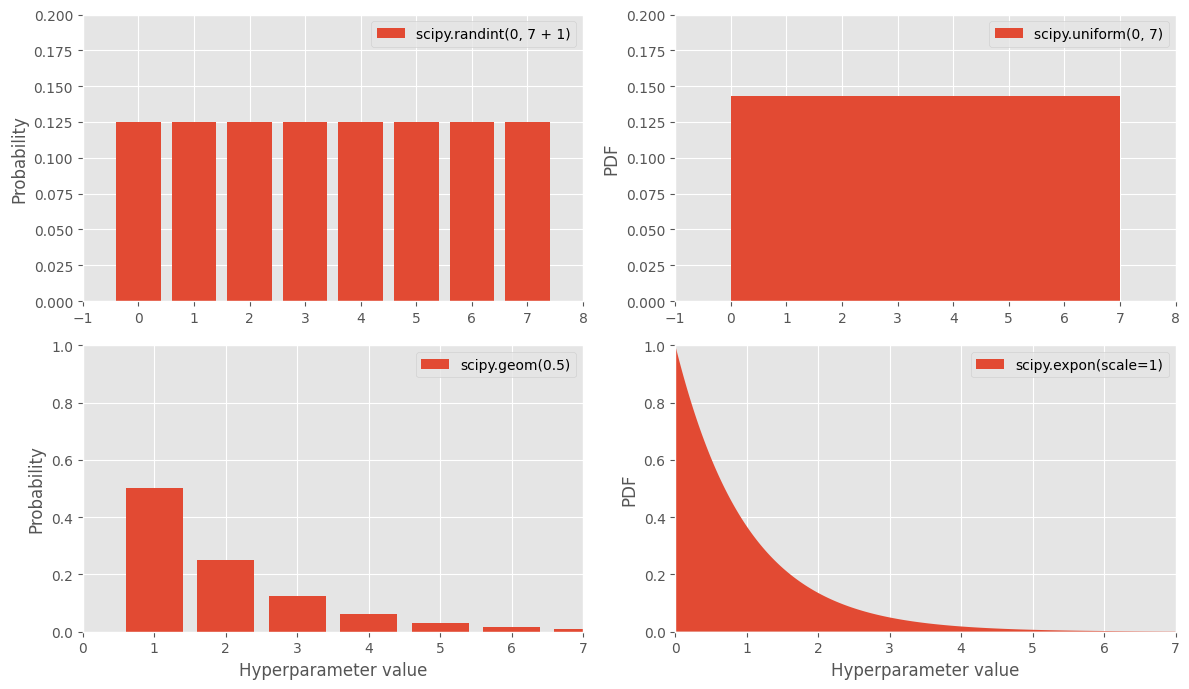

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform, geom, expon
from pathlib import Path

def load_local_mobile_data():
    # Ruta del archivo CSV
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")

    # Verificar si el archivo existe
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    
    # Leer el archivo CSV
    return pd.read_csv(csv_path)

try:
    # Cargar el archivo
    mobile_data = load_local_mobile_data()
    
    # Código adicional para graficar distribuciones
    xs1 = np.arange(0, 7 + 1)
    randint_distrib = randint(0, 7 + 1).pmf(xs1)

    xs2 = np.linspace(0, 7, 500)
    uniform_distrib = uniform(0, 7).pdf(xs2)

    xs3 = np.arange(0, 7 + 1)
    geom_distrib = geom(0.5).pmf(xs3)

    xs4 = np.linspace(0, 7, 500)
    expon_distrib = expon(scale=1).pdf(xs4)

    plt.figure(figsize=(12, 7))

    plt.subplot(2, 2, 1)
    plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
    plt.ylabel("Probability")
    plt.legend()
    plt.axis([-1, 8, 0, 0.2])

    plt.subplot(2, 2, 2)
    plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
    plt.ylabel("PDF")
    plt.legend()
    plt.axis([-1, 8, 0, 0.2])

    plt.subplot(2, 2, 3)
    plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
    plt.xlabel("Hyperparameter value")
    plt.ylabel("Probability")
    plt.legend()
    plt.axis([0, 7, 0, 1])

    plt.subplot(2, 2, 4)
    plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
    plt.xlabel("Hyperparameter value")
    plt.ylabel("PDF")
    plt.legend()
    plt.axis([0, 7, 0, 1])

    plt.tight_layout()  # Ajustar el espacio entre subgráficas
    plt.show()

except FileNotFoundError as e:
    print(e)


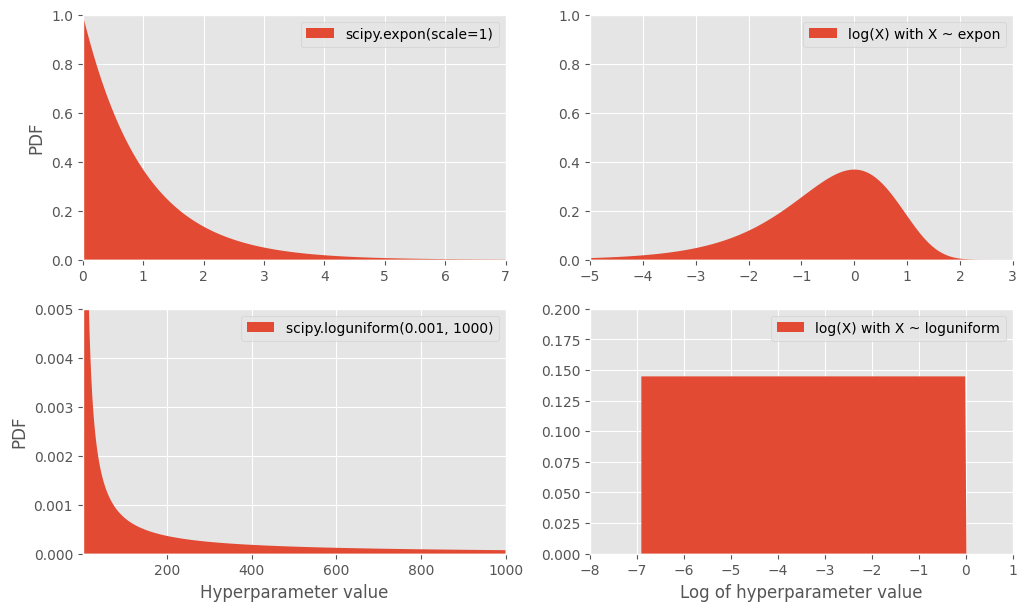

In [149]:
from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

#### Métodos de ensamblaje.. 

Otra manera de perfeccionar tu sistema es intentar combinar los modelos con mejor  rendimiento. A menudo, el grupo (o "ensamble") tendrá un rendimiento mejor que el mejor  modelo individual (igual que los random forests tienen un rendimiento mejor que los árboles de  decisiones individuales de los que dependen), sobre todo si los modelos individuales cometen  tipos muy diferentes de errores. Por ejemplo, podríamos entrenar y perfeccionar un modelo  de k vecinos más cercanos y, después, crear un modelo de ensamblaje que solo prediga la  media de la predicción del random forest y la predicción del modelo.

#### Analizar los mejores modelos y sus errores. . 

A menudo, conseguirás un mayor entendimiento del problema inspeccionando los mejores  modelos. Por ejemplo, RandomForestRegressor puede indicar la importancia relativa de cada  atributo para hacer predicciones exactas: 

In [150]:
final_model = rnd_search.best_estimator_  # includes preprocessing
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.08, 0.01, 0.06, 0.02, 0.05, 0.01, 0.07, 0.05, 0.07, 0.05, 0.06,
       0.08, 0.08, 0.08, 0.06, 0.06, 0.06, 0.01, 0.01, 0.01])

# Análisis de Importancia de Características

## Resumen 
La salida es un array que representa la importancia de cada característica en el modelo de Random Forest. Cada valor indica cuánto contribuye esa característica a la predicción final.

## Características Más Importantes
Las características con mayor importancia son las que tienen valores más altos. En este caso, las características con importancias de 0.08 son las que más contribuyen a las predicciones del modelo. Identificar cuáles son estas características puede ayudarte a entender mejor qué factores son más relevantes en el contexto del problema que estás abordando.

## Características Menos Importantes
Las características con importancias de 0.01 y 0.02 son las que menos contribuyen al rendimiento del modelo. Esto sugiere que podrían ser eliminadas sin afectar significativamente la capacidad predictiva del modelo. Este hallazgo puede llevarte a simplificar el modelo, reduciendo el número de características y, potencialmente, mejorando la interpretabilidad.

## Distribución de Importancias
La distribución de importancias muestra que hay varias características con valores similares. Esto indica que no hay una única característica dominante, lo que sugiere un modelo más equilibrado y posiblemente más robusto frente a sobreajustes.

## Implicaciones para el Modelado
Con base en las importancias, podrías considerar realizar una selección de características. Mantener solo las más relevantes (por ejemplo, aquellas con importancia de al menos 0.05) podría reducir la complejidad del modelo y facilitar su interpretación. Además, sería recomendable explorar cómo estas características influyen en el resultado y considerar realizar visualizaciones (como gráficos de barras) para comunicar mejor sus importancias.


## Conclusión
La evaluación de la importancia de características es una herramienta valiosa para entender el modelo y mejorar su rendimiento. Al enfocarte en las características que realmente aportan, puedes optimizar tanto el modelo como la interpretación de sus resultados.


Vamos a ordenar estas puntuaciones de importancia en orden descendente y a mostrarlas  junto a sus nombres de atributos correspondientes: 

In [151]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(np.float64(0.08380497089962916), 'num__px_width'),
 (np.float64(0.0829677163192844), 'num__id'),
 (np.float64(0.0812341129496392), 'num__px_height'),
 (np.float64(0.08008461554714787), 'num__ram'),
 (np.float64(0.0748758474729401), 'num__int_memory'),
 (np.float64(0.07372672335133047), 'num__mobile_wt'),
 (np.float64(0.05876556849376476), 'num__pc'),
 (np.float64(0.05797803717629303), 'num__sc_h'),
 (np.float64(0.05778493027345461), 'num__talk_time'),
 (np.float64(0.05745814347083563), 'num__clock_speed'),
 (np.float64(0.057182021090181445), 'num__sc_w'),
 (np.float64(0.051880859088437224), 'num__fc'),
 (np.float64(0.051533219109447095), 'num__m_dep'),
 (np.float64(0.04662632173176393), 'num__n_cores'),
 (np.float64(0.01586391302186458), 'num__dual_sim'),
 (np.float64(0.014429905174013703), 'num__wifi'),
 (np.float64(0.014035465155008359), 'num__four_g'),
 (np.float64(0.013971970843594445), 'num__touch_screen'),
 (np.float64(0.01395626355943033), 'num__blue'),
 (np.float64(0.01183939

# Análisis de Importancia de Características

## Resumen de Resultados
La salida muestra una lista de tuplas donde cada tupla contiene la importancia de una característica y su nombre correspondiente. Las importancias están en un rango que indica cuánto contribuye cada característica al modelo.

## Características Más Importantes
- **`num__px_width`** (0.0838)
- **`num__id`** (0.0829)
- **`num__px_height`** (0.0812)
- **`num__ram`** (0.0801)
- **`num__int_memory`** (0.0749)

Estas características tienen las importancias más altas, lo que sugiere que son cruciales para las predicciones del modelo. En particular:
- **Resolución de pantalla (`num__px_width` y `num__px_height`)**: Indican que la resolución es un factor importante en el rendimiento del modelo.
- **Memoria RAM (`num__ram`)**: Resalta la relevancia de la capacidad de RAM en la predicción, probablemente reflejando el rendimiento del dispositivo.
- **Memoria interna (`num__int_memory`)**: También es significativo, sugiriendo que el almacenamiento afecta la predicción.

## Características Menos Importantes
- **`num__three_g`** (0.0118)
- **`num__blue`** (0.0139)
- **`num__touch_screen`** (0.0140)
- **`num__four_g`** (0.0144)
- **`num__wifi`** (0.0144)

Las características en esta parte de la lista tienen importancias relativamente bajas, lo que indica que su contribución al rendimiento del modelo es mínima. Esto sugiere que podrían considerarse para ser eliminadas o no ser priorizadas en el modelado.

## Distribución de Importancias
La lista muestra que hay una caída considerable en las importancias a partir de la séptima característica. Las primeras seis características tienen importancias significativamente más altas, mientras que las demás son bastante similares entre sí pero mucho más bajas. Esto sugiere que el modelo se beneficia más de un conjunto específico de características clave.

## Implicaciones para el Modelado
- **Selección de Características**: Podrías considerar eliminar las características con importancias menores a 0.02, ya que su impacto en el rendimiento del modelo es marginal.
- **Interpretación del Modelo**: Al enfocarte en las características más importantes, podrás obtener insights más claros sobre qué factores influyen en las predicciones.
- **Simplificación del Modelo**: Reducir el número de características podría mejorar la interpretabilidad y potencialmente la eficiencia del modelo.

## Próximos Pasos
- **Validar el Rendimiento**: Prueba el modelo con y sin las características menos importantes para ver si el rendimiento se mantiene.
- **Visualización**: Considera crear gráficos para visualizar la importancia de las características, lo que puede ayudar a comunicar tus hallazgos de manera más efectiva.
- **Ajuste de Hiperparámetros**: Experimenta con ajustes de hiperparámetros para ver si el rendimiento mejora al enfocarte en las características más relevantes.


#### Evaluar el sistema en el conjunto de prueba . 

In [152]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Cargar el dataset
def load_local_mobile_data():
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    return pd.read_csv(csv_path)

# Cargar los datos
mobile_data = load_local_mobile_data()

# Definir las características (X) y la variable objetivo (y)
X = mobile_data.drop('battery_power', axis=1)  # 'battery_power' como variable objetivo
y = mobile_data['battery_power']

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento
num_attribs = X.select_dtypes(include=['int64', 'float64']).columns
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
])

# Definir el pipeline completo con el modelo final
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

# Ajustar el pipeline al conjunto de entrenamiento
full_pipeline.fit(X_train, y_train)

# Hacer predicciones con el modelo ajustado
final_predictions = full_pipeline.predict(X_test)

# Calcular el RMSE de las predicciones
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

# Mostrar el RMSE
print(f"Root Mean Squared Error (RMSE): {final_rmse:.2f}")


Root Mean Squared Error (RMSE): 451.68


# Análisis del RMSE

## Resultado del RMSE
- **Root Mean Squared Error (RMSE):** 451.68

## Interpretación del RMSE
El RMSE mide la desviación estándar de los errores de predicción. En este caso, el RMSE es 451.68, lo que indica que, en promedio, las predicciones del modelo se desvían en 451.68 unidades de los valores reales.

Un RMSE más bajo indica un mejor ajuste del modelo a los datos de prueba. Por lo tanto, un RMSE de 451.68 sugiere que el modelo tiene una desviación moderada en sus predicciones.


In [153]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([421.16403878, 480.26174319])

# Interpretación del Resultado

## Cálculo del Intervalo de Confianza

El intervalo de confianza al 95% para el RMSE se calcula usando los errores cuadrados de las predicciones (`squared_errors`). Primero, se determina la media y el error estándar de los errores cuadrados. Luego, se utiliza la distribución t de Student para estimar el intervalo de confianza alrededor de la media de los errores cuadrados. Finalmente, se toma la raíz cuadrada de este intervalo para obtener el intervalo de confianza para el RMSE, dado que el RMSE es la raíz cuadrada del error cuadrático medio.

## Interpretación del Intervalo de Confianza

El intervalo [421.16, 480.26] nos dice que estamos un 95% seguros de que el verdadero valor del RMSE del modelo en la población (o en el conjunto de datos completo) se encuentra dentro de este rango. Esto implica que hay una variabilidad en las predicciones del modelo, y la desviación promedio de las predicciones respecto a los valores reales está en el rango de 421.16 a 480.26 unidades.

## Significado del Intervalo

Un intervalo relativamente amplio puede indicar que hay una variabilidad considerable en el rendimiento del modelo en diferentes subconjuntos de los datos. En otras palabras, el modelo podría tener un desempeño que varía significativamente dependiendo del subconjunto de datos de prueba. La precisión del modelo puede no ser uniforme, y el rango del intervalo de confianza sugiere que, mientras el modelo tiene una desviación moderada (como se observa con un RMSE de aproximadamente 451.68 en la salida anterior), la desviación puede variar en un rango específico.

## Implicaciones

Es importante considerar el intervalo de confianza al evaluar el desempeño del modelo. Un intervalo más estrecho indicaría mayor confianza en la precisión del modelo, mientras que un intervalo más amplio sugiere mayor incertidumbre. Si se busca mejorar la precisión del modelo, es útil investigar qué factores contribuyen a esta variabilidad y considerar ajustes en el modelo o en el proceso de entrenamiento para reducirla.

## Conclusión

El intervalo de confianza para el RMSE muestra que el modelo tiene una desviación promedio de entre 421.16 y 480.26 unidades, con un 95% de confianza de que el verdadero RMSE se encuentra en este rango. Este análisis proporciona una perspectiva más completa sobre el desempeño del modelo y su estabilidad en diferentes subconjuntos de datos.


#### Lanzar, monitorizar y mantener el sistema

In [154]:
import joblib

joblib.dump(final_model, "Mobile-price-classification_model.pkl")

['Mobile-price-classification_model.pkl']

Después cargar el modelo usando joblib y  utilizarlo para hacer predicciones:. 

In [16]:
import joblib
import pandas as pd
from pathlib import Path
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Definir el preprocesamiento
def load_local_mobile_data():
    csv_path = Path("/Users/humberto/Desktop/proekt-machine/datasets/test.csv")
    if not csv_path.is_file():
        raise FileNotFoundError(f"El archivo no fue encontrado en la ruta: {csv_path}. Verifica que la ruta sea correcta.")
    return pd.read_csv(csv_path)

# Cargar los datos
mobile_data = load_local_mobile_data()

# Separar las características (X) y la variable objetivo (y)
X = mobile_data.drop('battery_power', axis=1)  # 'battery_power' como variable objetivo
y = mobile_data['battery_power']

# Preprocesamiento
num_attribs = X.select_dtypes(include=['int64', 'float64']).columns
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

preprocessing = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
])

# Crear y ajustar el pipeline completo
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

# Ajustar el pipeline al conjunto de entrenamiento
full_pipeline.fit(X, y)

# Guardar el modelo
joblib.dump(full_pipeline, "my_mobile_data_model.pkl")

# Cargar el modelo
final_model_reloaded = joblib.load("my_mobile_data_model.pkl")

# Obtener nuevos datos
new_data = X.iloc[:5]  # Supongamos que estas son nuevas instancias

# Predecir usando el modelo recargado
predictions = final_model_reloaded.predict(new_data)

# Mostrar las predicciones
print(predictions)


[1087.31  972.32 1641.2  1437.62 1361.18]


# Interpretación de los Valores

Estos valores son las predicciones del modelo para las primeras 5 instancias de los datos nuevos. Dado que el modelo es un `RandomForestRegressor` y la variable objetivo es `battery_power`, estos valores representan las predicciones de la potencia de la batería (en la misma escala que la variable `battery_power` en nuestro dataset original).

## Comparación con Valores Reales
Para evaluar la precisión de estas predicciones, debemos compararlas con los valores reales correspondientes en el conjunto de datos de prueba (`y_test`). Si tienes los valores reales de `battery_power` para las mismas instancias, puedes calcular el error y la calidad de las predicciones usando métricas como RMSE (Root Mean Squared Error) o MAE (Mean Absolute Error).

## Uso de Predicciones
Si estás usando estas predicciones para tomar decisiones o para informes, es útil contextualizar estos valores. Por ejemplo, si el rango de valores en tu dataset de entrenamiento es de 500 a 2000, entonces las predicciones parecen razonables. Si esperabas valores en un rango diferente, esto podría indicar que el modelo podría estar sesgado o que podría necesitar más ajuste.
